In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../..')

In [3]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from stack_segmentation.stack import Stack

In [5]:
from stack_segmentation.aug_pipelines import medium_aug
from stack_segmentation.io import make_dataloader, collate_fn_basic

from stack_segmentation.training import (
    handle_stacks_data, 
    make_optimization_task, 
    train_loop
)

from pipeline_config import (
    dataloaders_conf,
    aug_config,
    train_conf,
    model_config, 
    optimizer_config,
    loss_config,
    scheduler_config,
)

In [6]:
from exp_config import data_conf

## Prepare train, validation and test data

In [7]:
data_train, data_val, data_test = handle_stacks_data(**data_conf)

720it [00:01, 636.16it/s]
100%|██████████| 720/720 [00:07<00:00, 91.61it/s] 
8280it [00:00, 231012.73it/s]
7920it [00:00, 226015.73it/s]
700it [00:00, 805.89it/s]
100%|██████████| 700/700 [00:07<00:00, 96.62it/s] 
8280it [00:00, 232467.85it/s]
7920it [00:00, 225228.07it/s]
720it [00:00, 759.90it/s]
100%|██████████| 720/720 [00:07<00:00, 91.81it/s] 
8280it [00:00, 81567.13it/s]
720it [00:00, 775.70it/s]
100%|██████████| 720/720 [00:07<00:00, 91.92it/s] 
8280it [00:00, 230071.53it/s]
700it [00:00, 787.28it/s]
100%|██████████| 700/700 [00:07<00:00, 97.19it/s] 
8280it [00:00, 208014.41it/s]
509it [00:00, 1075.16it/s]
100%|██████████| 509/509 [00:02<00:00, 193.39it/s]
3664it [00:00, 230383.02it/s]
700it [00:00, 722.37it/s]
100%|██████████| 700/700 [00:07<00:00, 96.99it/s] 
8280it [00:00, 226861.31it/s]
700it [00:00, 803.00it/s]
100%|██████████| 700/700 [00:07<00:00, 96.96it/s] 
8280it [00:00, 231258.86it/s]
710it [00:01, 371.30it/s]
100%|██████████| 710/710 [00:07<00:00, 94.65it/s] 
8280it 

In [8]:
len(data_train), len(data_val), len(data_test)

(16560, 15840, 11)

In [9]:
dataloader_train = make_dataloader(
    samples=data_train, 
    collate_fn=collate_fn_basic,
    model_config=model_config,
    aug_config=aug_config,
    **dataloaders_conf['train']
)

dataloader_val = make_dataloader(
    samples=data_val, 
    collate_fn=collate_fn_basic,
    model_config=model_config,
    **dataloaders_conf['val']
)

dataloaders_test = {
    name: make_dataloader(
        samples=data, 
        collate_fn=collate_fn_basic,
        model_config=model_config,
        **dataloaders_conf['test']
    ) for name, data in data_test.items()}

## Create model and metrics

In [10]:
from stack_segmentation.metrics import accuracy, precision, recall, f1, pr_auc, iou

In [11]:
metrics = {
    'accuracy': accuracy, 
    'precision': precision, 
    'recall': recall, 
    'f1': f1,
    'pr_auc': pr_auc, 
    'iou': iou,
}

In [12]:
device = 'cuda:0'

In [13]:
model, criterion, optimizer, scheduler = make_optimization_task(
    device,
    model_config=model_config,
    loss_config=loss_config, 
    optimizer_config=optimizer_config,
    scheduler_config=scheduler_config)

## Run experiment

In [ ]:
results = train_loop(
    model=model,
    dataloader_train=dataloader_train, 
    dataloader_val=dataloader_val,
    dataloaders_test=dataloaders_test,
    criterion=criterion, 
    optimizer=optimizer, 
    scheduler=scheduler,
    metrics=metrics,
    exp_name=data_conf['conf_name'],
    **train_conf)

  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 0...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.092464


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.031866
Epoch 1...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.038033


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.027731
Epoch 2...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.036822


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.024171
Epoch 3...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.036268


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.023971
Epoch 4...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.035662


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.024937
EarlyStopping counter: 1 out of 15
Epoch 5...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.034853


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.022719
Epoch 6...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.034627


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.02531
EarlyStopping counter: 1 out of 15
Epoch 7...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.03442


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.021
Epoch 8...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.033741


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.022774
EarlyStopping counter: 1 out of 15
Epoch 9...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.033638


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.022258
EarlyStopping counter: 2 out of 15
Epoch 10...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.033183


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.019121
Epoch 11...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.032941


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.021965
EarlyStopping counter: 1 out of 15
Epoch 12...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.032654


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.019372
EarlyStopping counter: 2 out of 15
Epoch 13...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.032798


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.017378
Epoch 14...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.032939


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.023096
EarlyStopping counter: 1 out of 15
Epoch 15...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.032558


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.017034
Epoch 16...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.032493


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.017565
EarlyStopping counter: 1 out of 15
Epoch 17...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.032366


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.016754
Epoch 18...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.032158


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.015643
Epoch 19...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.032368


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.016071
EarlyStopping counter: 1 out of 15
Epoch 20...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.032049


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.017085
EarlyStopping counter: 2 out of 15
Epoch 21...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.032172


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.016346
EarlyStopping counter: 3 out of 15
Epoch 22...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.032254


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.015849
EarlyStopping counter: 4 out of 15
Epoch 23...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.031937


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.015382
Epoch 24...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.031481


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.015055
Epoch 25...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.031529


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.015197
EarlyStopping counter: 1 out of 15
Epoch 26...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.031449


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.015267
EarlyStopping counter: 2 out of 15
Epoch 27...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.031493


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.015466
EarlyStopping counter: 3 out of 15
Epoch 28...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.031357


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.014962
Epoch 29...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.031305


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.015761
EarlyStopping counter: 1 out of 15
Epoch 30...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.031044


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.015979
EarlyStopping counter: 2 out of 15
Epoch 31...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.031113


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.014747
Epoch 32...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.031083


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.015645
EarlyStopping counter: 1 out of 15
Epoch 33...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.030803


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.014577
Epoch 34...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.030983


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.014686
EarlyStopping counter: 1 out of 15
Epoch 35...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.030781


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.01471
EarlyStopping counter: 2 out of 15
Epoch 36...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.030458


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.015867
EarlyStopping counter: 3 out of 15
Epoch 37...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.03073


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.015679
EarlyStopping counter: 4 out of 15
Epoch 38...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.030748


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.014751
EarlyStopping counter: 5 out of 15
Epoch 39...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.030634


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.014719
EarlyStopping counter: 6 out of 15
Epoch 40...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.030637


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.014716
EarlyStopping counter: 7 out of 15
Epoch 41...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.030759


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.015298
EarlyStopping counter: 8 out of 15
Epoch 42...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.030126


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.014359
Epoch 43...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.030128


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.014585
EarlyStopping counter: 1 out of 15
Epoch 44...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.030444


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.014779
EarlyStopping counter: 2 out of 15
Epoch 45...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.030275


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.014528
EarlyStopping counter: 3 out of 15
Epoch 46...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.030458


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.014213
Epoch 47...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.030271


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.014653
EarlyStopping counter: 1 out of 15
Epoch 48...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.030339
Epoch    48: reducing learning rate of group 0 to 5.0000e-05.


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.014044
Epoch 49...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029892


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013982
Epoch 50...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.030036


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013997
EarlyStopping counter: 1 out of 15
Epoch 51...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.030007


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013964
Epoch 52...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.030014


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.014527
EarlyStopping counter: 1 out of 15
Epoch 53...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029998


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013984
EarlyStopping counter: 2 out of 15
Epoch 54...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029794


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.014143
EarlyStopping counter: 3 out of 15
Epoch 55...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029841


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.014281
EarlyStopping counter: 4 out of 15
Epoch 56...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029924


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013906
Epoch 57...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029678


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013881
Epoch 58...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029695


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.01395
EarlyStopping counter: 1 out of 15
Epoch 59...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029497


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013918
EarlyStopping counter: 2 out of 15
Epoch 60...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029824


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.014069
EarlyStopping counter: 3 out of 15
Epoch 61...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029744


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013901
EarlyStopping counter: 4 out of 15
Epoch 62...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029781


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013966
EarlyStopping counter: 5 out of 15
Epoch 63...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029766


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013854
Epoch 64...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029651


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013842
Epoch 65...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.02965
Epoch    65: reducing learning rate of group 0 to 2.5000e-05.


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.014096
EarlyStopping counter: 1 out of 15
Epoch 66...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029593


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.01377
Epoch 67...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029799


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013732
Epoch 68...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029384


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013745
EarlyStopping counter: 1 out of 15
Epoch 69...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029628


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013819
EarlyStopping counter: 2 out of 15
Epoch 70...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029601


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013926
EarlyStopping counter: 3 out of 15
Epoch 71...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029279


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013694
Epoch 72...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029404


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.01381
EarlyStopping counter: 1 out of 15
Epoch 73...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029484


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013709
EarlyStopping counter: 2 out of 15
Epoch 74...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029479


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013744
EarlyStopping counter: 3 out of 15
Epoch 75...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029578


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013744
EarlyStopping counter: 4 out of 15
Epoch 76...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029472


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013711
EarlyStopping counter: 5 out of 15
Epoch 77...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029475
Epoch    77: reducing learning rate of group 0 to 1.2500e-05.


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013773
EarlyStopping counter: 6 out of 15
Epoch 78...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.02932


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.01376
EarlyStopping counter: 7 out of 15
Epoch 79...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029461


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013836
EarlyStopping counter: 8 out of 15
Epoch 80...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029552


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013717
EarlyStopping counter: 9 out of 15
Epoch 81...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029124


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013649
Epoch 82...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029333


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013658
EarlyStopping counter: 1 out of 15
Epoch 83...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029377


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013679
EarlyStopping counter: 2 out of 15
Epoch 84...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029542


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013643
Epoch 85...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029465


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013643
Epoch 86...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029273


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013659
EarlyStopping counter: 1 out of 15
Epoch 87...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.02947
Epoch    87: reducing learning rate of group 0 to 6.2500e-06.


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013653
EarlyStopping counter: 2 out of 15
Epoch 88...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029292


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013632
Epoch 89...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029321


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013652
EarlyStopping counter: 1 out of 15
Epoch 90...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029315


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013685
EarlyStopping counter: 2 out of 15
Epoch 91...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029319


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013619
Epoch 92...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029242


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013624
EarlyStopping counter: 1 out of 15
Epoch 93...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029218
Epoch    93: reducing learning rate of group 0 to 3.1250e-06.


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.01361
Epoch 94...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029233


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013624
EarlyStopping counter: 1 out of 15
Epoch 95...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029458


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013611
EarlyStopping counter: 2 out of 15
Epoch 96...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029148


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013617
EarlyStopping counter: 3 out of 15
Epoch 97...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029282


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013633
EarlyStopping counter: 4 out of 15
Epoch 98...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.02927


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013622
EarlyStopping counter: 5 out of 15
Epoch 99...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029396
Epoch    99: reducing learning rate of group 0 to 1.5625e-06.


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013624
EarlyStopping counter: 6 out of 15
Epoch 100...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029158


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013605
Epoch 101...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029328


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013608
EarlyStopping counter: 1 out of 15
Epoch 102...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029229


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013599
Epoch 103...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029237


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013605
EarlyStopping counter: 1 out of 15
Epoch 104...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029263


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.0136
EarlyStopping counter: 2 out of 15
Epoch 105...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029346
Epoch   105: reducing learning rate of group 0 to 1.0000e-06.


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013604
EarlyStopping counter: 3 out of 15
Epoch 106...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029253


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013622
EarlyStopping counter: 4 out of 15
Epoch 107...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029126


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013614
EarlyStopping counter: 5 out of 15
Epoch 108...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029201


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013597
Epoch 109...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029054


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013601
EarlyStopping counter: 1 out of 15
Epoch 110...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029082


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.0136
EarlyStopping counter: 2 out of 15
Epoch 111...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029183


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013598
Epoch 112...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029195


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013601
EarlyStopping counter: 1 out of 15
Epoch 113...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029407


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013603
EarlyStopping counter: 2 out of 15
Epoch 114...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029051


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013597
Epoch 115...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029194


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013621
EarlyStopping counter: 1 out of 15
Epoch 116...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029199


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013598
Epoch 117...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029333


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013598
Epoch 118...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029103


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013601
EarlyStopping counter: 1 out of 15
Epoch 119...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029159


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013598
Epoch 120...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029102


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013593
Epoch 121...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029222


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013599
EarlyStopping counter: 1 out of 15
Epoch 122...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029187


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013596
EarlyStopping counter: 2 out of 15
Epoch 123...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029245


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013611
EarlyStopping counter: 3 out of 15
Epoch 124...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029172


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013595
EarlyStopping counter: 4 out of 15
Epoch 125...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029199


100%|██████████| 495/495 [00:36<00:00, 13.62it/s]


Mean val loss: 0.013594


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 126...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.02917


100%|██████████| 495/495 [00:36<00:00, 13.62it/s]


Mean val loss: 0.013592


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 127...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029333


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013594
EarlyStopping counter: 1 out of 15
Epoch 128...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.02918


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013593
EarlyStopping counter: 2 out of 15
Epoch 129...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029174


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013593
EarlyStopping counter: 3 out of 15
Epoch 130...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029095


100%|██████████| 495/495 [00:36<00:00, 13.64it/s]


Mean val loss: 0.01359


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 131...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029446


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013596
EarlyStopping counter: 1 out of 15
Epoch 132...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029354


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013591
EarlyStopping counter: 2 out of 15
Epoch 133...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029022


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013593
EarlyStopping counter: 3 out of 15
Epoch 134...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029202


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013596
EarlyStopping counter: 4 out of 15
Epoch 135...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029009


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.01361
EarlyStopping counter: 5 out of 15
Epoch 136...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029148


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013591
EarlyStopping counter: 6 out of 15
Epoch 137...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029513


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013599
EarlyStopping counter: 7 out of 15
Epoch 138...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.028963


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.0136
EarlyStopping counter: 8 out of 15
Epoch 139...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029317


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013613
EarlyStopping counter: 9 out of 15
Epoch 140...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029147


100%|██████████| 495/495 [00:36<00:00, 13.59it/s]


Mean val loss: 0.013589


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 141...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029043


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013594
EarlyStopping counter: 1 out of 15
Epoch 142...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029216


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013592
EarlyStopping counter: 2 out of 15
Epoch 143...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029232


100%|██████████| 495/495 [00:36<00:00, 13.63it/s]


Mean val loss: 0.013585


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 144...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.02922


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013596
EarlyStopping counter: 1 out of 15
Epoch 145...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029305


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013588
EarlyStopping counter: 2 out of 15
Epoch 146...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.02912


100%|██████████| 495/495 [00:36<00:00, 13.61it/s]


Mean val loss: 0.013586
Epoch 147...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029246


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013598
EarlyStopping counter: 1 out of 15
Epoch 148...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029143


100%|██████████| 495/495 [00:36<00:00, 13.63it/s]


Mean val loss: 0.013586
Epoch 149...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029187


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.01359
EarlyStopping counter: 1 out of 15
Epoch 150...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029318


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.01361
EarlyStopping counter: 2 out of 15
Epoch 151...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029079


100%|██████████| 495/495 [00:36<00:00, 13.62it/s]


Mean val loss: 0.013584


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 152...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029211


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.01359
EarlyStopping counter: 1 out of 15
Epoch 153...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029352


100%|██████████| 495/495 [00:36<00:00, 13.68it/s]


Mean val loss: 0.013582


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 154...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029073


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013595
EarlyStopping counter: 1 out of 15
Epoch 155...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029216


100%|██████████| 495/495 [00:36<00:00, 13.67it/s]


Mean val loss: 0.01358


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 156...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029355


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013597
EarlyStopping counter: 1 out of 15
Epoch 157...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029227


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013587
EarlyStopping counter: 2 out of 15
Epoch 158...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029174


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013583
EarlyStopping counter: 3 out of 15
Epoch 159...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029281


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013587
EarlyStopping counter: 4 out of 15
Epoch 160...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.0292


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013589
EarlyStopping counter: 5 out of 15
Epoch 161...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.02933


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013587
EarlyStopping counter: 6 out of 15
Epoch 162...


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013585
EarlyStopping counter: 7 out of 15
Epoch 163...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.029006


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.013583
EarlyStopping counter: 8 out of 15
Epoch 164...


 65%|██████▍   | 336/518 [01:09<00:36,  4.94it/s]

## Dump experiment results

In [16]:
import pickle
import json

In [31]:
# p = './{}_exp_results.pkl'.format(data_conf['conf_name'])
# with open(p, 'wb') as f:
#     pickle.dump(results, f)

In [19]:
# p = './{}_exp_results.pkl'.format(data_conf['conf_name'])
# with open(p, 'rb') as f:
#     results = pickle.load(f)

In [32]:
import torch
model.load_state_dict(torch.load('./{}.pt'.format(data_conf['conf_name'])))

<All keys matched successfully>

## Train and validation losses

In [17]:
from itertools import chain

In [18]:
train_losses = list(chain(*[item for item in results['train_losses']]))
val_losses = list(chain(*[item for item in results['val_losses']]))

In [19]:
def moving_average(a, n=5) :
    ret = np.cumsum([a[0]] * (n - 1) + a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

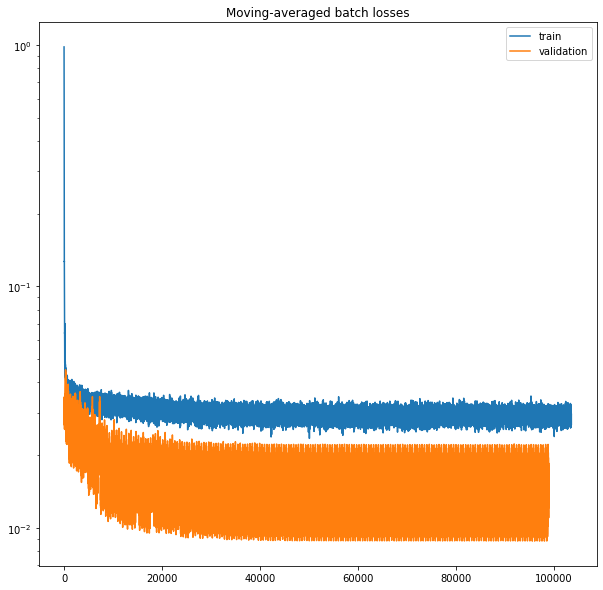

In [20]:
plt.figure(figsize=(10, 10))
plt.title('Moving-averaged batch losses')
plt.plot(np.arange(len(train_losses)), moving_average(train_losses), label='train')
plt.plot(np.arange(len(val_losses)), moving_average(val_losses), label='validation')

plt.legend(loc='best')
plt.yscale('log')

# plt.ylim([1e-2, 1])
plt.show()

In [21]:
mean_train_loss = [np.mean(item) for item in results['train_losses']]
mean_val_loss = [np.mean(item) for item in results['val_losses']]

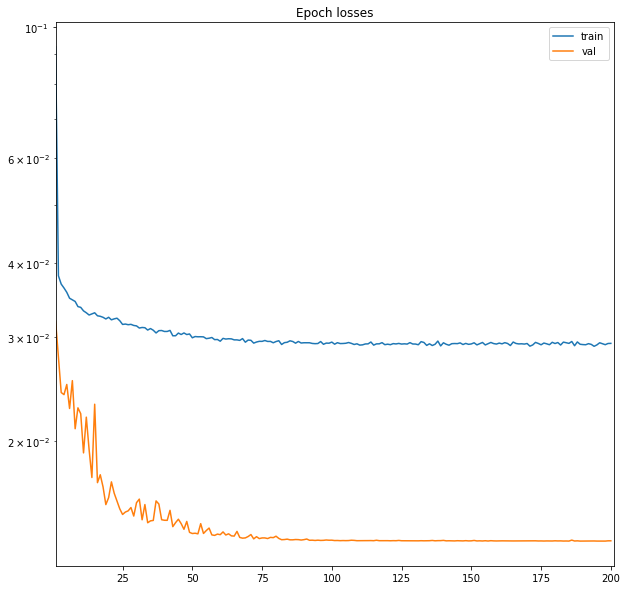

In [22]:
plt.figure(figsize=(10, 10))
plt.title('Epoch losses')
plt.plot(np.arange(len(mean_train_loss)) + 1, mean_train_loss, label='train')
plt.plot(np.arange(len(mean_val_loss)) + 1, mean_val_loss, label='val')

plt.yscale('log')
plt.legend(loc='best')

plt.xlim([1, len(mean_train_loss) + 1])
plt.show()

## Predicted samples

In [23]:
import os

In [24]:
import torch

In [25]:
from visualization_utils import output_to_binary, plot_sample

In [35]:
threshold = 0.5
to_plot = 10

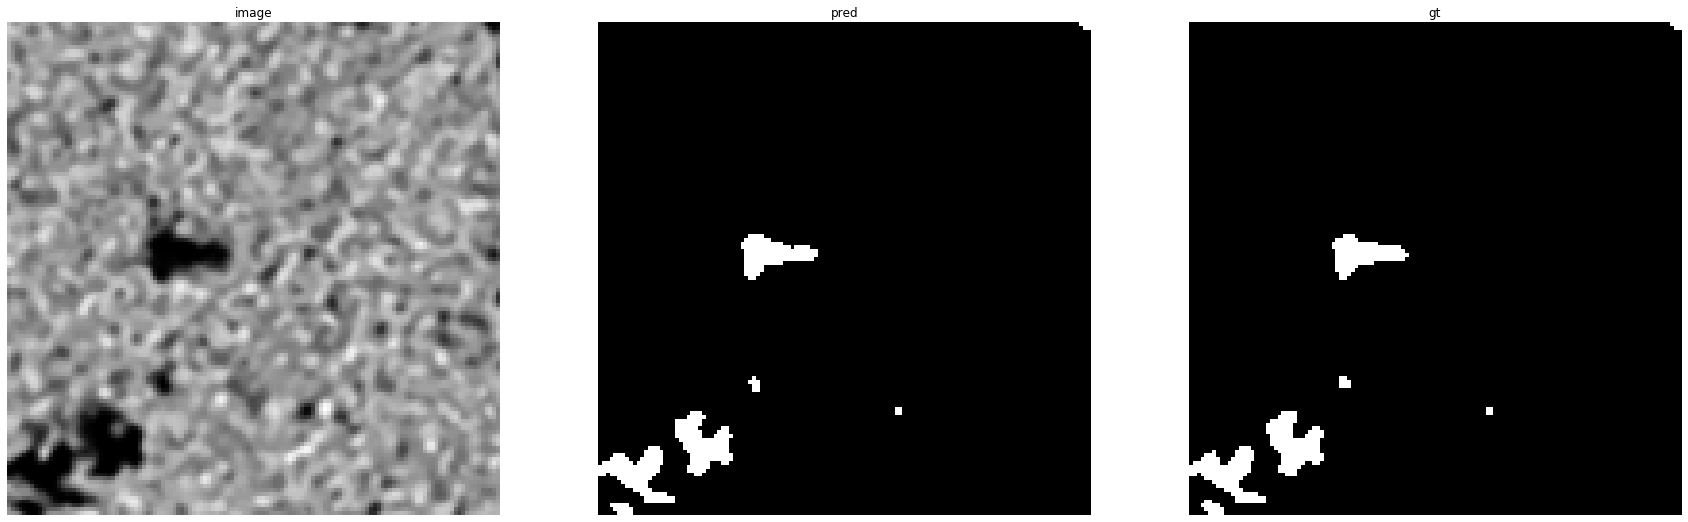

accuracy    : 0.9984130859375
precision   : 0.9768518518518519
recall      : 0.9634703196347032
f1          : 0.9701149425287355
pr_auc      : 0.9980534356290768
iou         : 0.9419642857142857


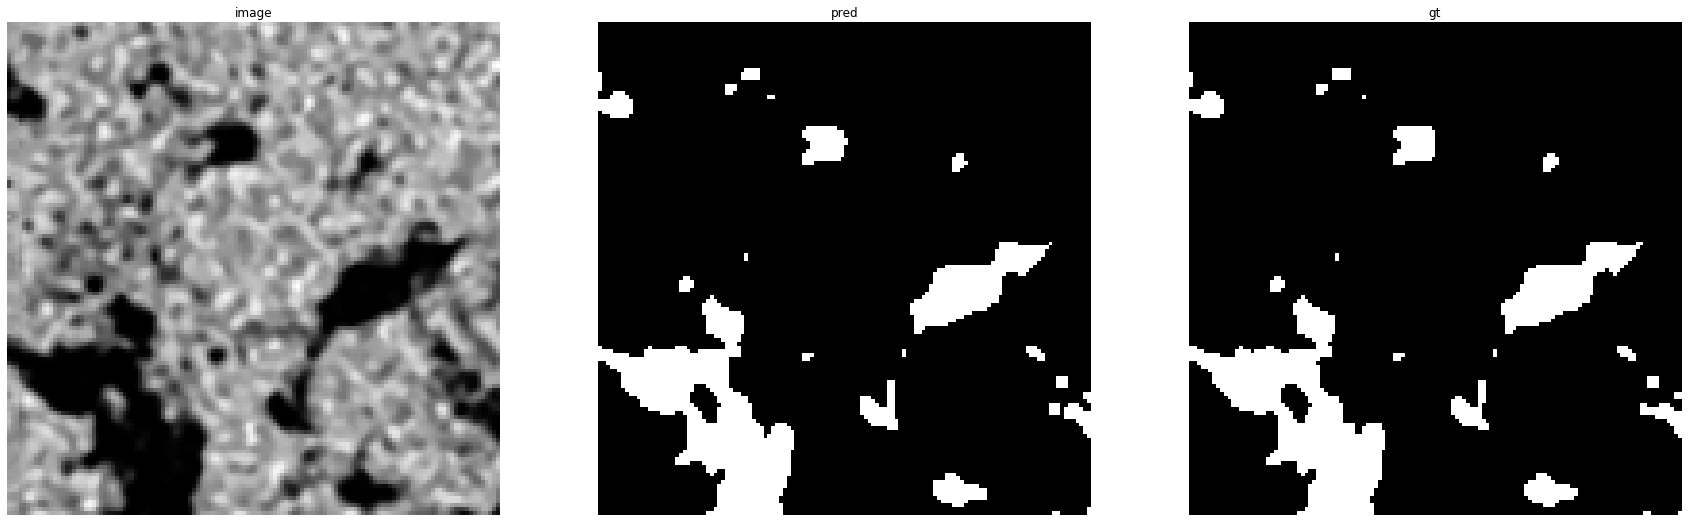

accuracy    : 0.9971923828125
precision   : 0.9847528916929548
recall      : 0.991005291005291
f1          : 0.9878691983122363
pr_auc      : 0.9994342914471405
iou         : 0.976029181865555


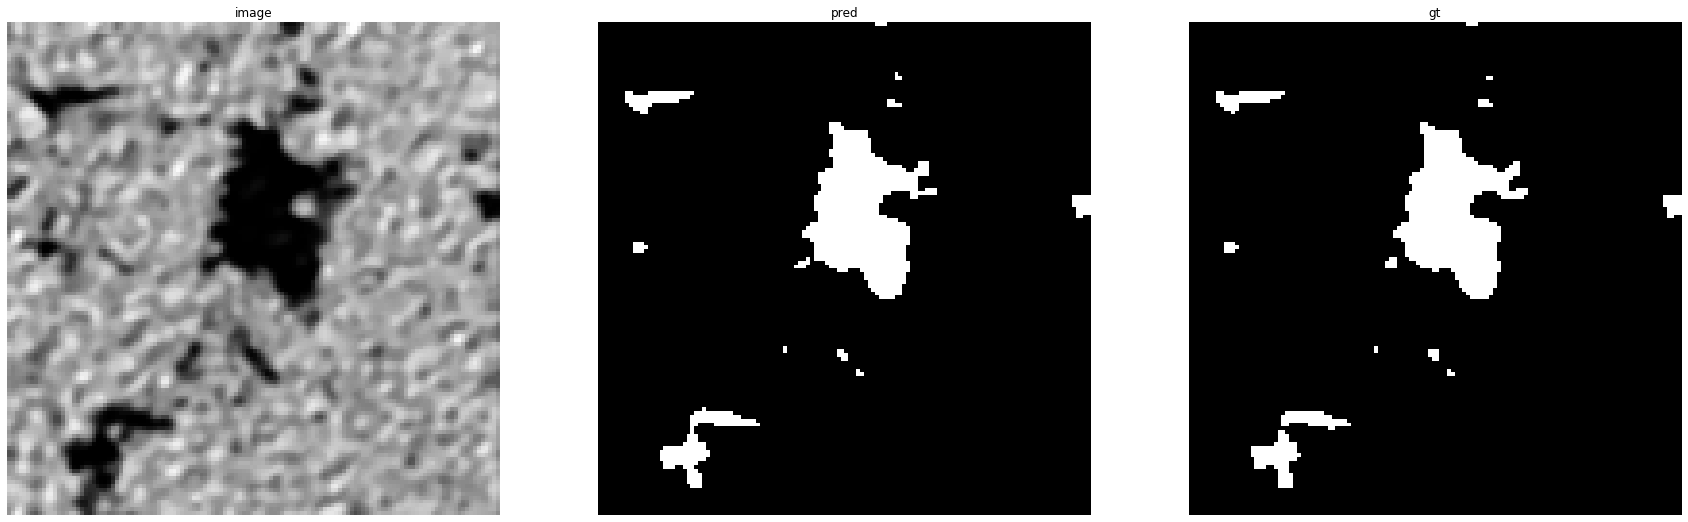

accuracy    : 0.99761962890625
precision   : 0.981651376146789
recall      : 0.9825528007346189
f1          : 0.9821018815970629
pr_auc      : 0.999018830884131
iou         : 0.9648331830477908


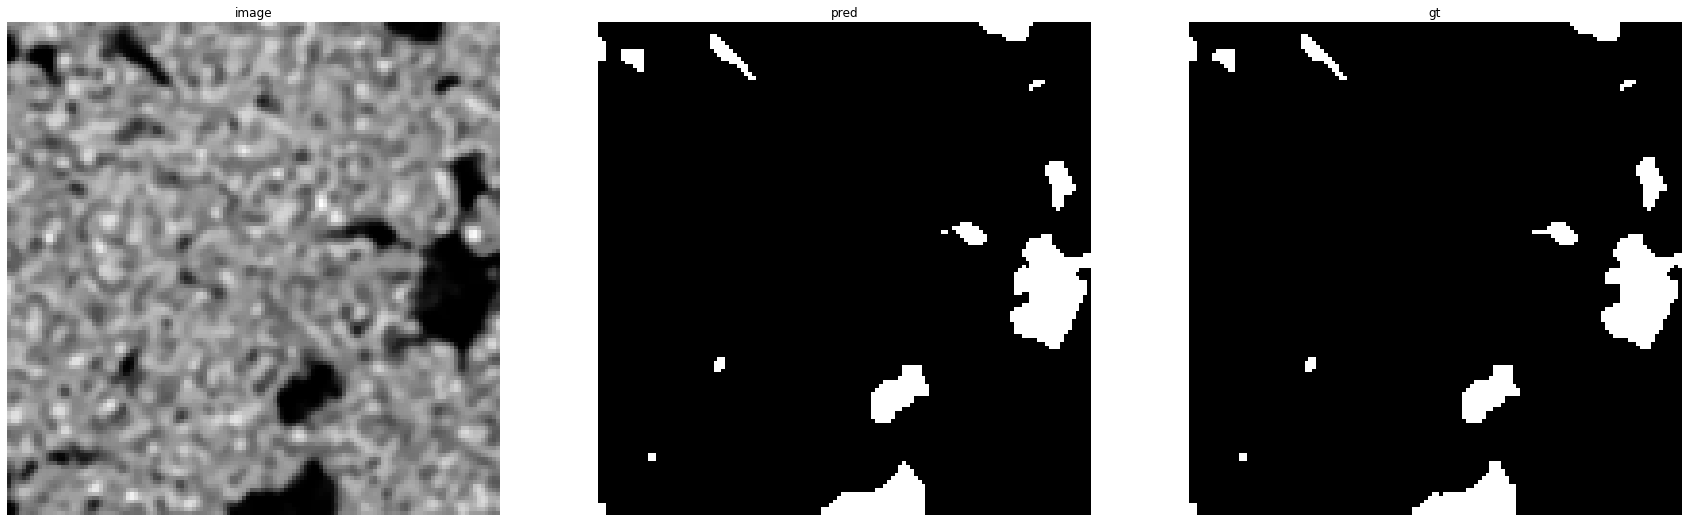

accuracy    : 0.997802734375
precision   : 0.975609756097561
recall      : 0.9876543209876543
f1          : 0.9815950920245398
pr_auc      : 0.9985868124157891
iou         : 0.963855421686747


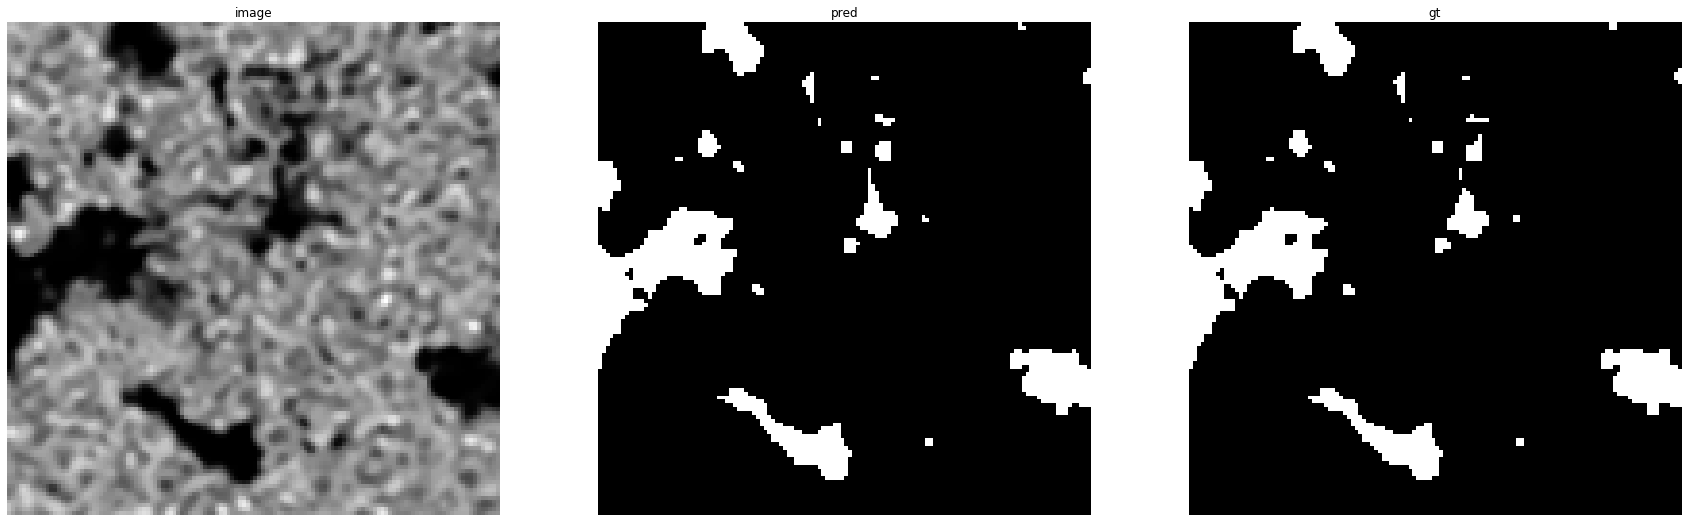

accuracy    : 0.99639892578125
precision   : 0.9789750328515112
recall      : 0.982201713909031
f1          : 0.9805857189865087
pr_auc      : 0.9987947070642635
iou         : 0.9619109102646869


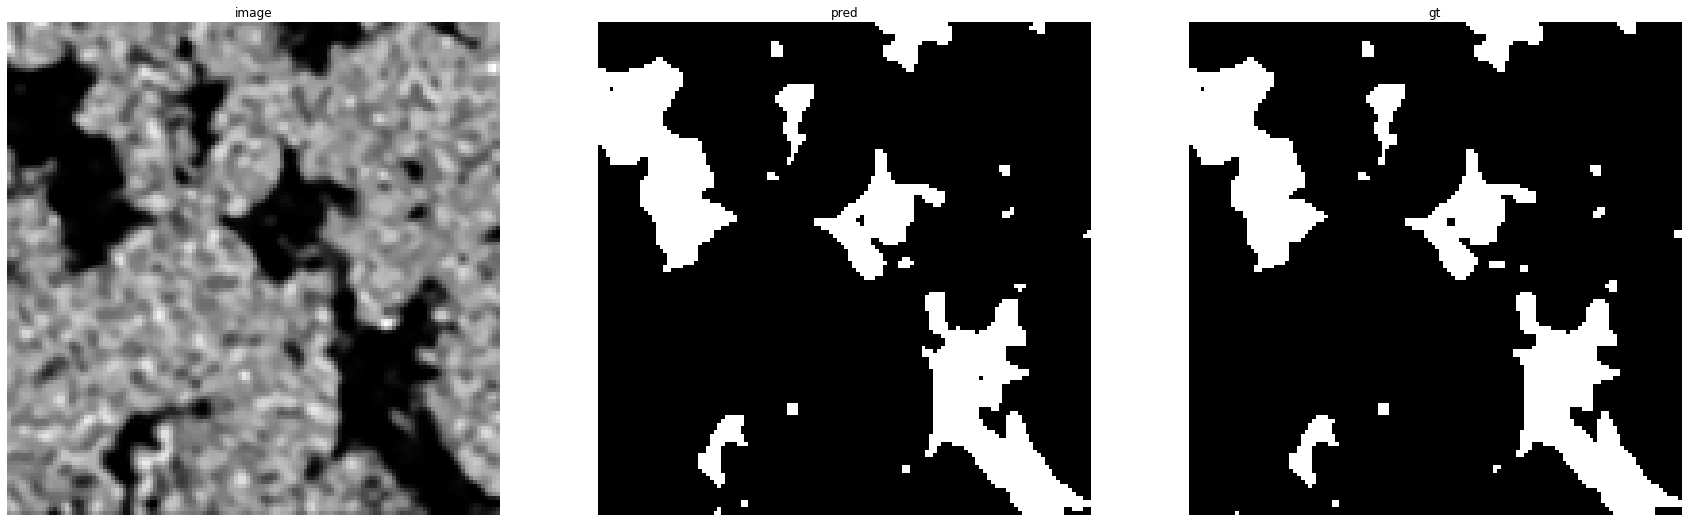

accuracy    : 0.995361328125
precision   : 0.9850533807829182
recall      : 0.9878658101356174
f1          : 0.9864575908766927
pr_auc      : 0.9994266129679809
iou         : 0.9732770745428974


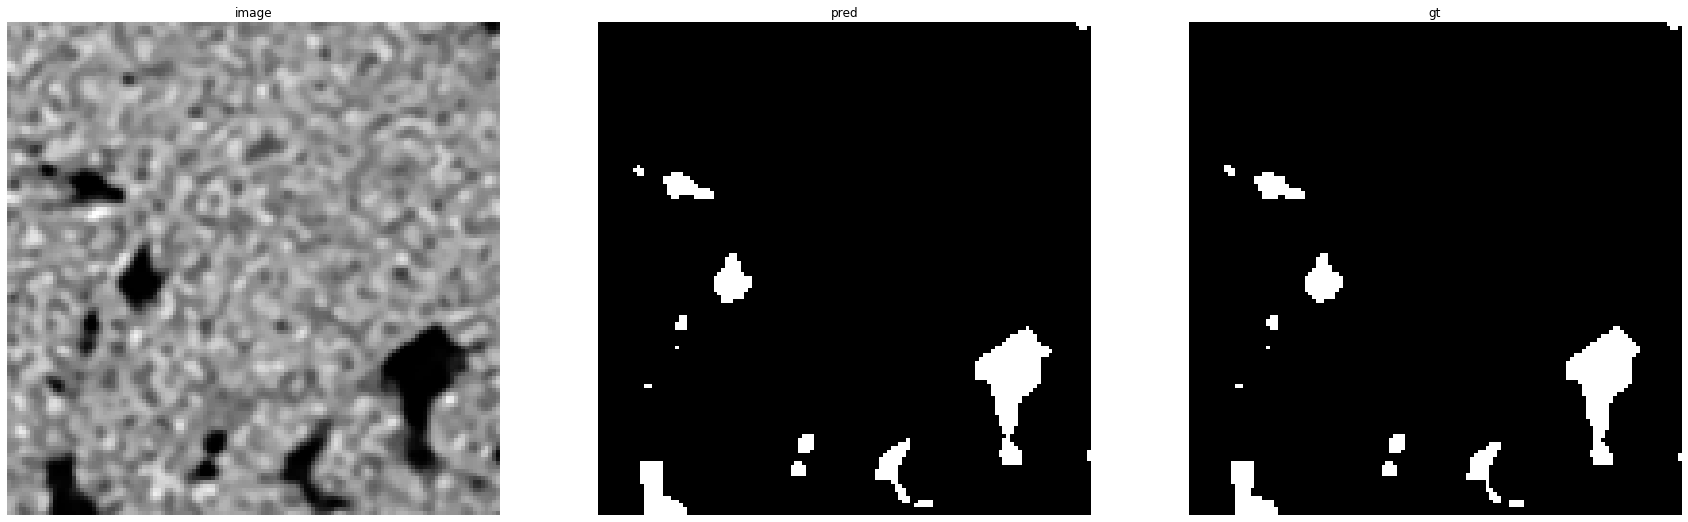

accuracy    : 0.99798583984375
precision   : 0.9736456808199122
recall      : 0.9779411764705882
f1          : 0.9757887013939839
pr_auc      : 0.9981957953110321
iou         : 0.9527220630372493


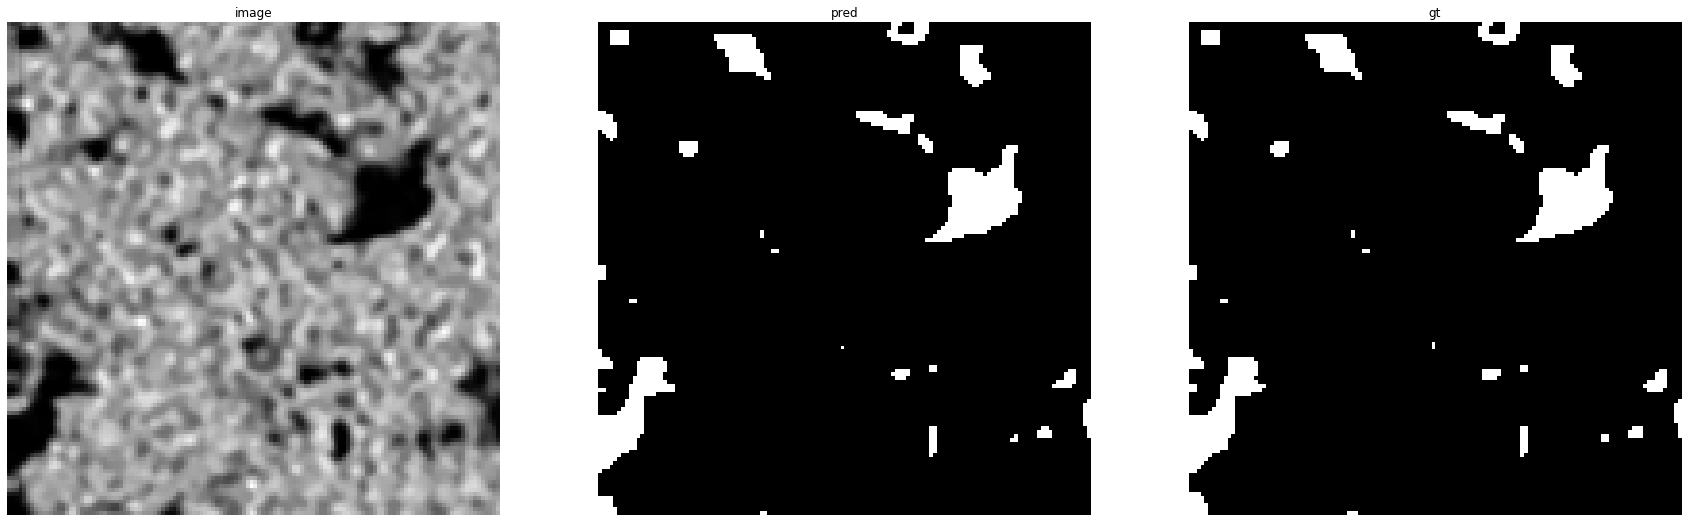

accuracy    : 0.99761962890625
precision   : 0.9912023460410557
recall      : 0.9712643678160919
f1          : 0.9811320754716981
pr_auc      : 0.9988077631182857
iou         : 0.9629629629629629


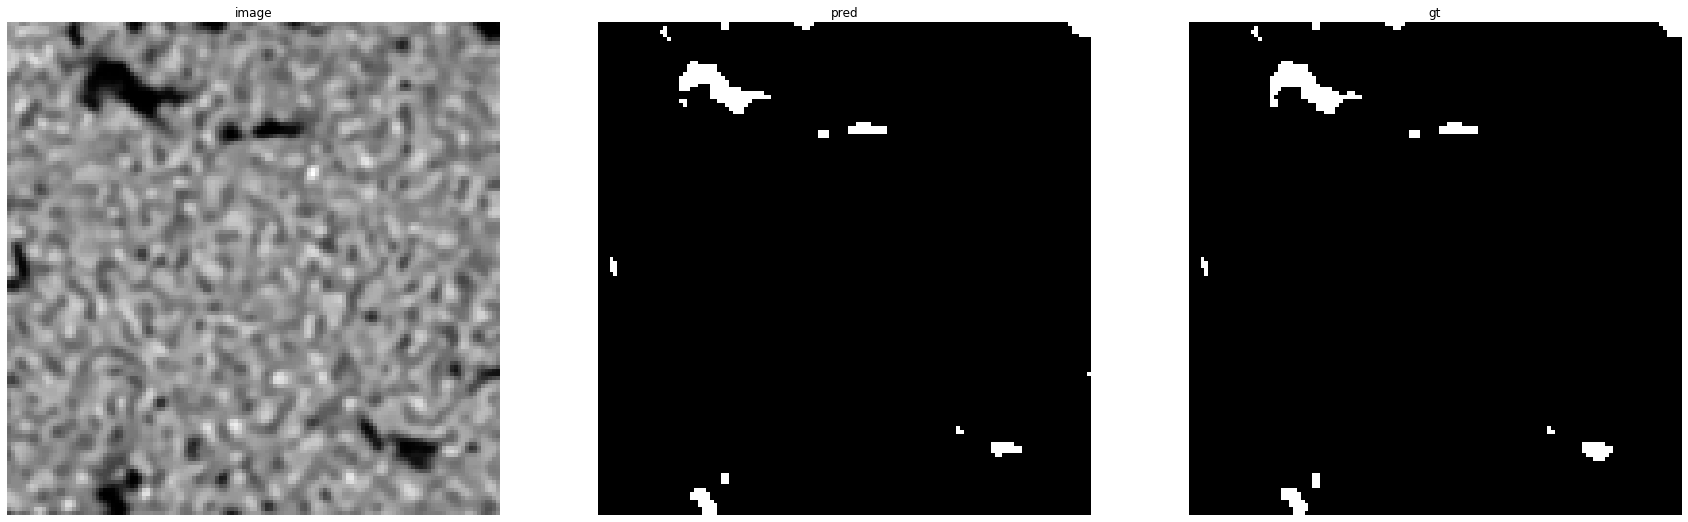

accuracy    : 0.99835205078125
precision   : 0.9736842105263158
recall      : 0.9283154121863799
f1          : 0.9504587155963303
pr_auc      : 0.9925499875428186
iou         : 0.9055944055944056


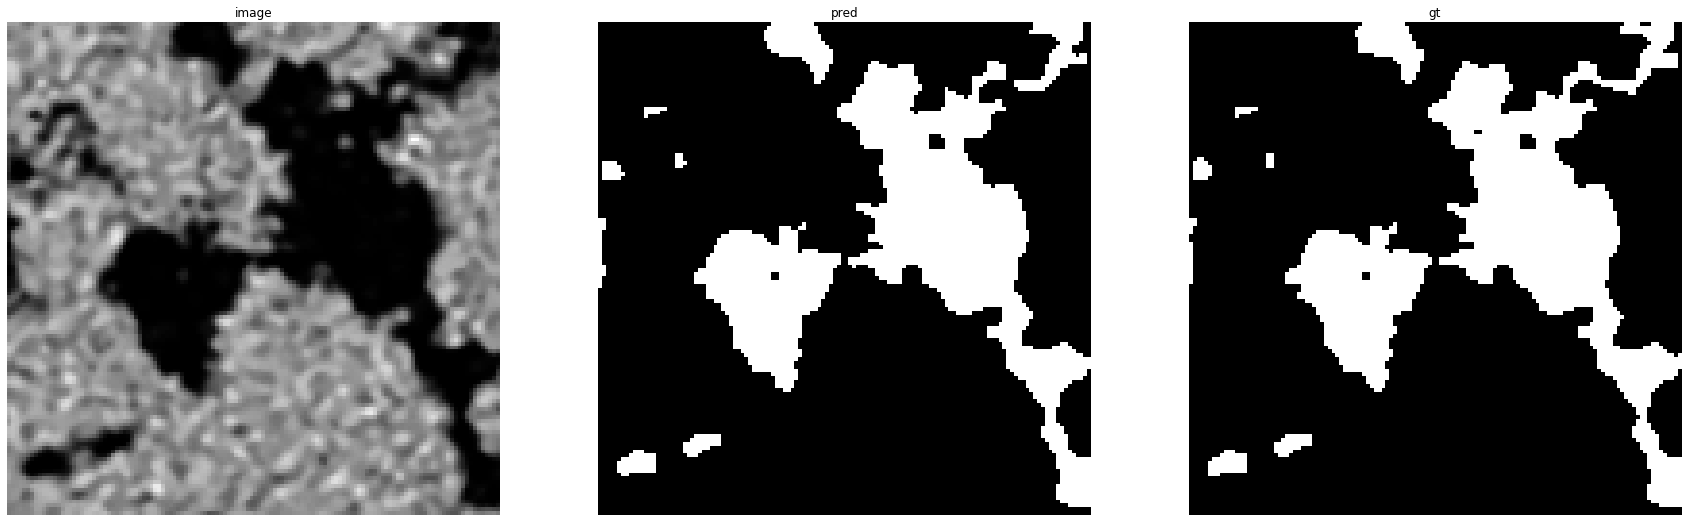

accuracy    : 0.99432373046875
precision   : 0.9859304486328644
recall      : 0.9893446989877464
f1          : 0.9876346230554447
pr_auc      : 0.999472257298506
iou         : 0.9755713159968479


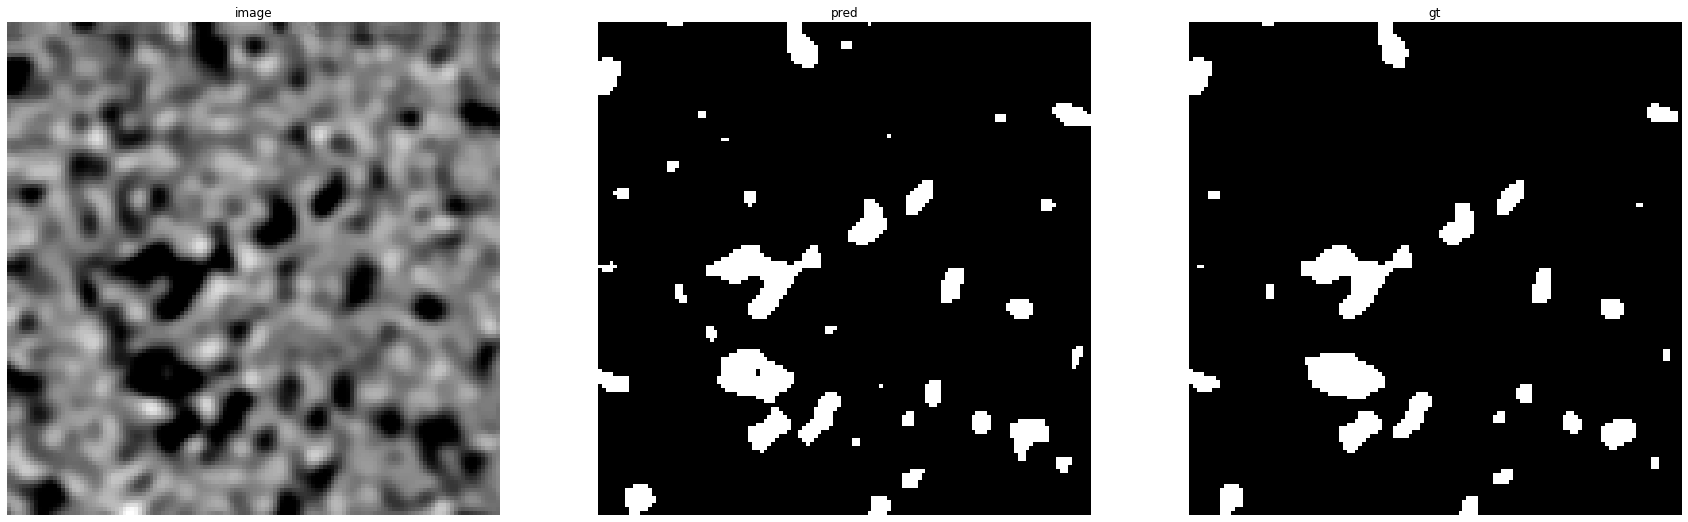

accuracy    : 0.9859619140625
precision   : 0.8386850152905199
recall      : 0.9829749103942652
f1          : 0.9051155115511551
pr_auc      : 0.9798958445288865
iou         : 0.8266767143933685


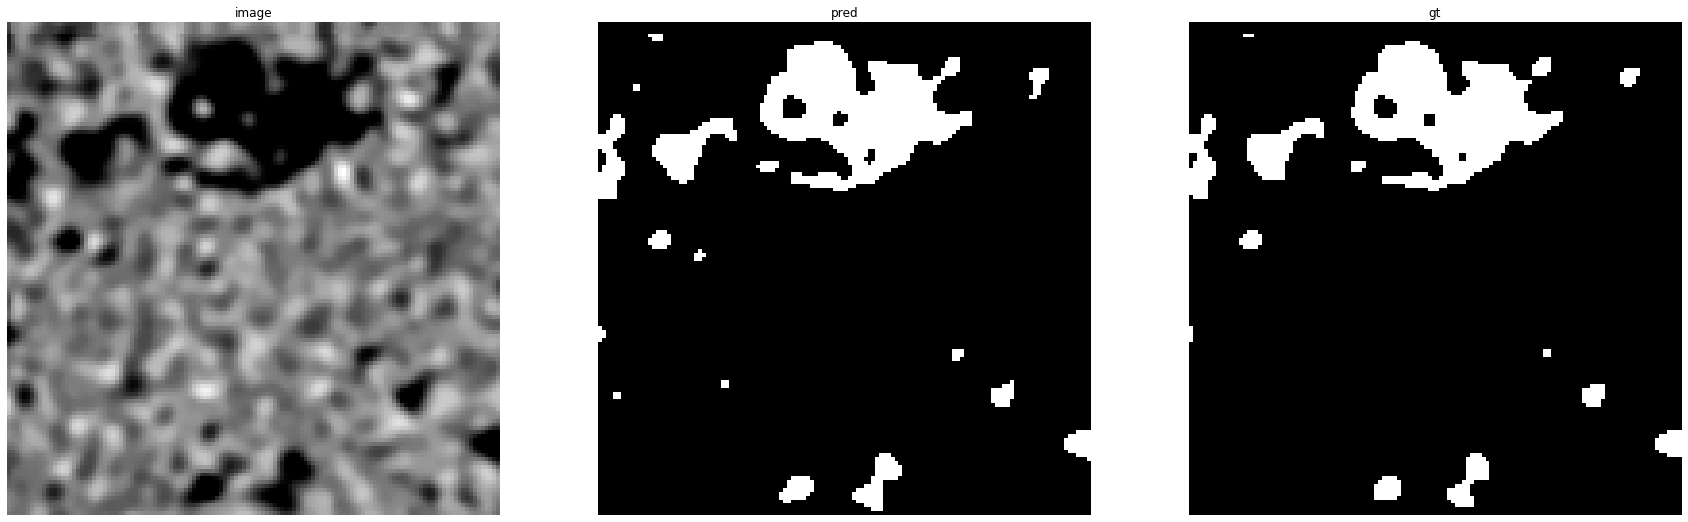

accuracy    : 0.9921875
precision   : 0.9375364856976065
recall      : 0.9870928088506453
f1          : 0.9616766467065867
pr_auc      : 0.9959898448526728
iou         : 0.9261822376009228


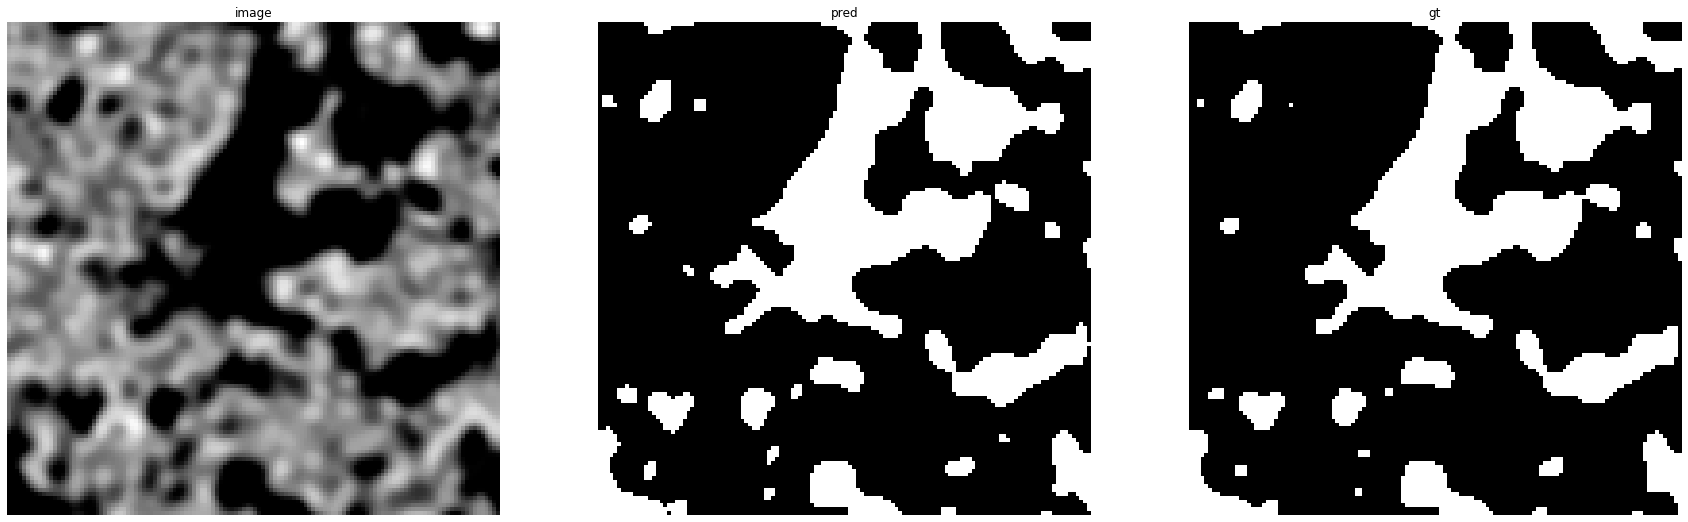

accuracy    : 0.98876953125
precision   : 0.9640582347588716
recall      : 0.9939024390243902
f1          : 0.9787528868360277
pr_auc      : 0.9984518159490745
iou         : 0.95838986883763


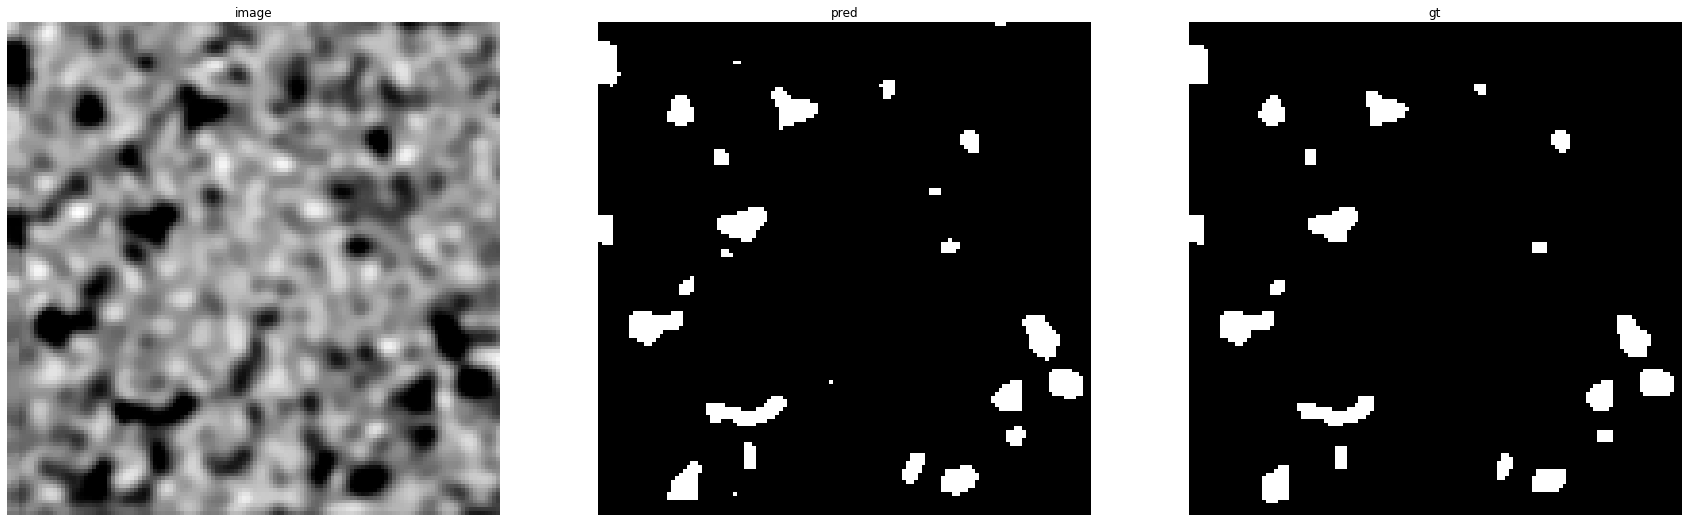

accuracy    : 0.99267578125
precision   : 0.8796992481203008
recall      : 0.9903264812575574
f1          : 0.931740614334471
pr_auc      : 0.9894609469945351
iou         : 0.8722044728434505


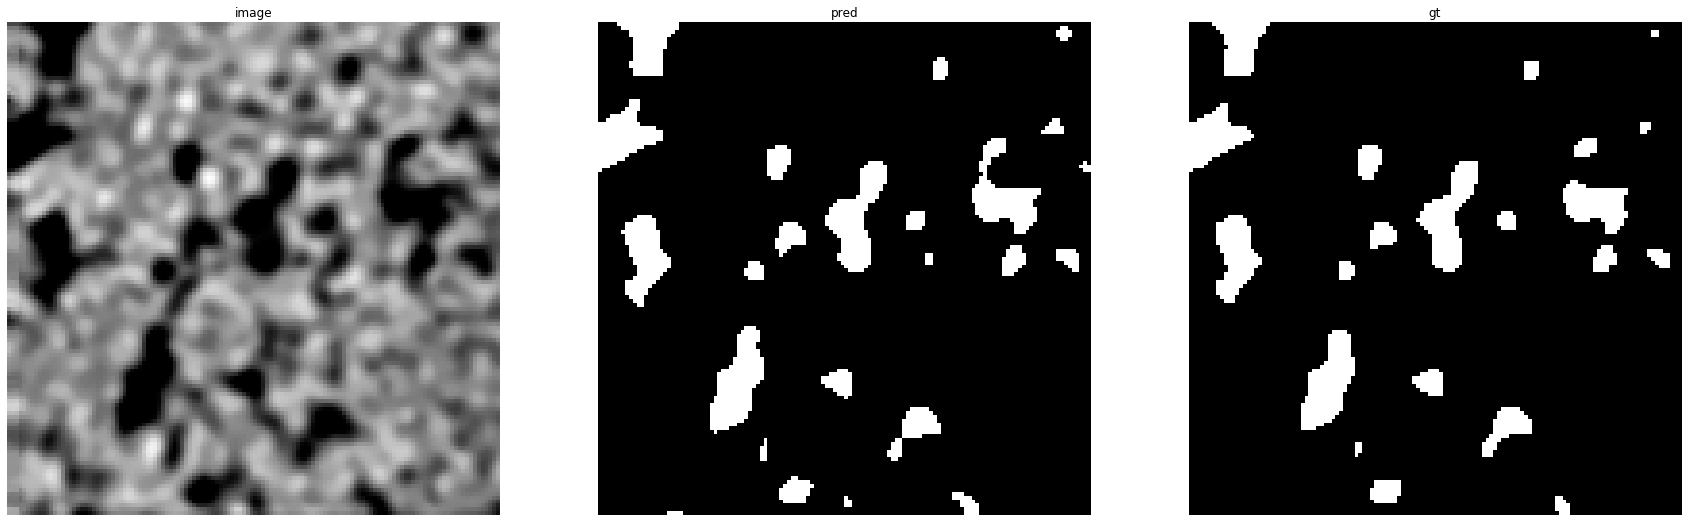

accuracy    : 0.98944091796875
precision   : 0.9069331667707683
recall      : 0.983739837398374
f1          : 0.9437764055898603
pr_auc      : 0.9933811719143278
iou         : 0.8935384615384615


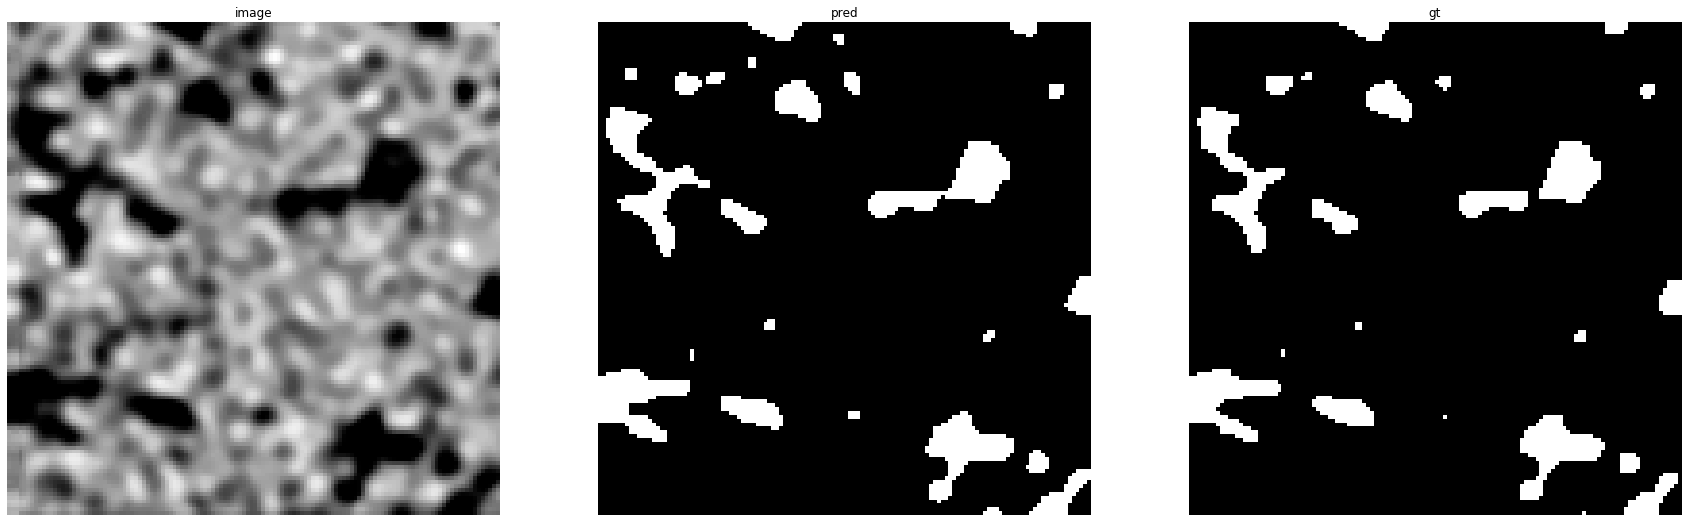

accuracy    : 0.98919677734375
precision   : 0.901323706377858
recall      : 0.9913964262078094
f1          : 0.944216829498897
pr_auc      : 0.991626817619294
iou         : 0.8943283582089552


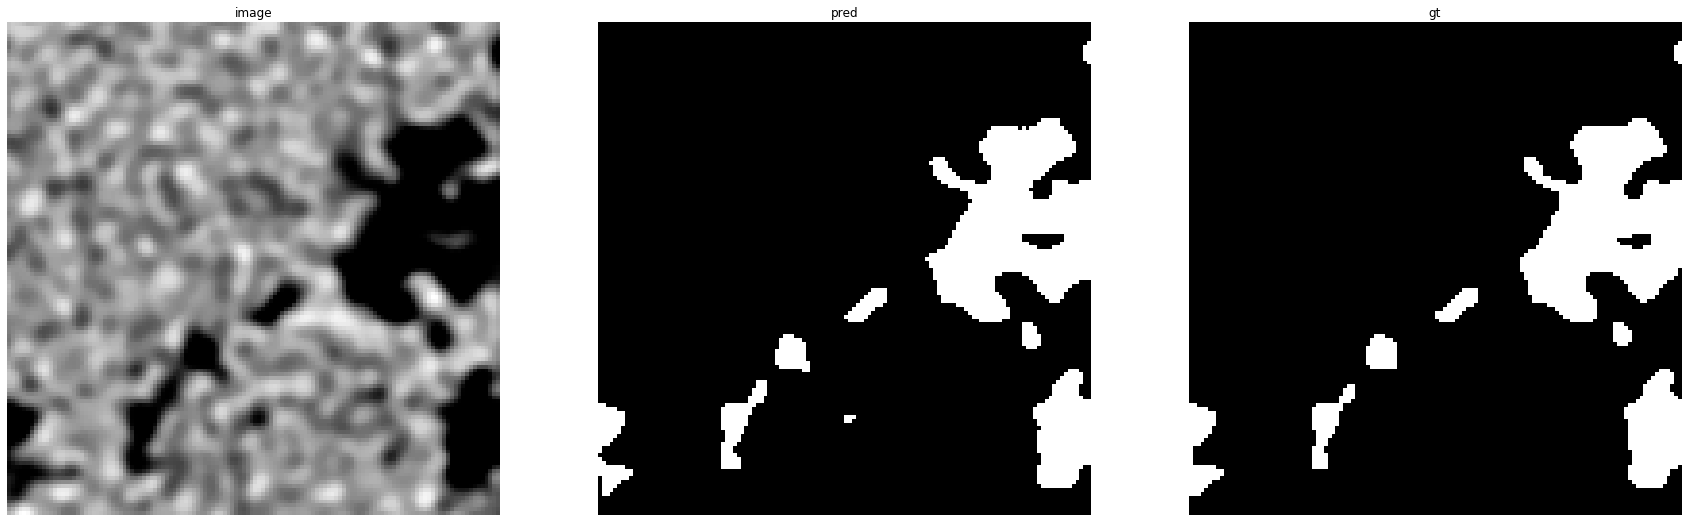

accuracy    : 0.99420166015625
precision   : 0.9702689948088721
recall      : 0.9846743295019157
f1          : 0.9774185880675066
pr_auc      : 0.9983018873247372
iou         : 0.9558344955834496


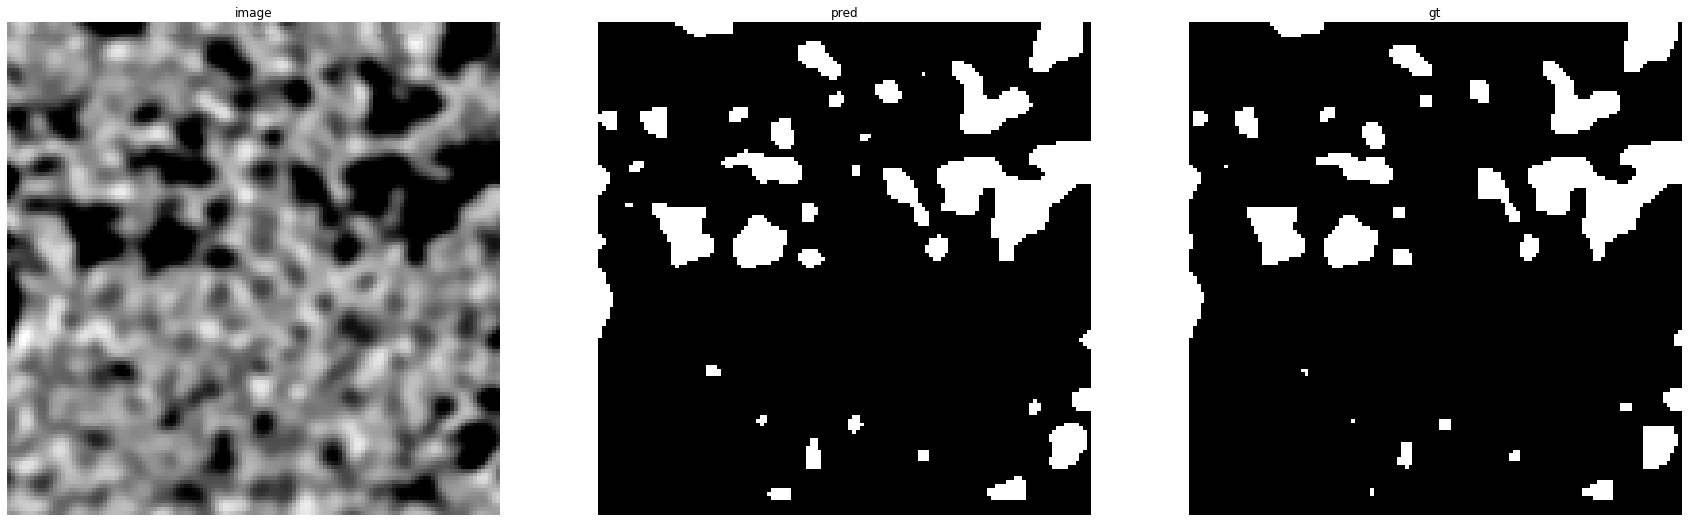

accuracy    : 0.985107421875
precision   : 0.8949858088930936
recall      : 0.9885057471264368
f1          : 0.9394240317775571
pr_auc      : 0.9908029567335974
iou         : 0.8857677902621723


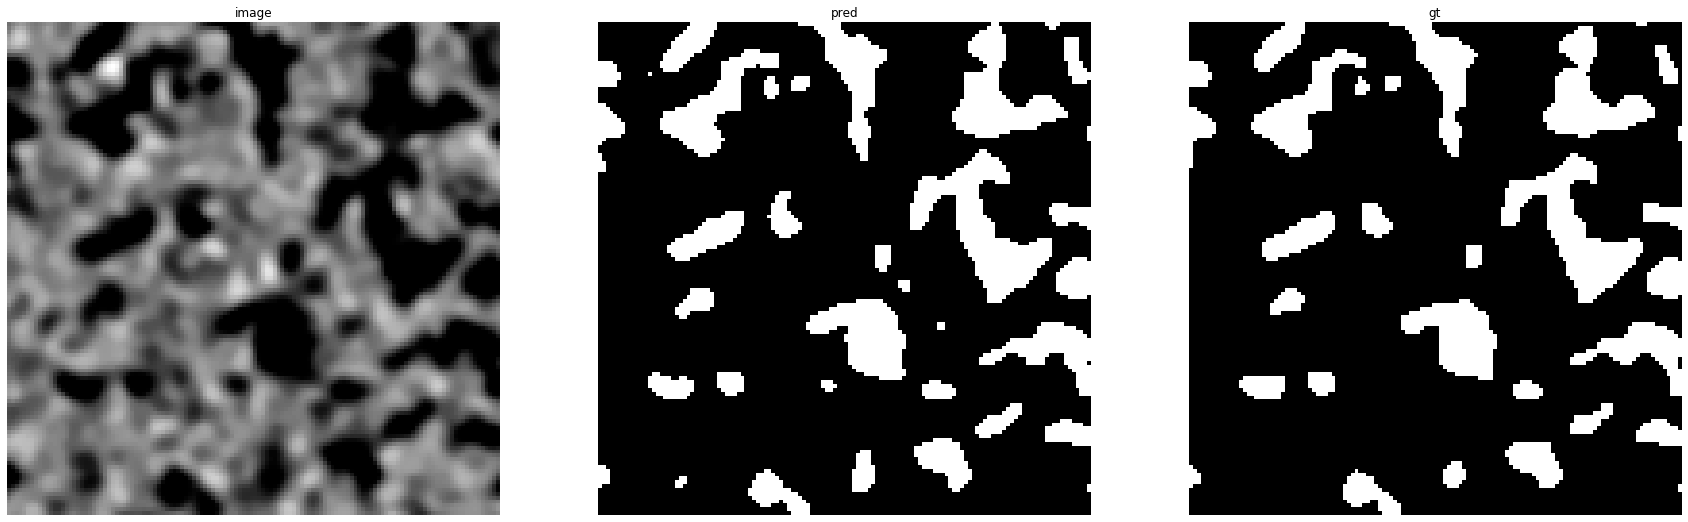

accuracy    : 0.98193359375
precision   : 0.9204236006051437
recall      : 0.9892682926829268
f1          : 0.9536050156739811
pr_auc      : 0.9956712401163305
iou         : 0.9113241461953265


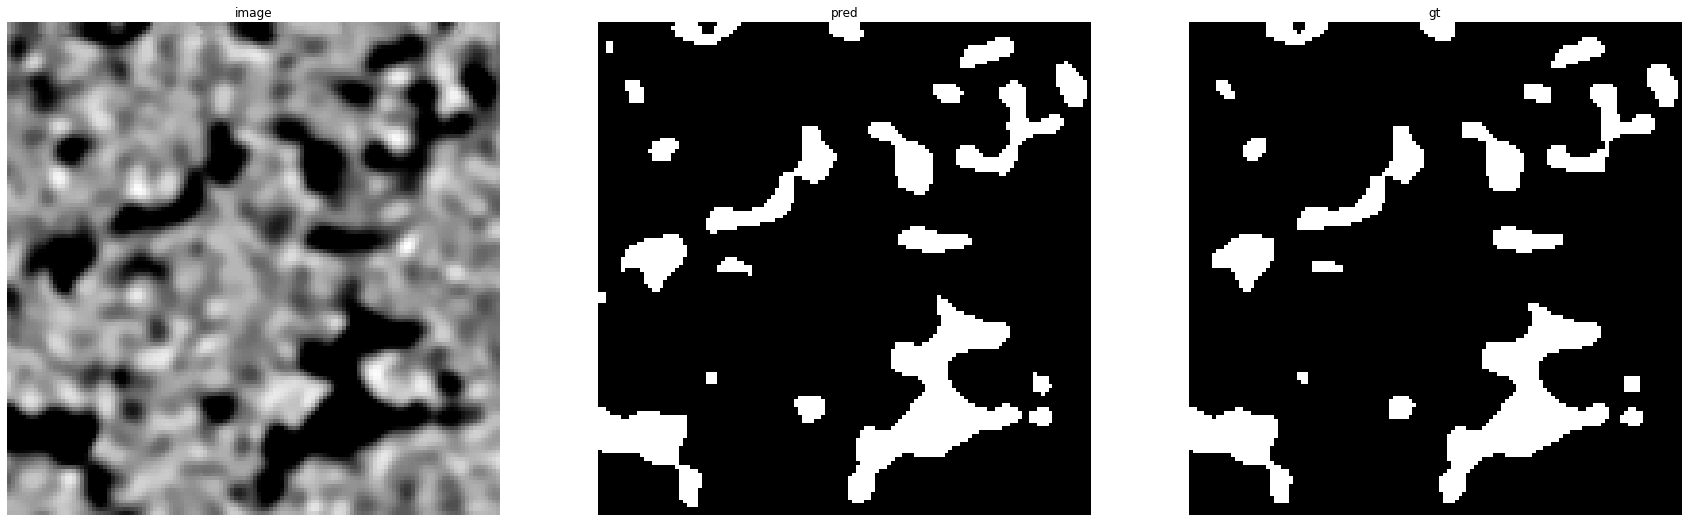

accuracy    : 0.98828125
precision   : 0.9377035830618893
recall      : 0.9833475661827498
f1          : 0.959983326385994
pr_auc      : 0.996085284783
iou         : 0.9230460921843687


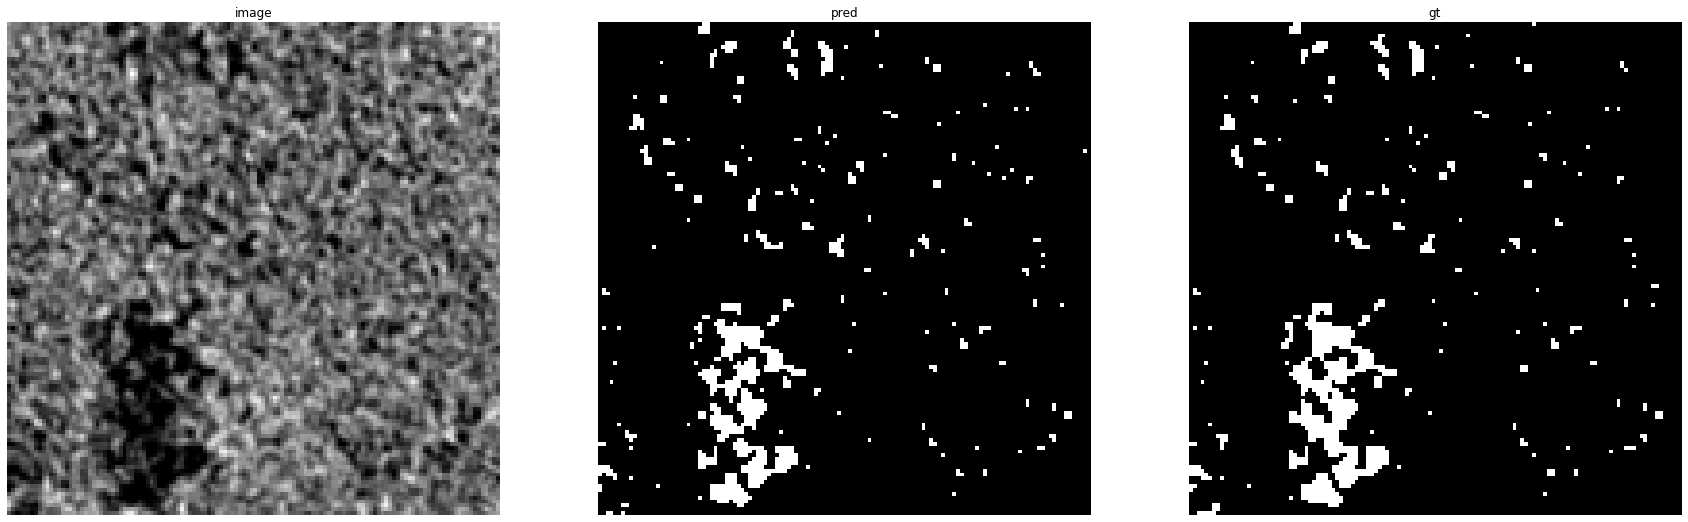

accuracy    : 0.99114990234375
precision   : 0.953757225433526
recall      : 0.8870967741935484
f1          : 0.9192200557103063
pr_auc      : 0.9784930307808707
iou         : 0.8505154639175257


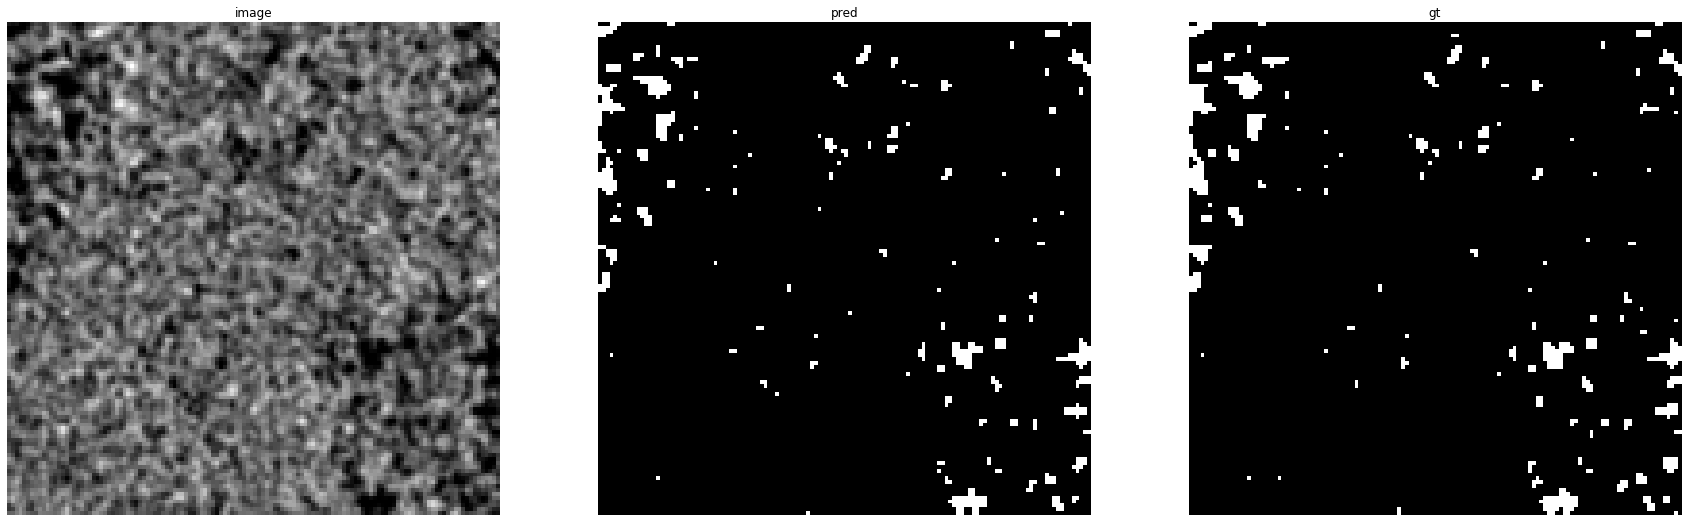

accuracy    : 0.99273681640625
precision   : 0.9663299663299664
recall      : 0.8528974739970282
f1          : 0.9060773480662984
pr_auc      : 0.9779088735172575
iou         : 0.8282828282828283


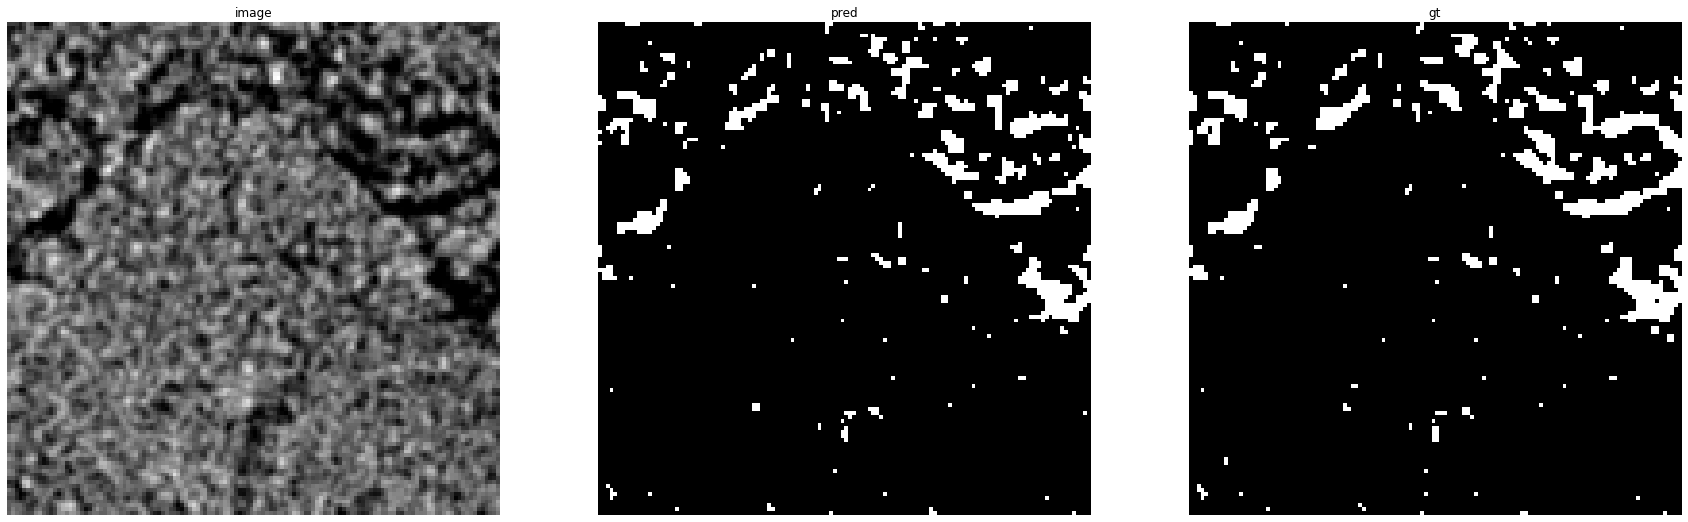

accuracy    : 0.9871826171875
precision   : 0.98359161349134
recall      : 0.8489378442171518
f1          : 0.9113175675675675
pr_auc      : 0.9826110324466267
iou         : 0.8370830100853375


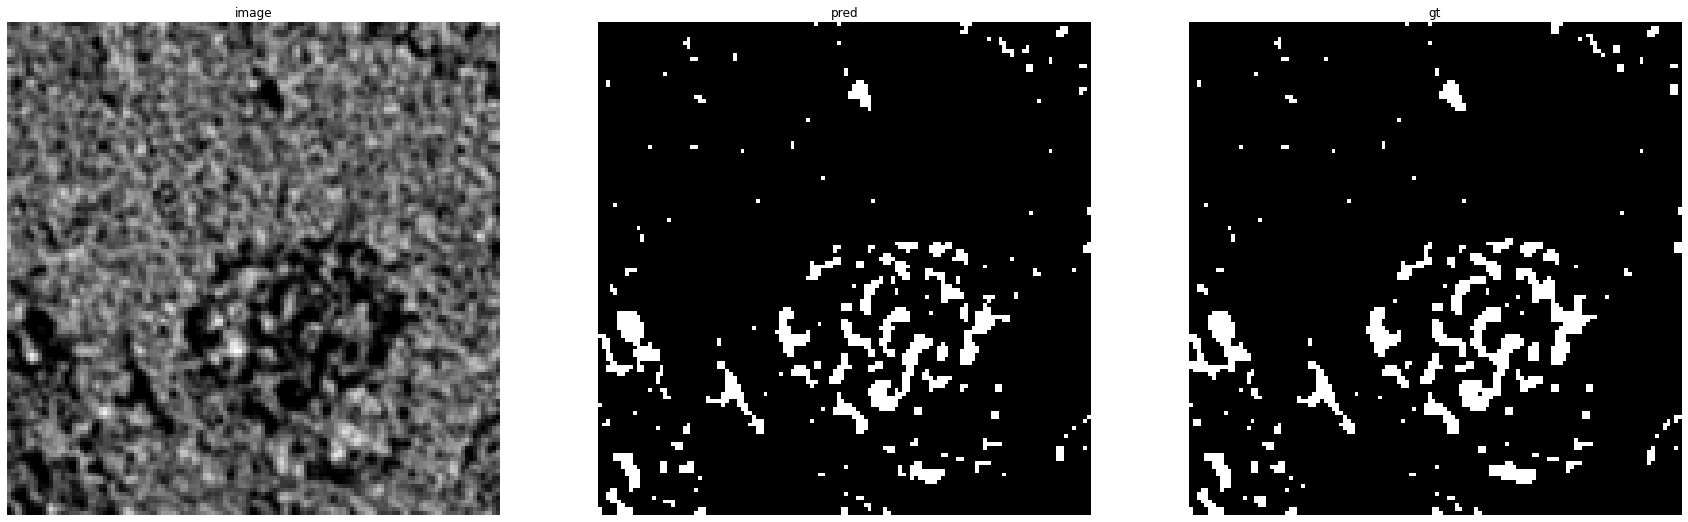

accuracy    : 0.98828125
precision   : 0.9704301075268817
recall      : 0.8719806763285024
f1          : 0.9185750636132315
pr_auc      : 0.9813283233184117
iou         : 0.8494117647058823


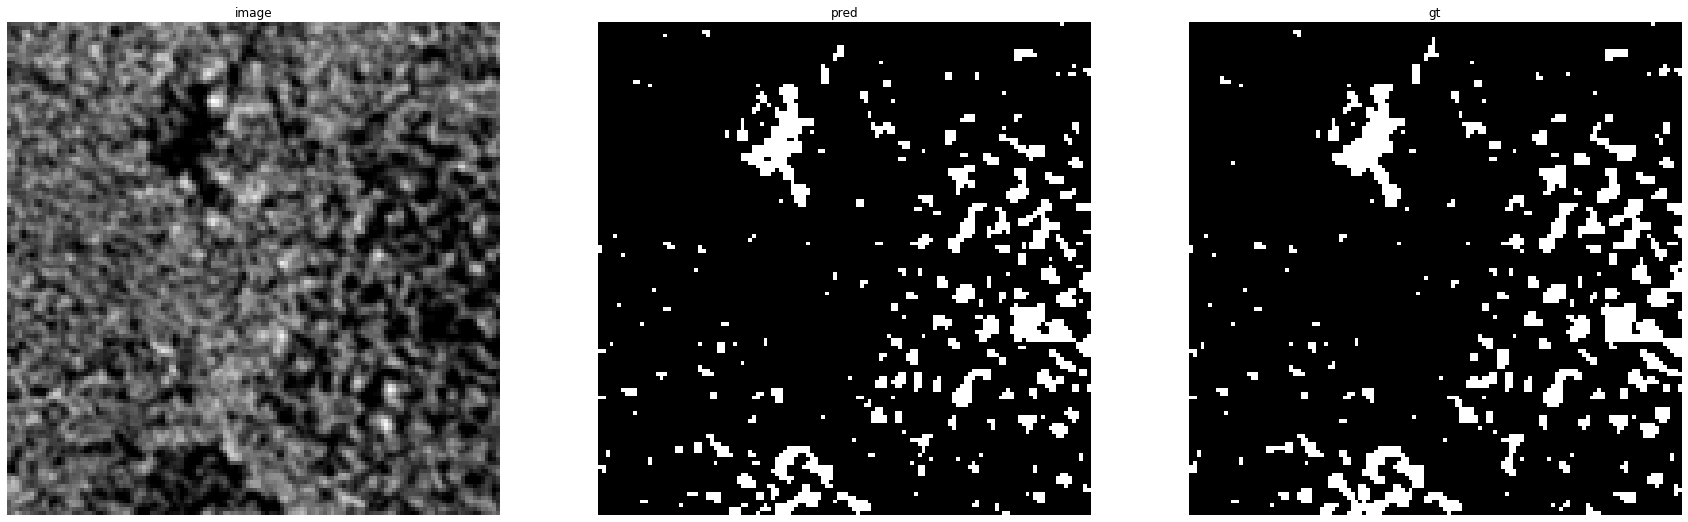

accuracy    : 0.98211669921875
precision   : 0.9800995024875622
recall      : 0.8579205225911812
f1          : 0.9149492017416546
pr_auc      : 0.984360651719725
iou         : 0.8432316746923488


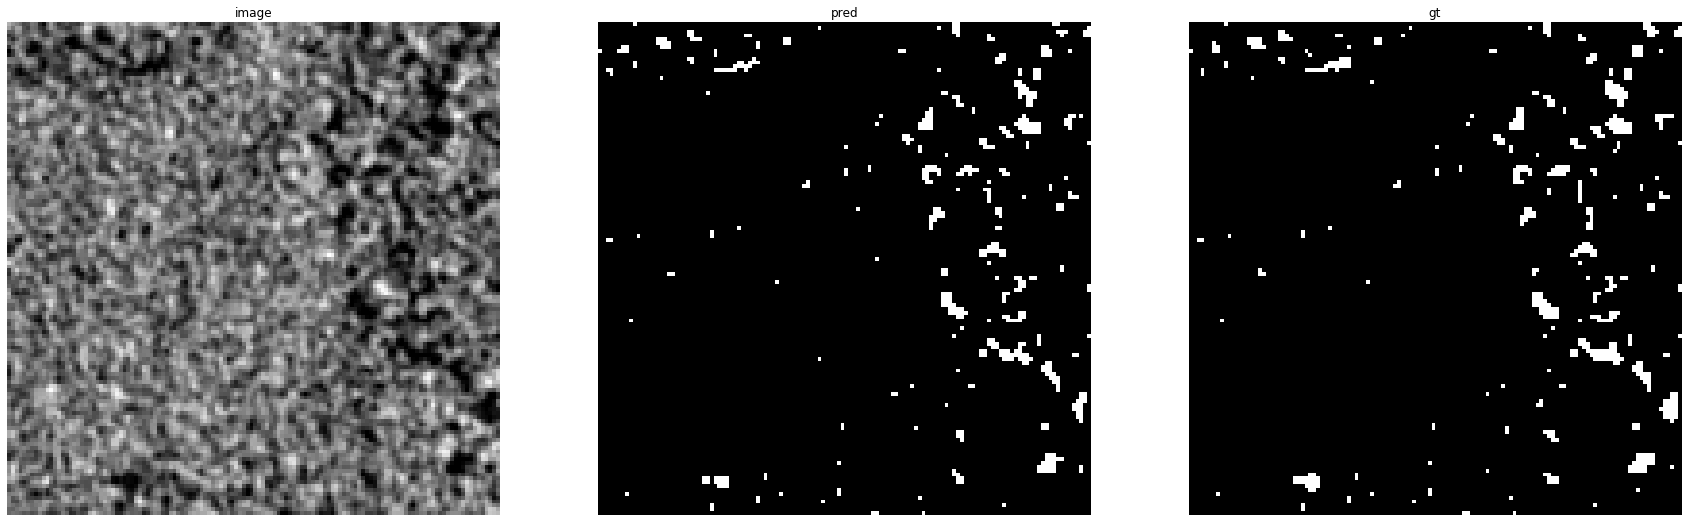

accuracy    : 0.99371337890625
precision   : 0.9648798521256932
recall      : 0.8613861386138614
f1          : 0.9102005231037489
pr_auc      : 0.9765705877550729
iou         : 0.8352


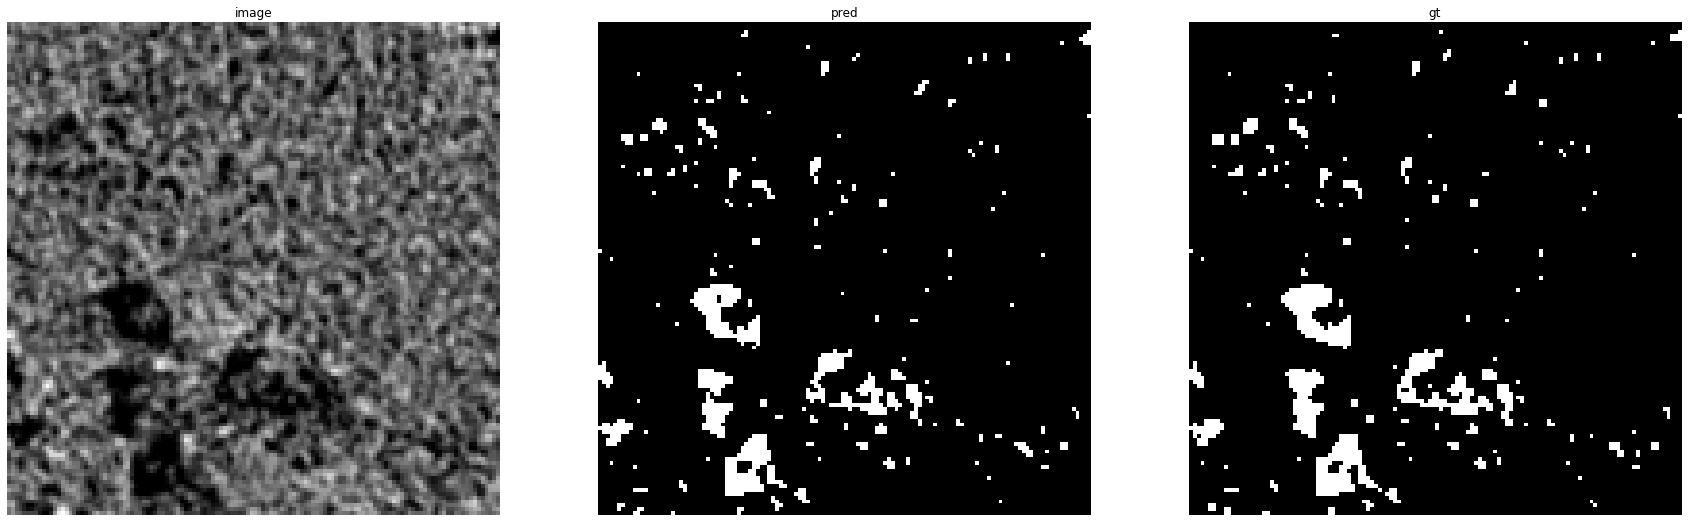

accuracy    : 0.99176025390625
precision   : 0.9609375
recall      : 0.8959417273673257
f1          : 0.9273021001615509
pr_auc      : 0.9847783385611469
iou         : 0.8644578313253012


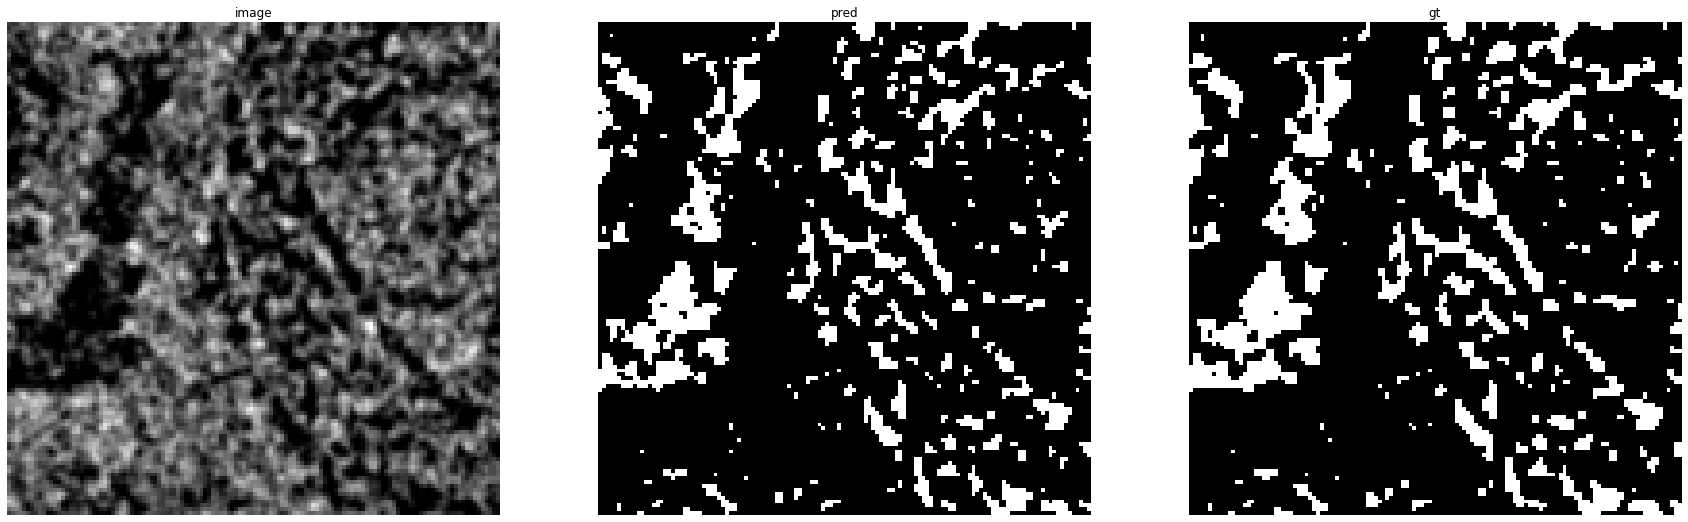

accuracy    : 0.97216796875
precision   : 0.9869109947643979
recall      : 0.8624183006535948
f1          : 0.9204743634461109
pr_auc      : 0.9880247607925073
iou         : 0.8526655896607431


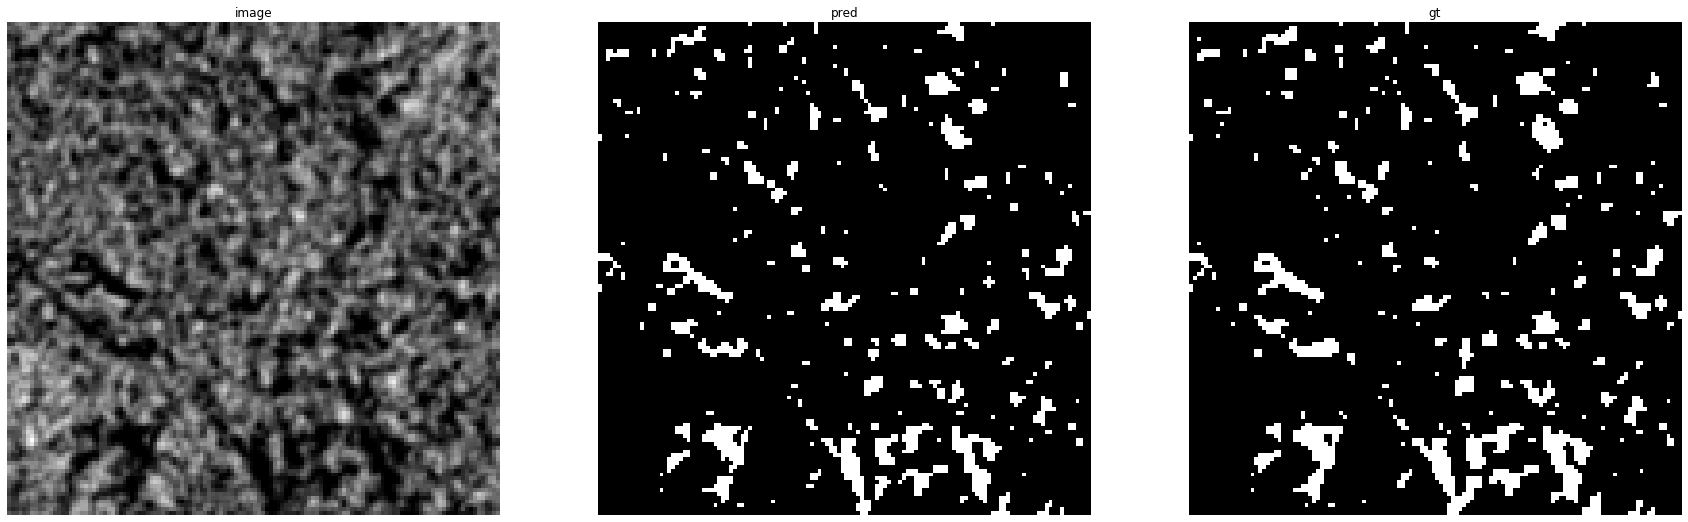

accuracy    : 0.982421875
precision   : 0.9775910364145658
recall      : 0.8450363196125908
f1          : 0.9064935064935065
pr_auc      : 0.9818121580346018
iou         : 0.828978622327791


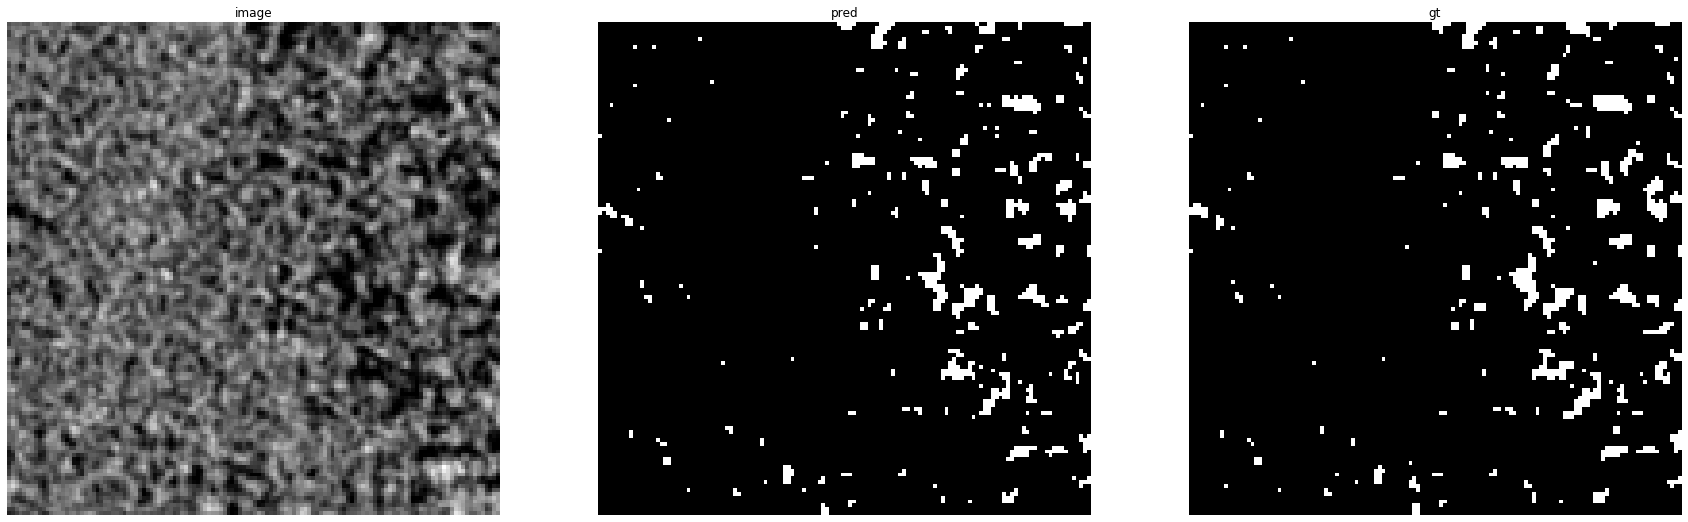

accuracy    : 0.99005126953125
precision   : 0.9575289575289575
recall      : 0.851258581235698
f1          : 0.9012719563900666
pr_auc      : 0.9724522733853525
iou         : 0.8202866593164277


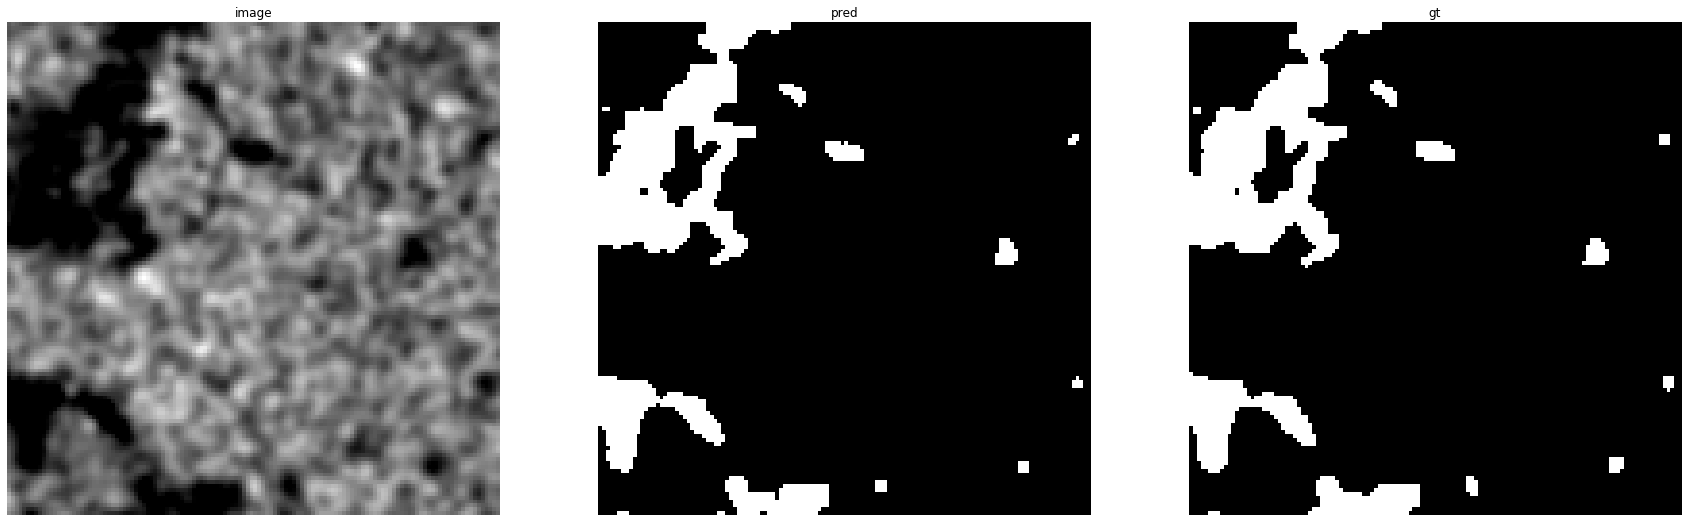

accuracy    : 0.9918212890625
precision   : 0.9964139344262295
recall      : 0.9387065637065637
f1          : 0.9666998011928429
pr_auc      : 0.9984792518403764
iou         : 0.9355459355459356


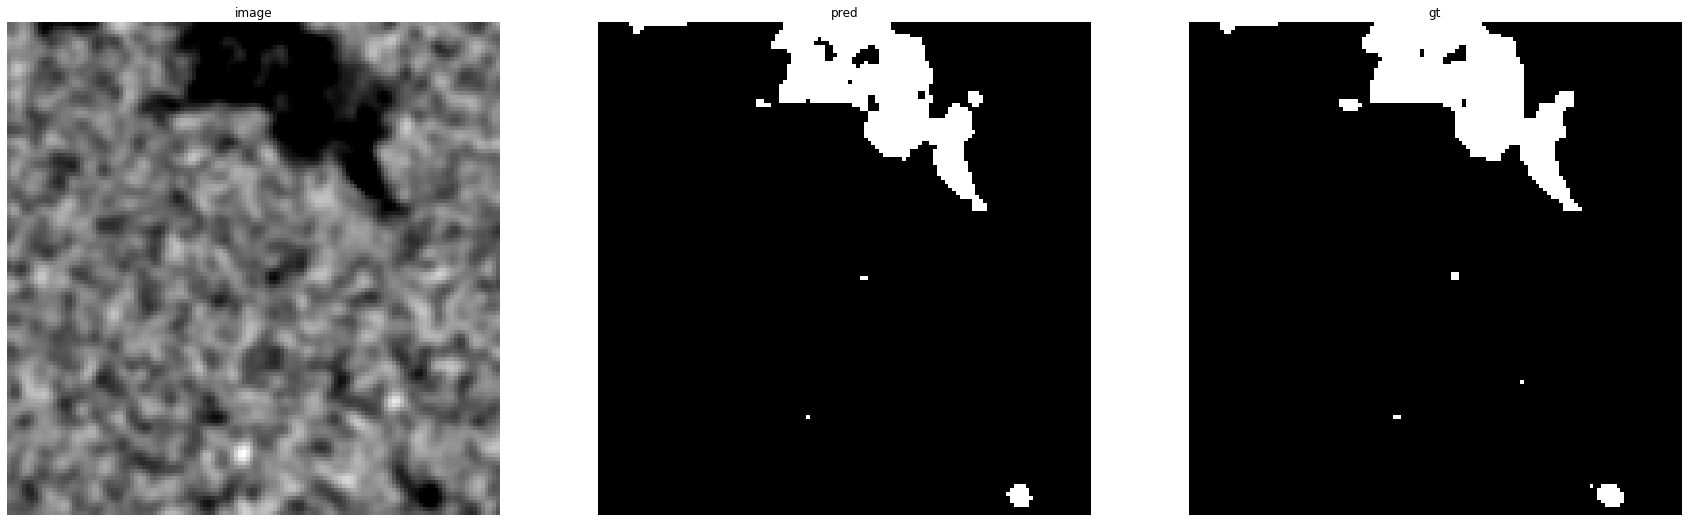

accuracy    : 0.9931640625
precision   : 0.9991666666666666
recall      : 0.9152671755725191
f1          : 0.9553784860557769
pr_auc      : 0.9987039849289157
iou         : 0.9145690312738368


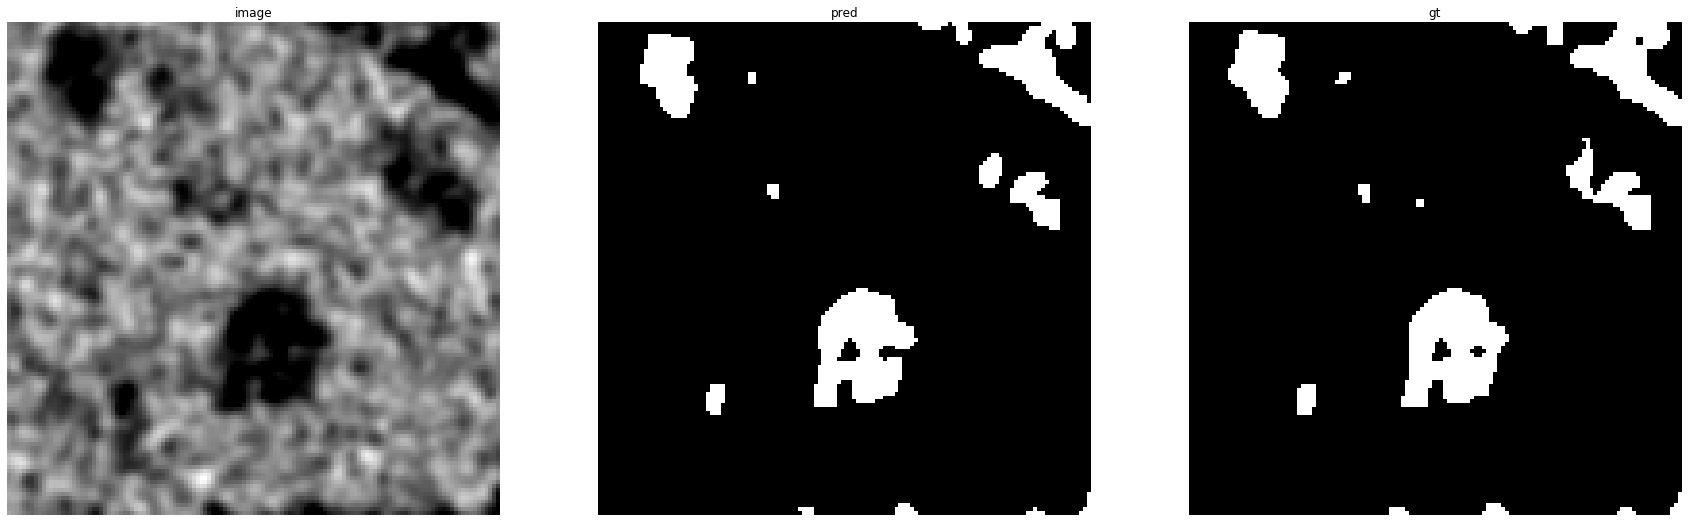

accuracy    : 0.9906005859375
precision   : 0.9978245105148659
recall      : 0.9011132940406025
f1          : 0.9470061940812113
pr_auc      : 0.9966900645388432
iou         : 0.8993464052287582


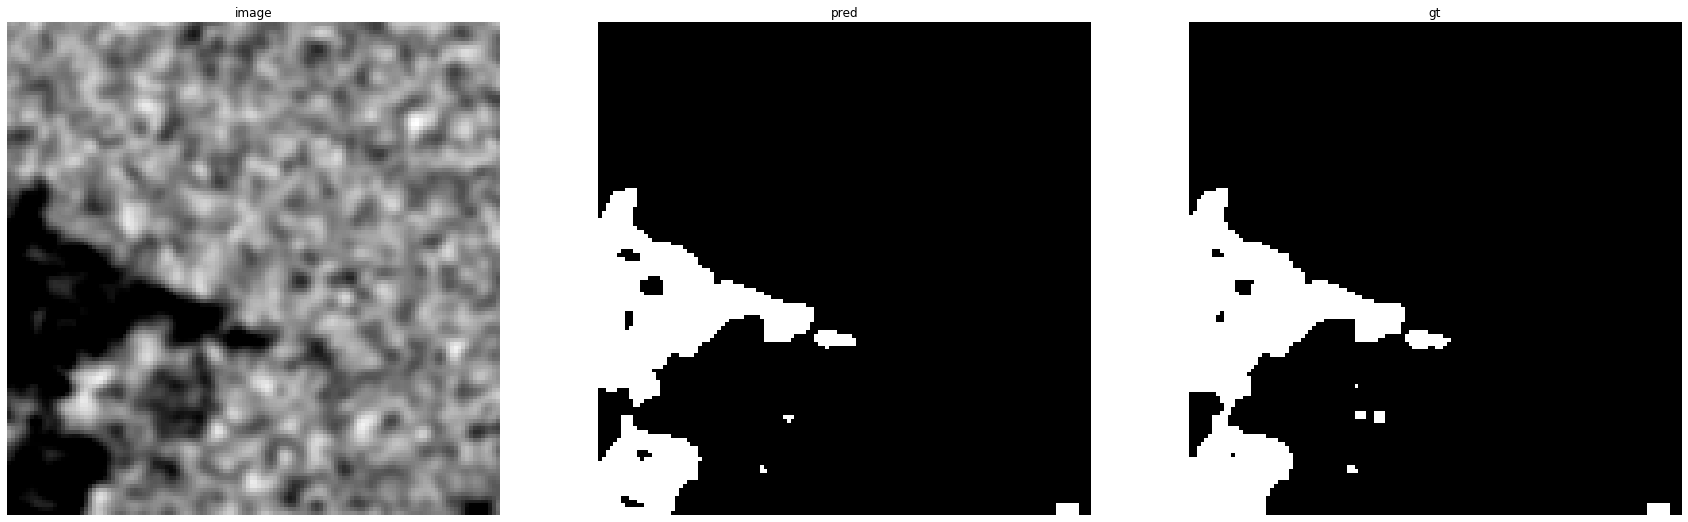

accuracy    : 0.9932861328125
precision   : 0.9989106753812637
recall      : 0.9443872296601442
f1          : 0.9708840656431975
pr_auc      : 0.9990947857953616
iou         : 0.9434156378600823


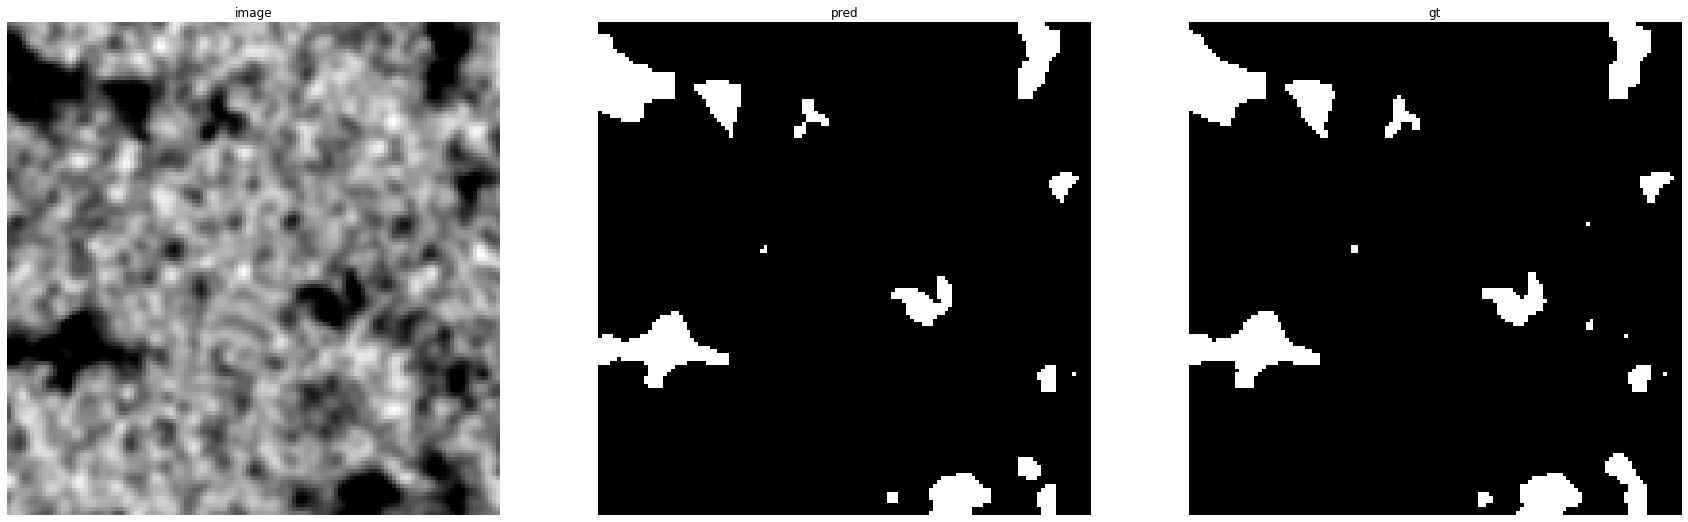

accuracy    : 0.99224853515625
precision   : 0.9991850040749797
recall      : 0.9068047337278107
f1          : 0.9507561070182241
pr_auc      : 0.9973546422553283
iou         : 0.9061345158906134


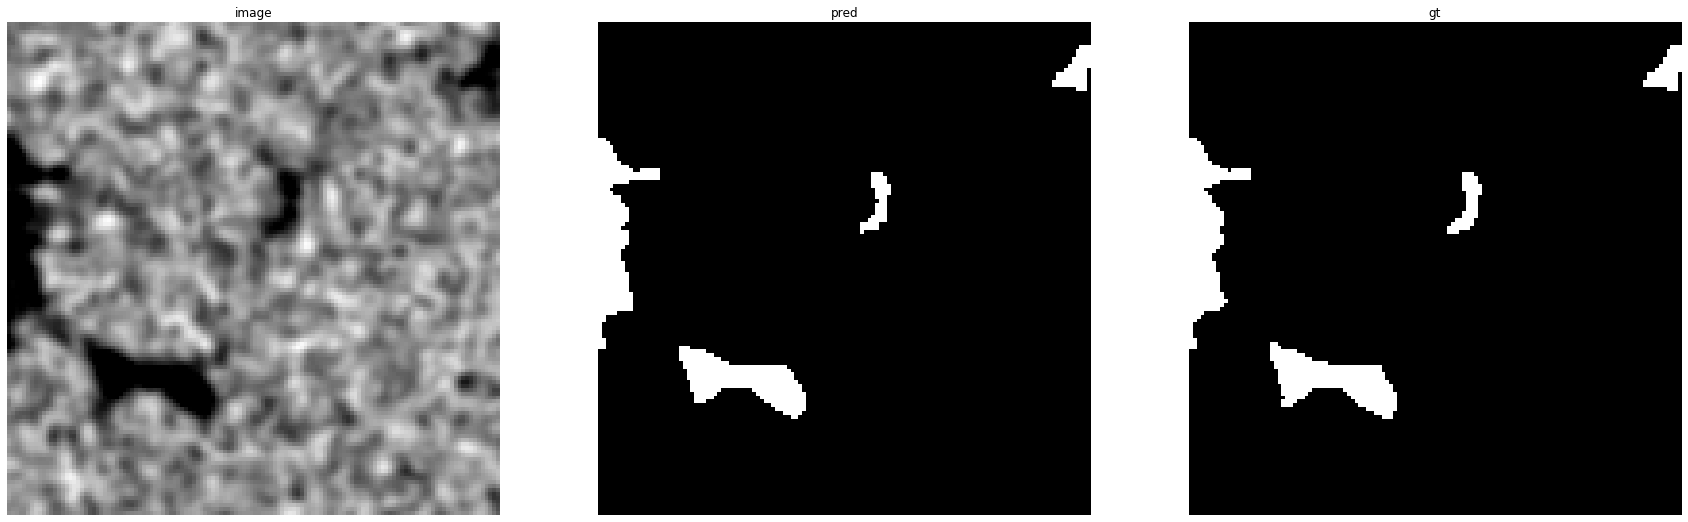

accuracy    : 0.997314453125
precision   : 0.9961538461538462
recall      : 0.9498777506112469
f1          : 0.9724655819774719
pr_auc      : 0.9991064891490861
iou         : 0.9464068209500609


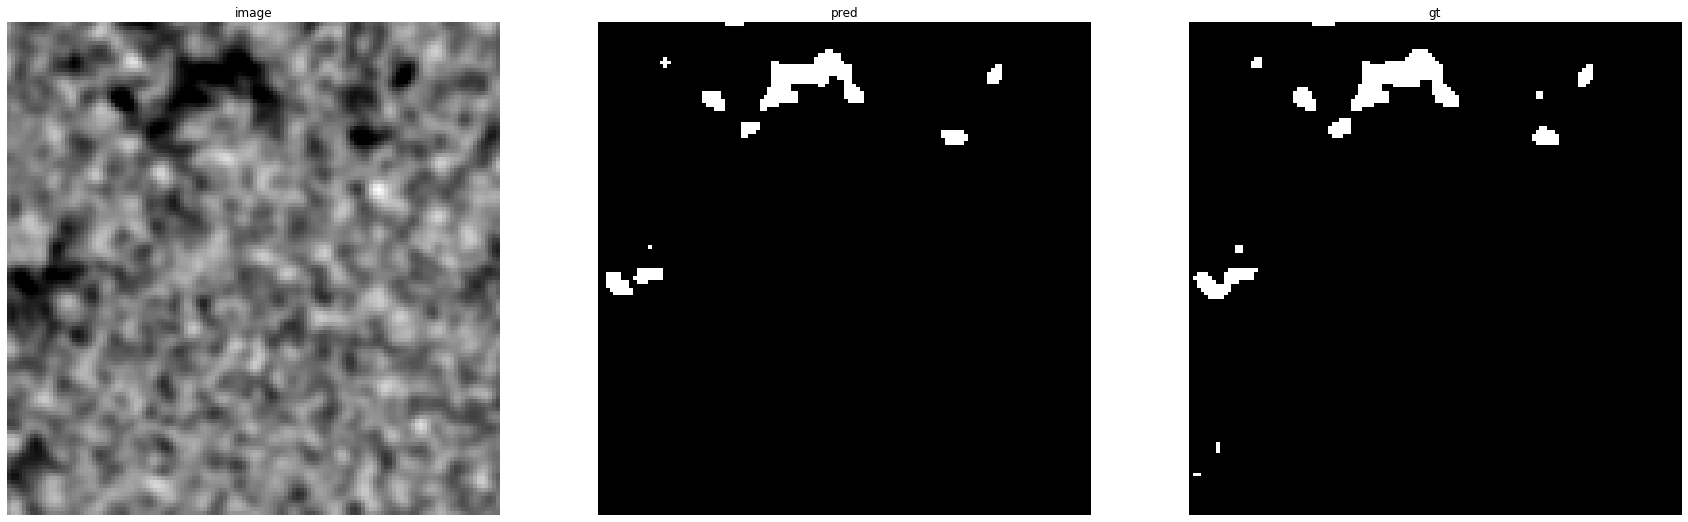

accuracy    : 0.99517822265625
precision   : 0.9911504424778761
recall      : 0.8155339805825242
f1          : 0.8948069241011984
pr_auc      : 0.9916209306094905
iou         : 0.8096385542168675


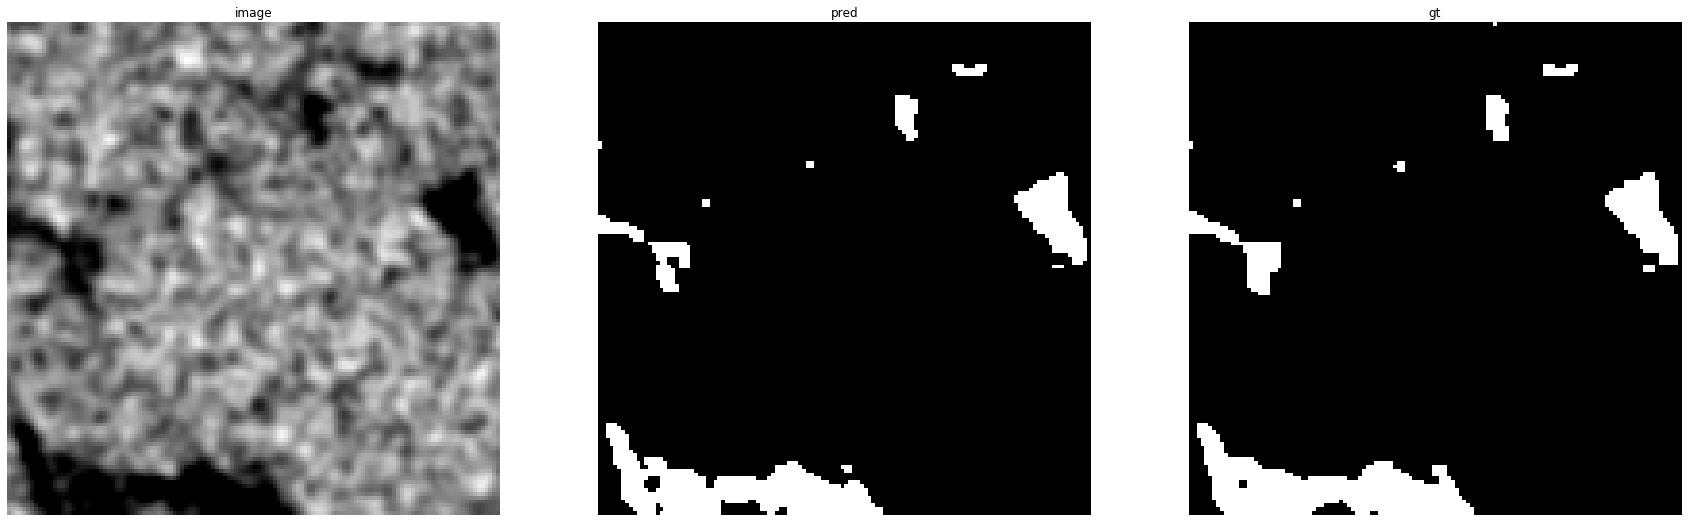

accuracy    : 0.99249267578125
precision   : 0.997411561691113
recall      : 0.9059561128526645
f1          : 0.9494866529774127
pr_auc      : 0.997008755172937
iou         : 0.9038311180609852


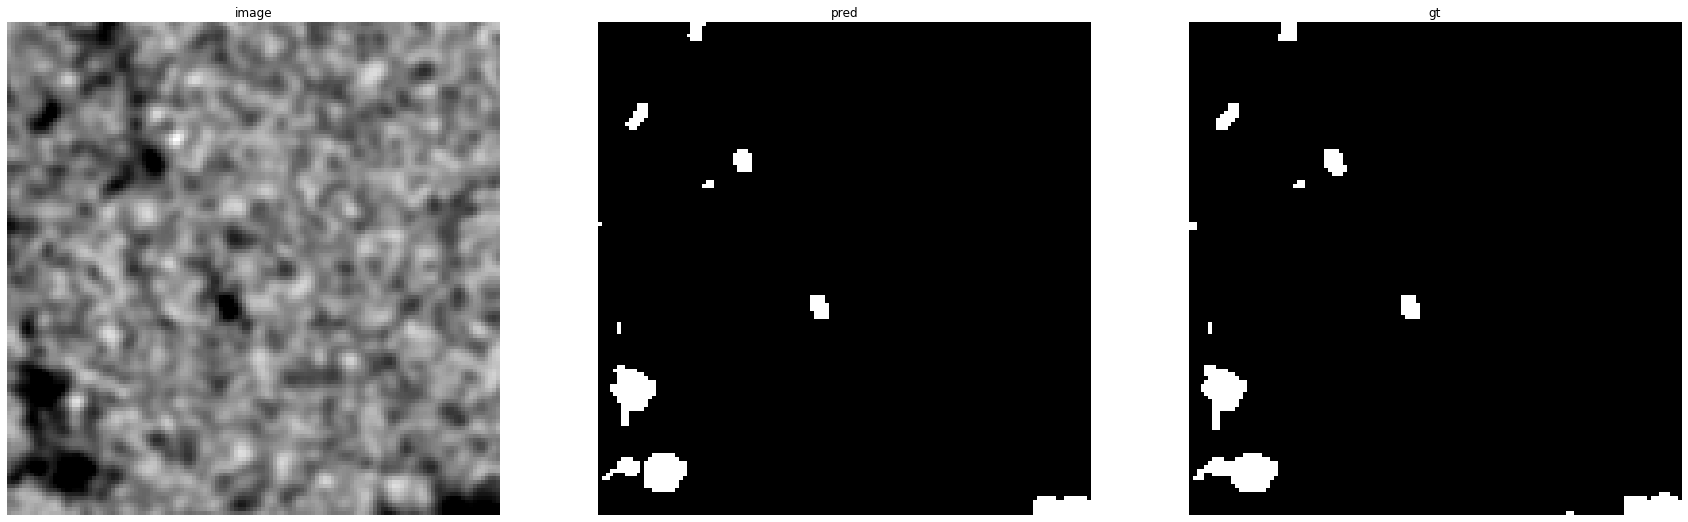

accuracy    : 0.99713134765625
precision   : 0.9925187032418953
recall      : 0.9004524886877828
f1          : 0.9442467378410438
pr_auc      : 0.9954880674421414
iou         : 0.8943820224719101


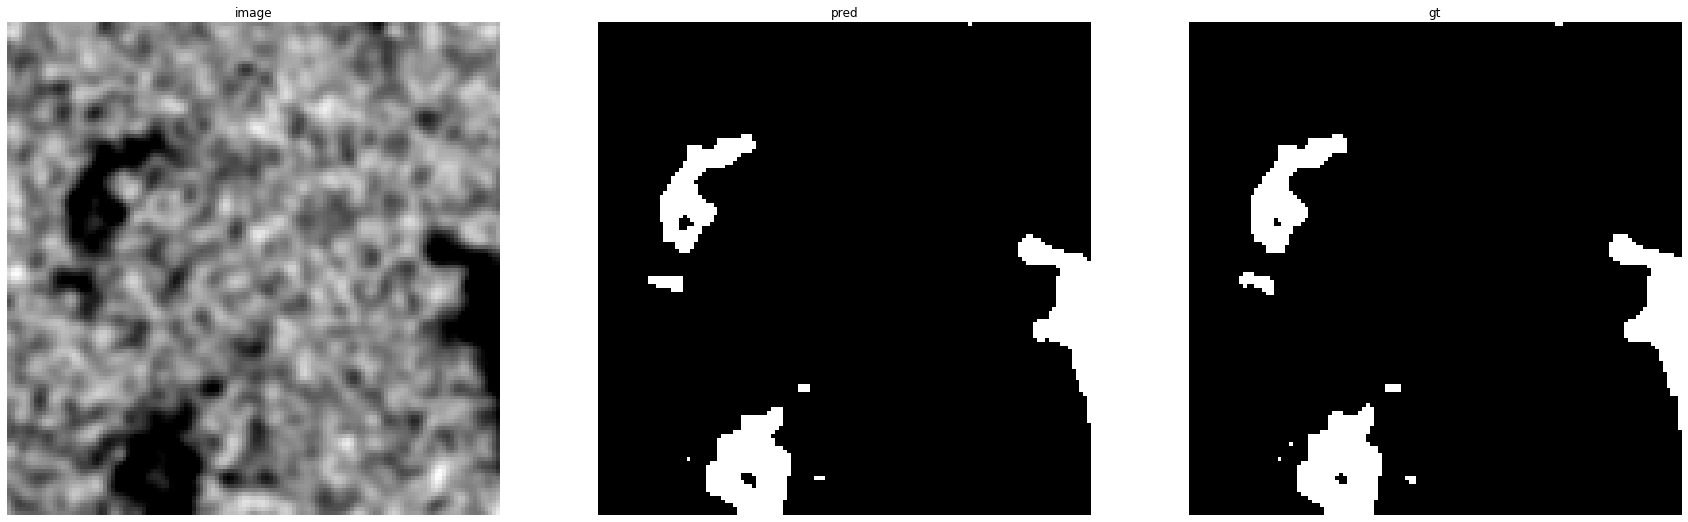

accuracy    : 0.9951171875
precision   : 0.9964943032427696
recall      : 0.9373454245671888
f1          : 0.9660152931180969
pr_auc      : 0.9987925009951791
iou         : 0.934264585045193


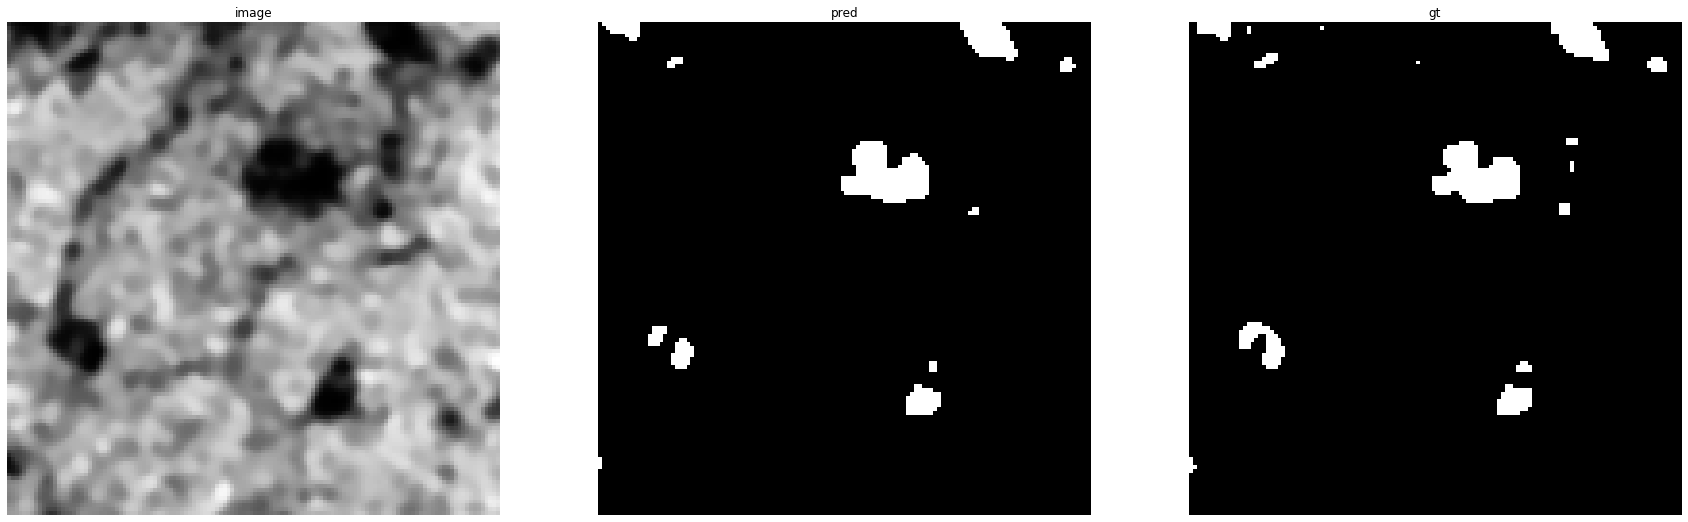

accuracy    : 0.995361328125
precision   : 0.9756554307116105
recall      : 0.8921232876712328
f1          : 0.9320214669051878
pr_auc      : 0.9841453149582625
iou         : 0.8726968174204355


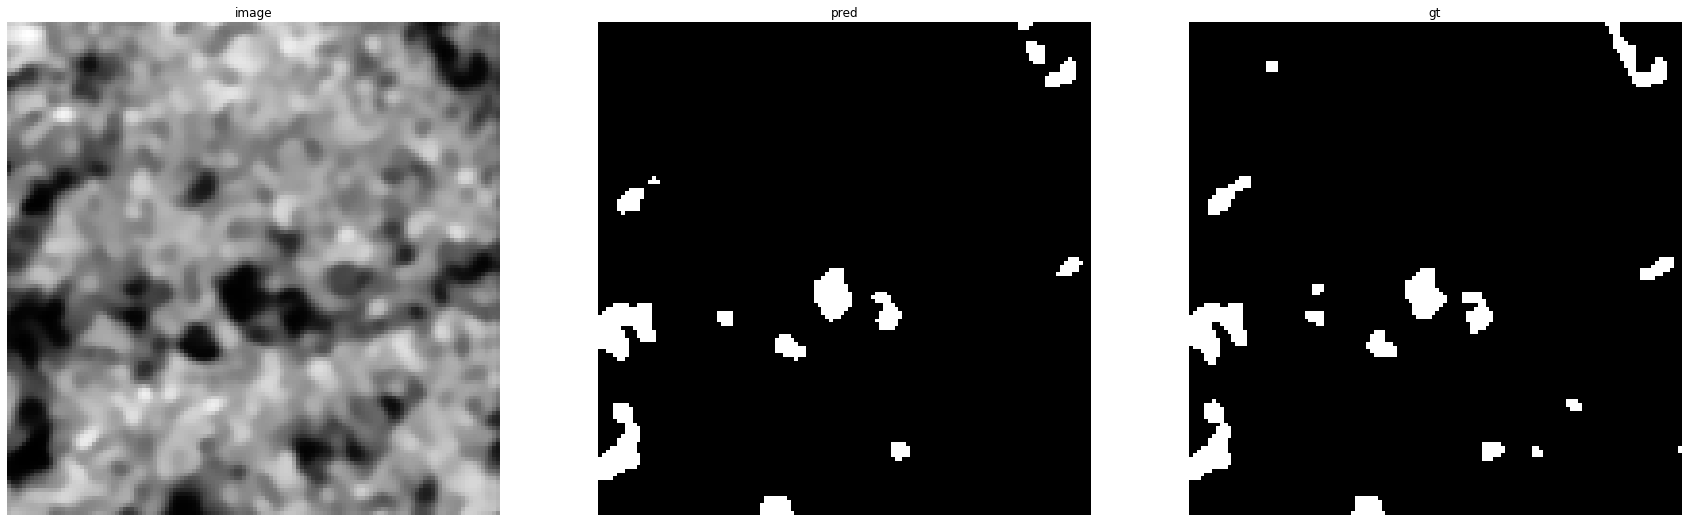

accuracy    : 0.99169921875
precision   : 0.9649923896499238
recall      : 0.8487282463186078
f1          : 0.9031339031339032
pr_auc      : 0.9743914150994732
iou         : 0.8233766233766234


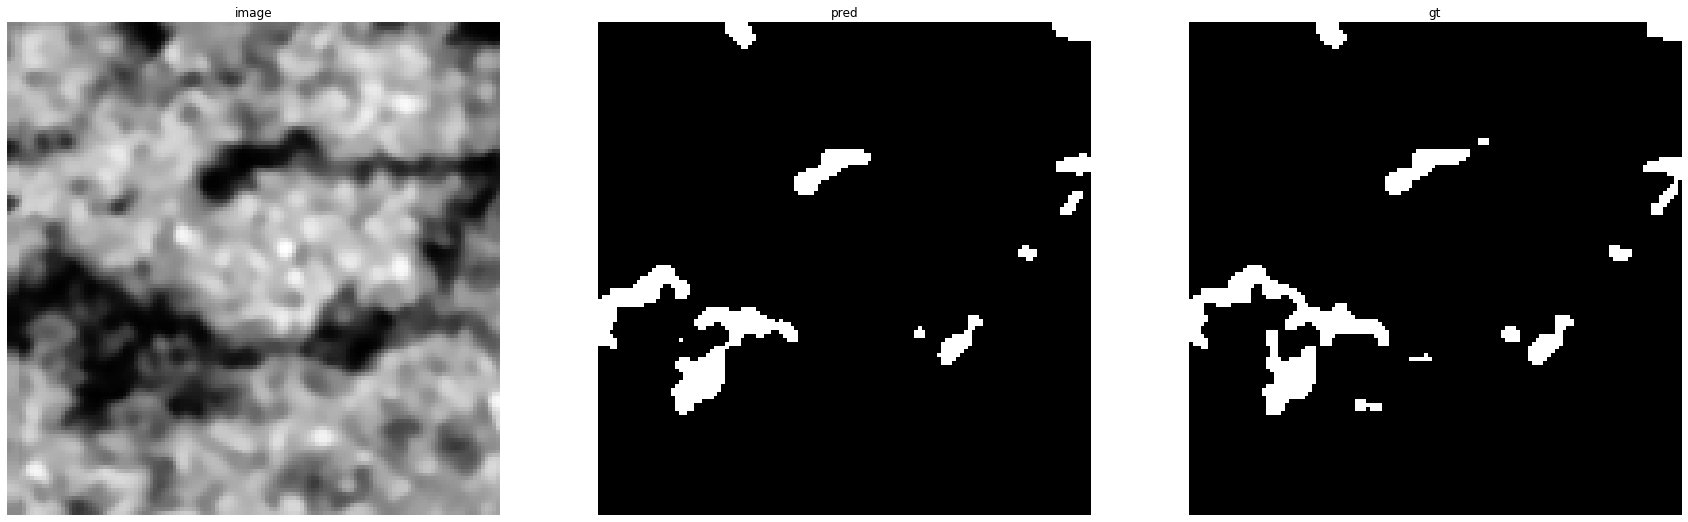

accuracy    : 0.99017333984375
precision   : 0.9656441717791411
recall      : 0.8554347826086957
f1          : 0.9072046109510086
pr_auc      : 0.9765082279868383
iou         : 0.830168776371308


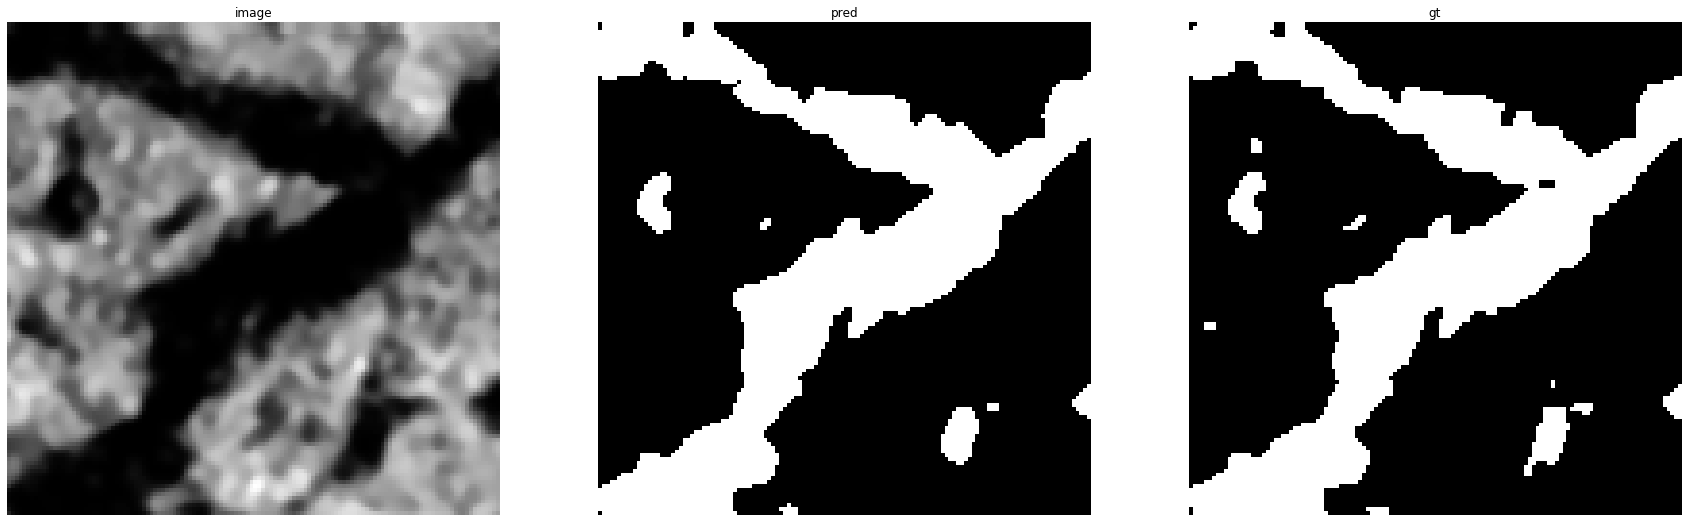

accuracy    : 0.98883056640625
precision   : 0.9812552653748947
recall      : 0.9802230170418683
f1          : 0.9807388695926745
pr_auc      : 0.9985064909418171
iou         : 0.9622057001239157


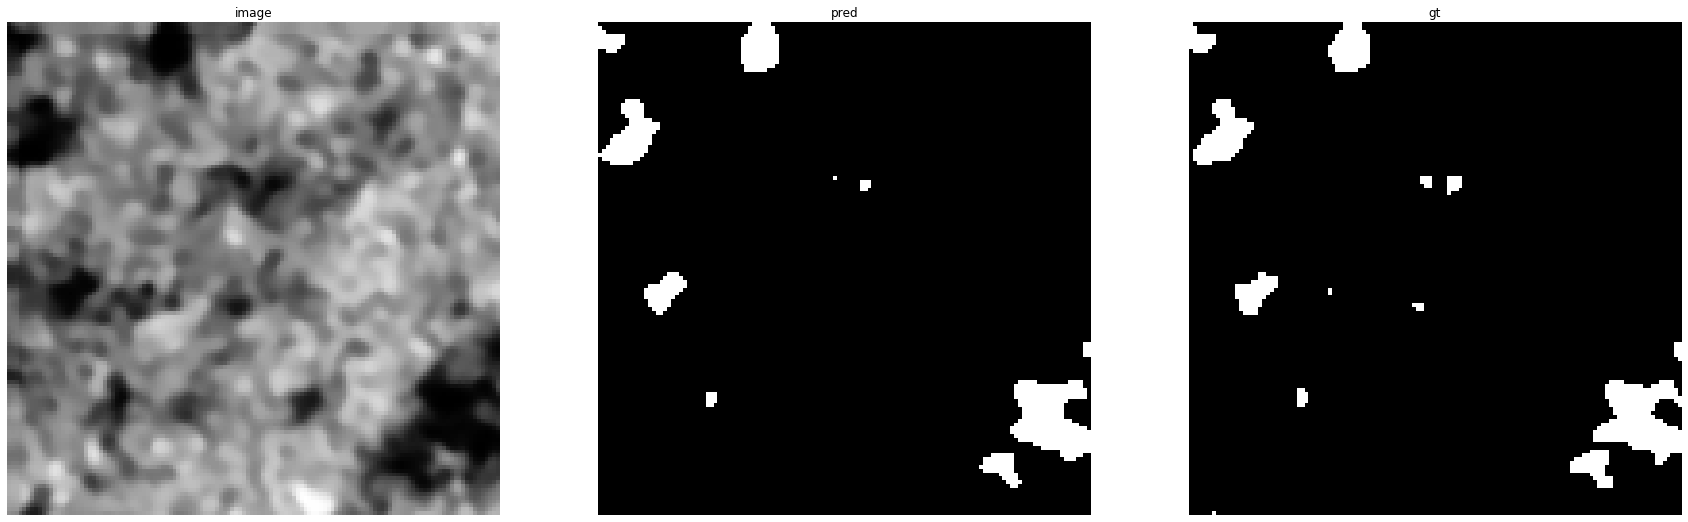

accuracy    : 0.9942626953125
precision   : 0.9728629579375848
recall      : 0.9064475347661188
f1          : 0.9384816753926701
pr_auc      : 0.9873690805838374
iou         : 0.8840937114673243


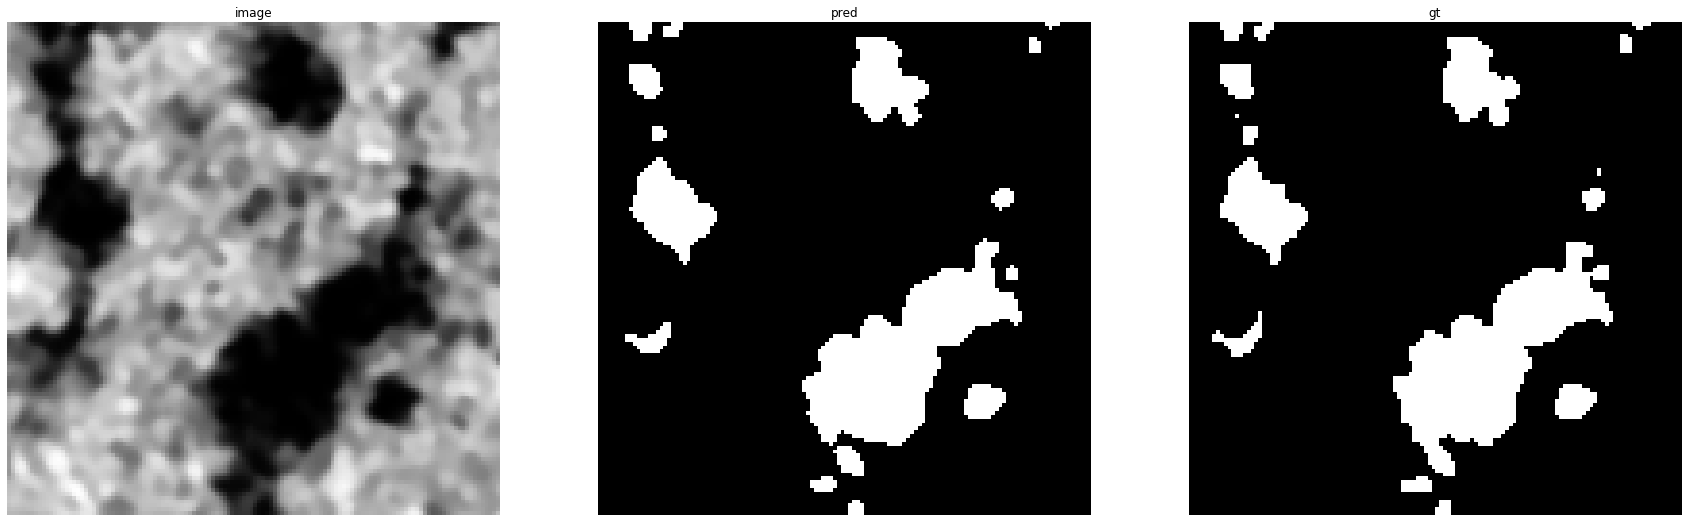

accuracy    : 0.99188232421875
precision   : 0.9806617963042544
recall      : 0.9628691983122363
f1          : 0.9716840536512668
pr_auc      : 0.9968861104407996
iou         : 0.9449275362318841


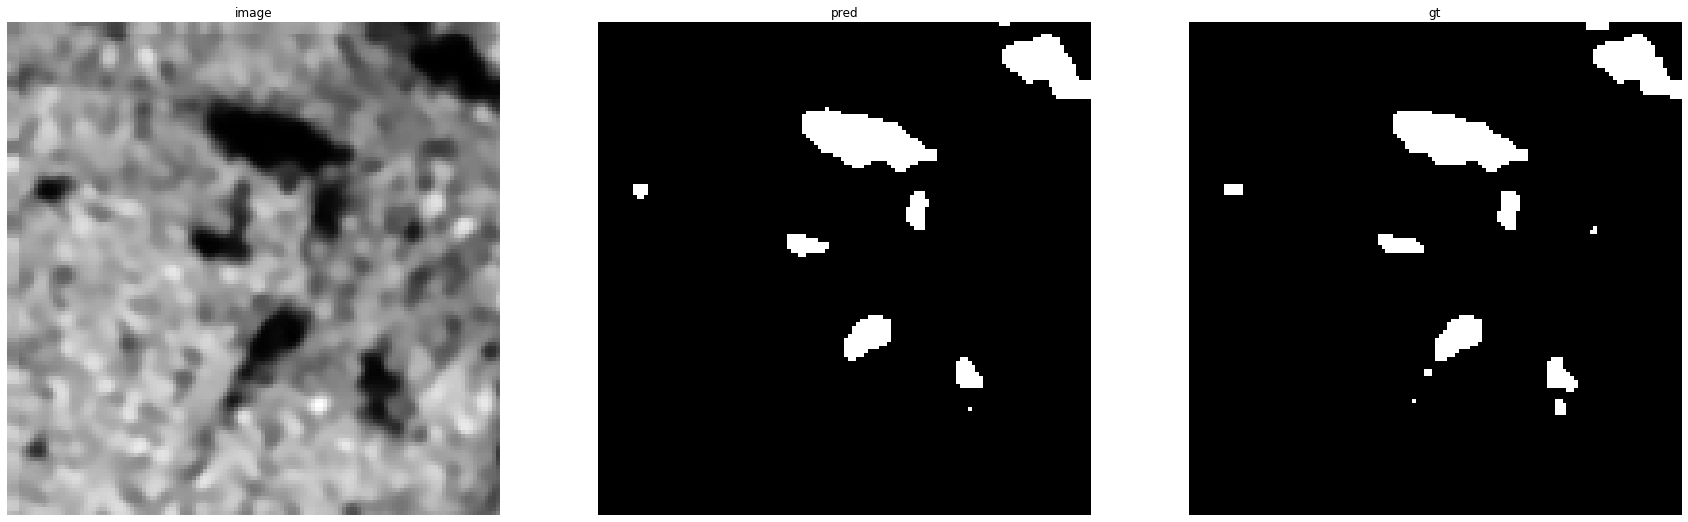

accuracy    : 0.9951171875
precision   : 0.9620098039215687
recall      : 0.9412470023980816
f1          : 0.9515151515151516
pr_auc      : 0.9897787091240842
iou         : 0.9075144508670521


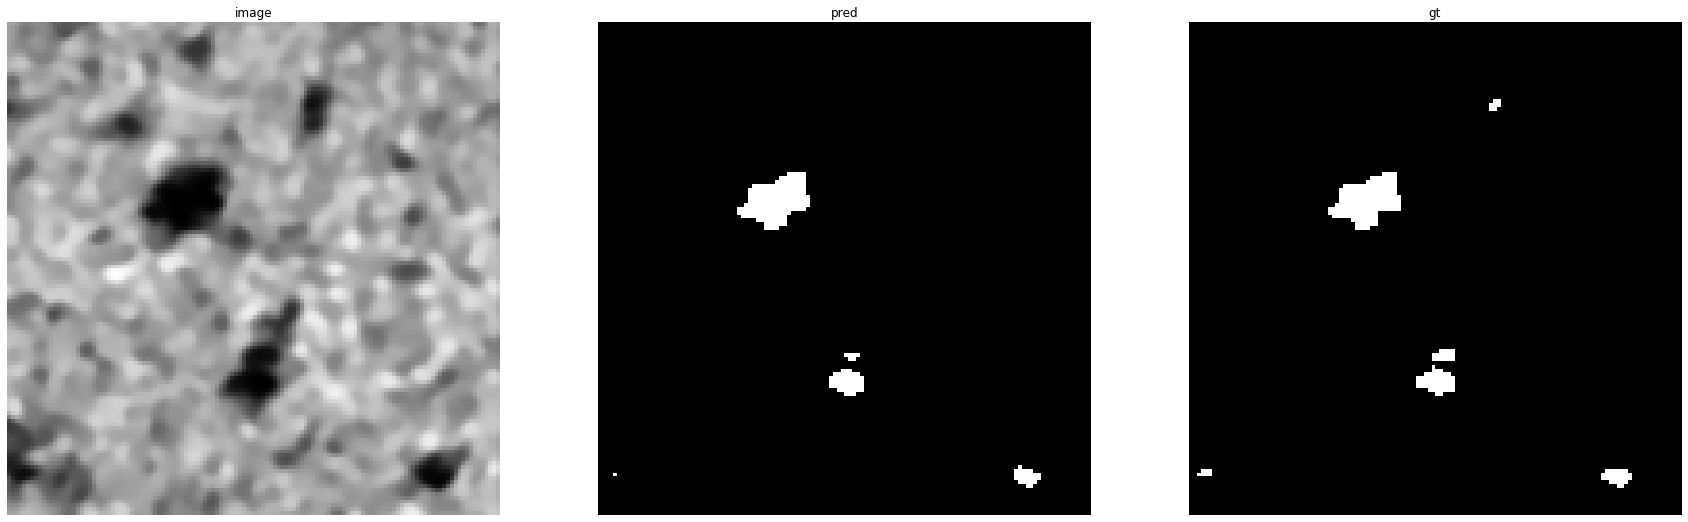

accuracy    : 0.997802734375
precision   : 0.98046875
recall      : 0.8900709219858156
f1          : 0.9330855018587361
pr_auc      : 0.9811555898035502
iou         : 0.8745644599303136


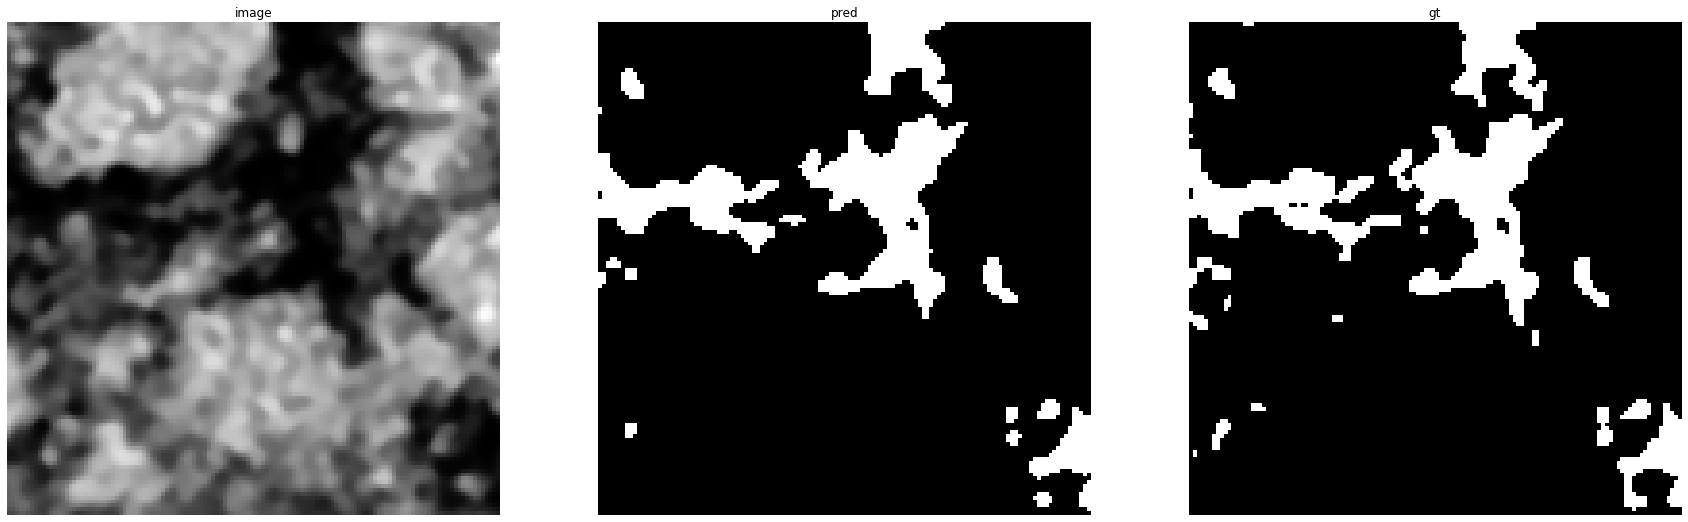

accuracy    : 0.98004150390625
precision   : 0.965034965034965
recall      : 0.8914728682170543
f1          : 0.9267965077233042
pr_auc      : 0.9858939237249831
iou         : 0.8635794743429287


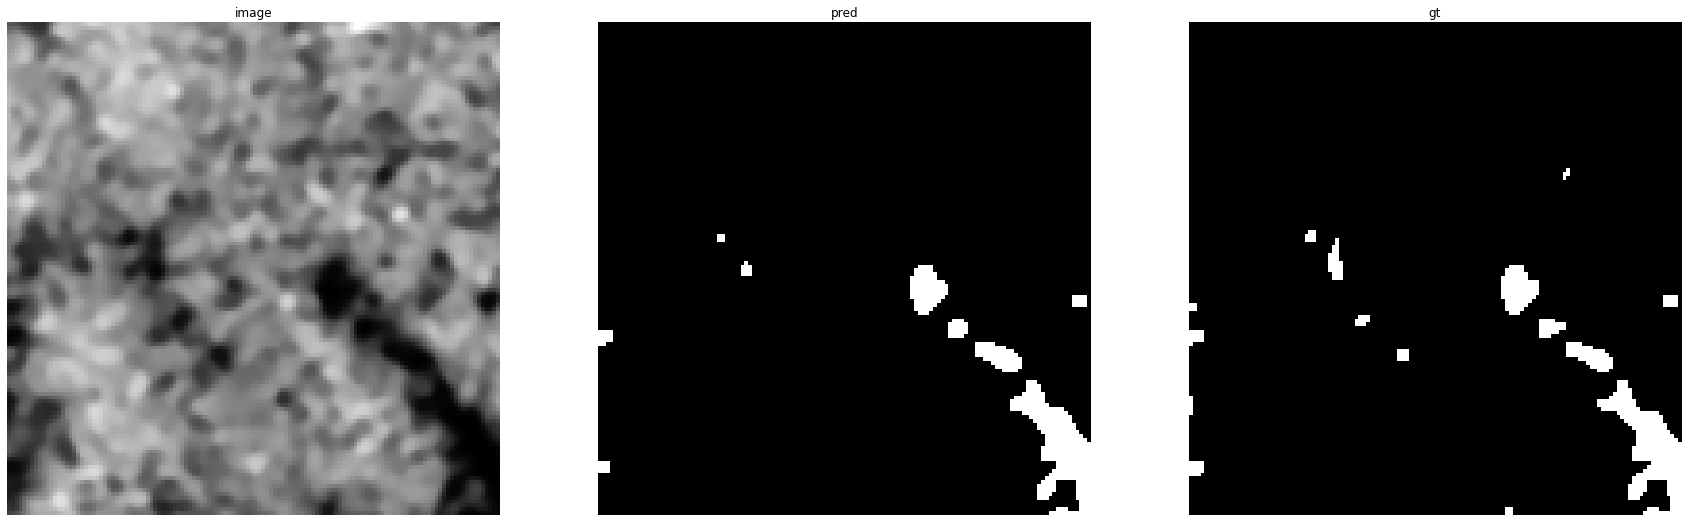

accuracy    : 0.99395751953125
precision   : 0.9578754578754579
recall      : 0.8731218697829716
f1          : 0.9135371179039301
pr_auc      : 0.9715687466127286
iou         : 0.8408360128617364


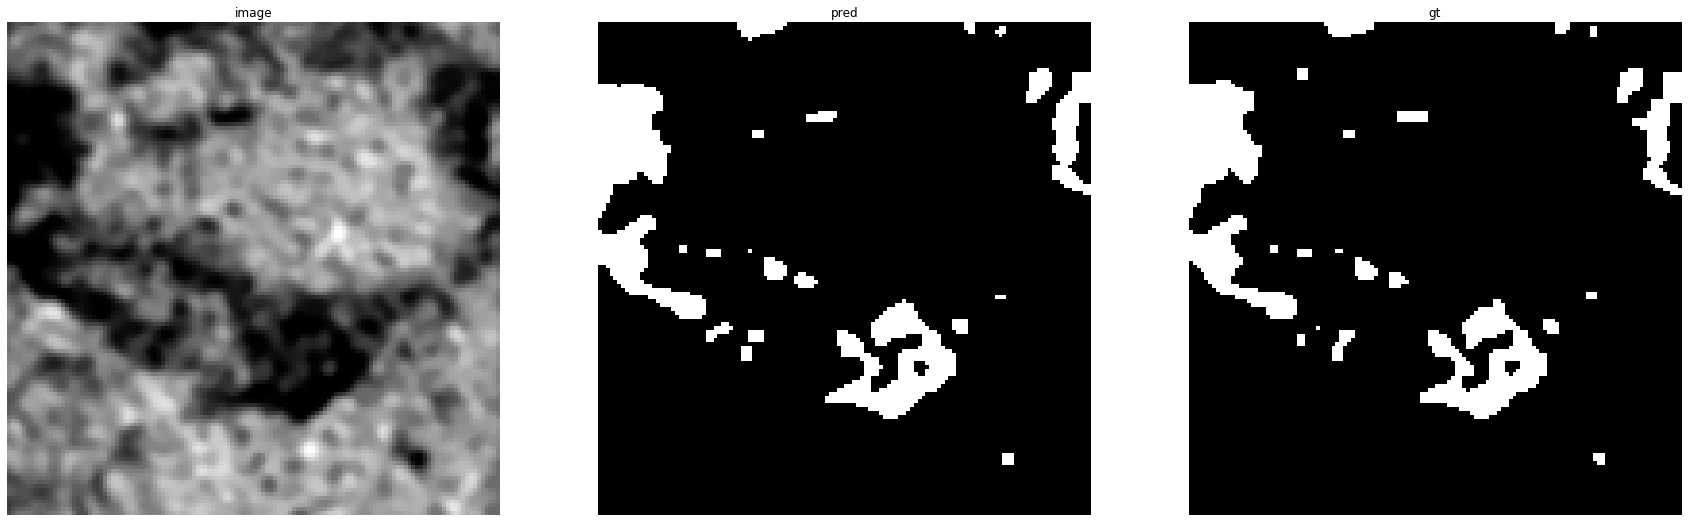

accuracy    : 0.99169921875
precision   : 0.9554179566563468
recall      : 0.9601742377100186
f1          : 0.9577901924270639
pr_auc      : 0.9943975396172706
iou         : 0.9189994044073854


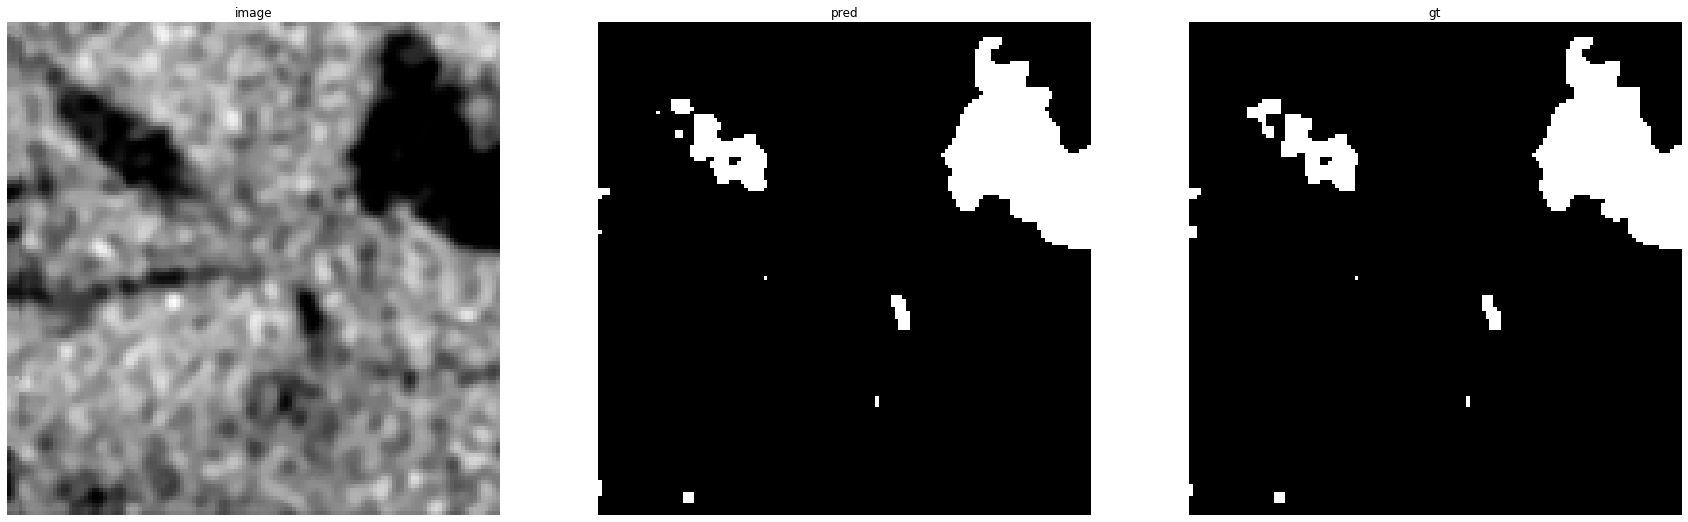

accuracy    : 0.99615478515625
precision   : 0.9813333333333333
recall      : 0.9767750497677505
f1          : 0.9790488859328234
pr_auc      : 0.9985928419326413
iou         : 0.958957654723127


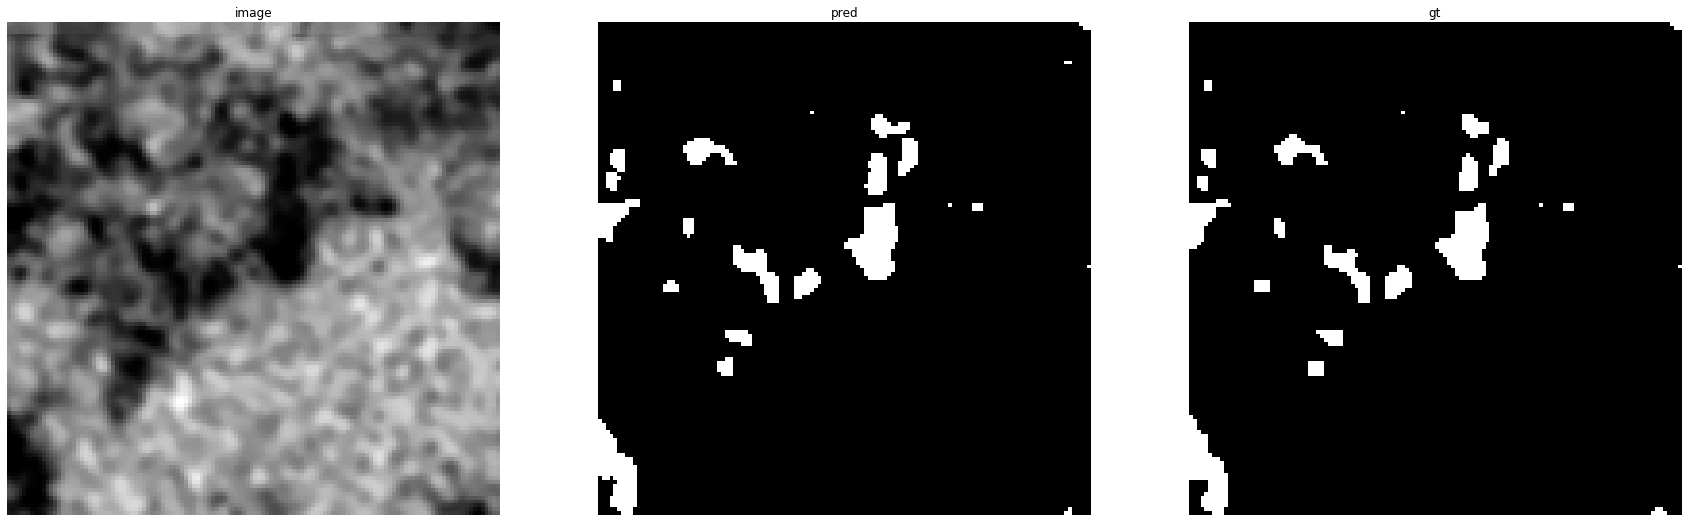

accuracy    : 0.99359130859375
precision   : 0.9193548387096774
recall      : 0.9487836107554417
f1          : 0.9338374291115312
pr_auc      : 0.9876190178111119
iou         : 0.875886524822695


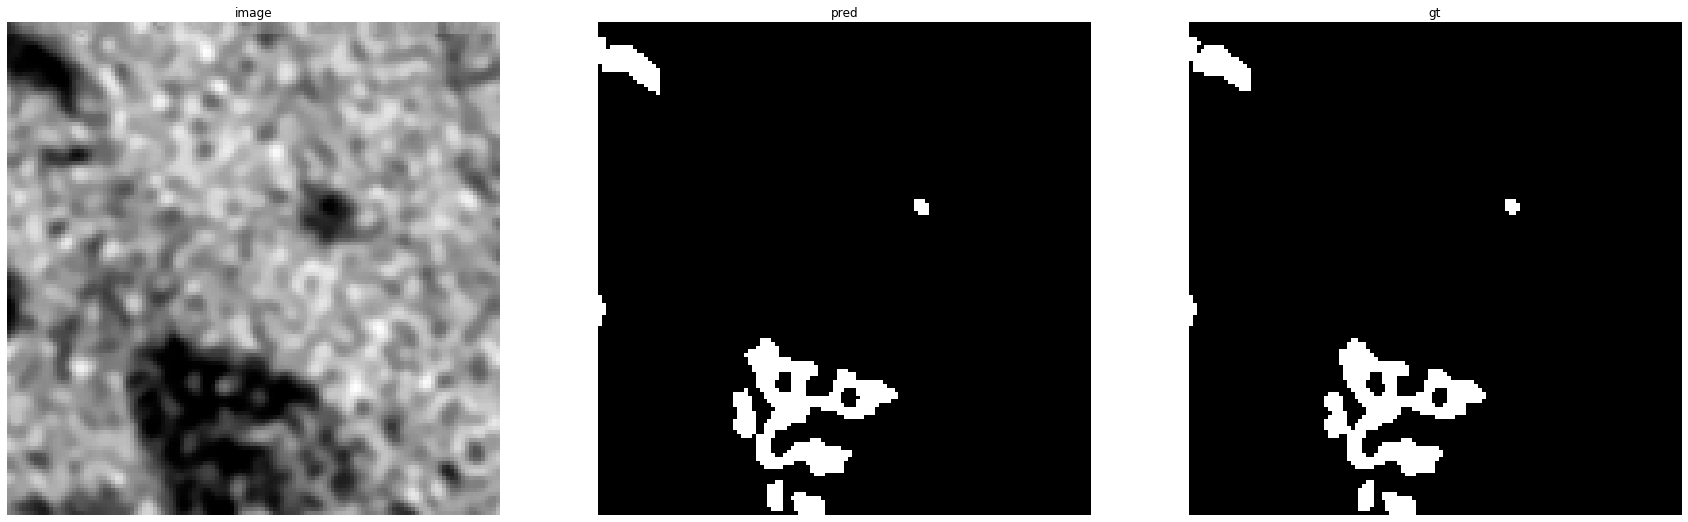

accuracy    : 0.99676513671875
precision   : 0.9669117647058824
recall      : 0.9680981595092024
f1          : 0.9675045984058859
pr_auc      : 0.9970793250312232
iou         : 0.9370546318289786


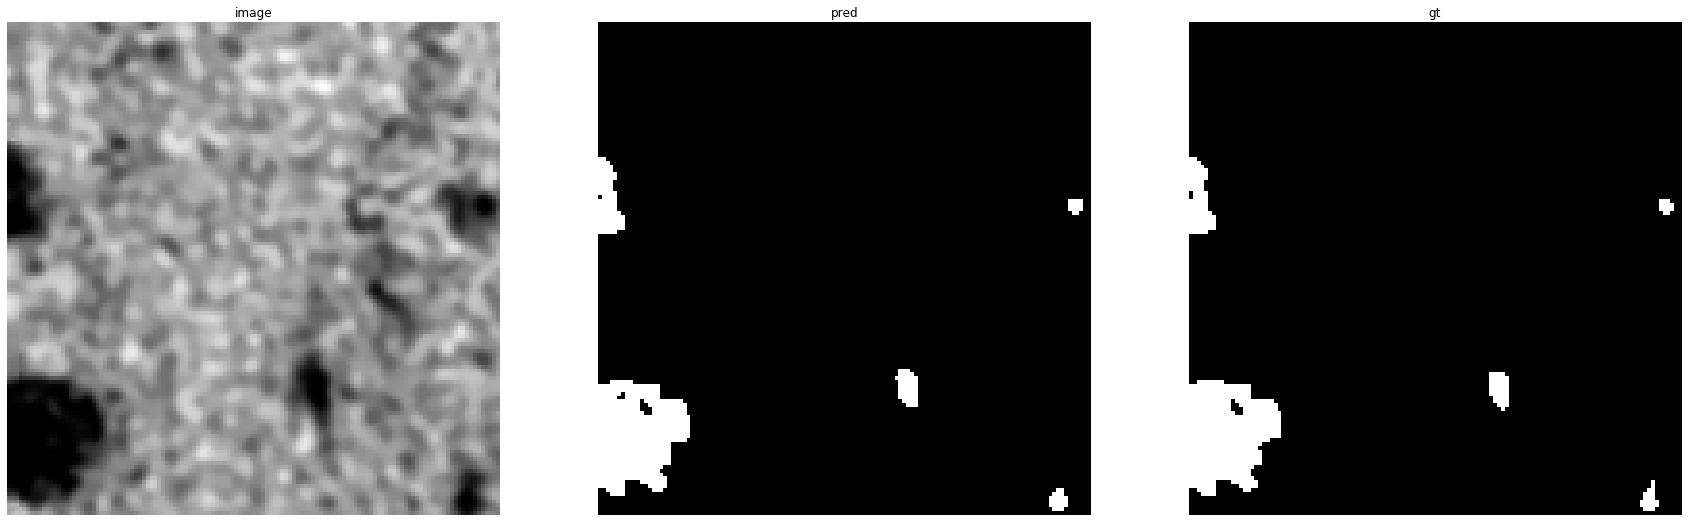

accuracy    : 0.99853515625
precision   : 0.9790794979079498
recall      : 0.9873417721518988
f1          : 0.9831932773109243
pr_auc      : 0.9989054402467327
iou         : 0.9669421487603306


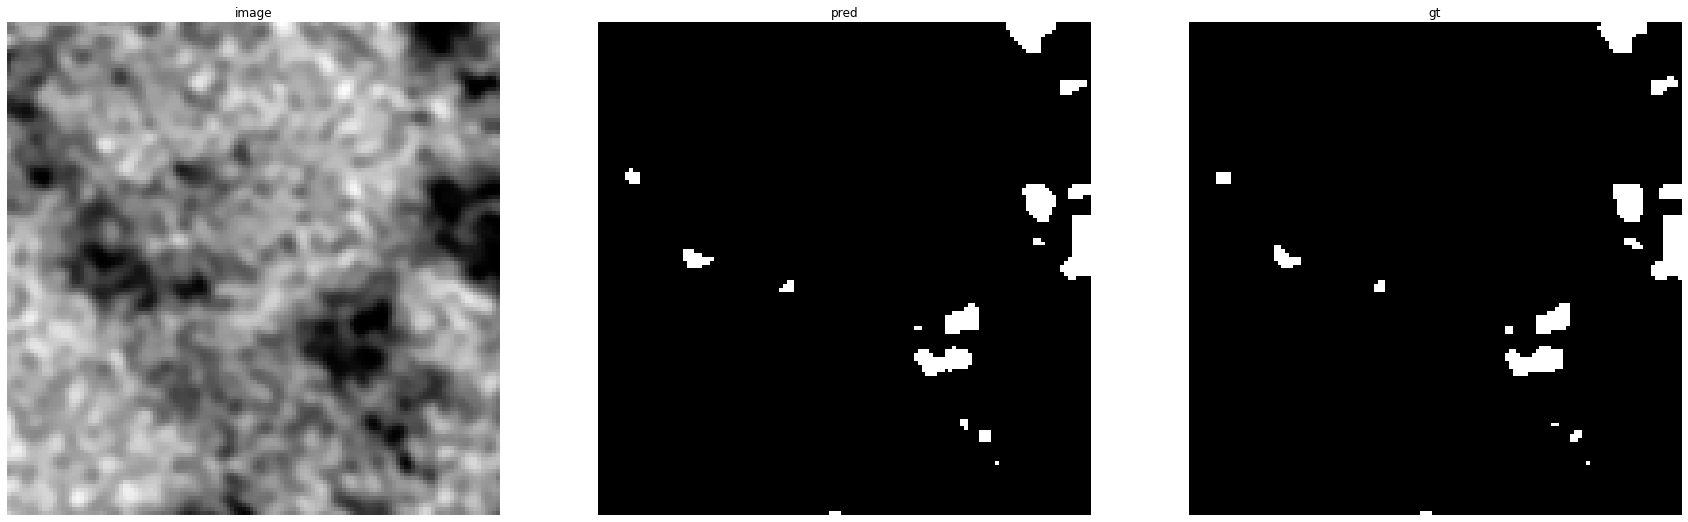

accuracy    : 0.99639892578125
precision   : 0.9570815450643777
recall      : 0.9195876288659793
f1          : 0.9379600420609885
pr_auc      : 0.9909296321411489
iou         : 0.8831683168316832


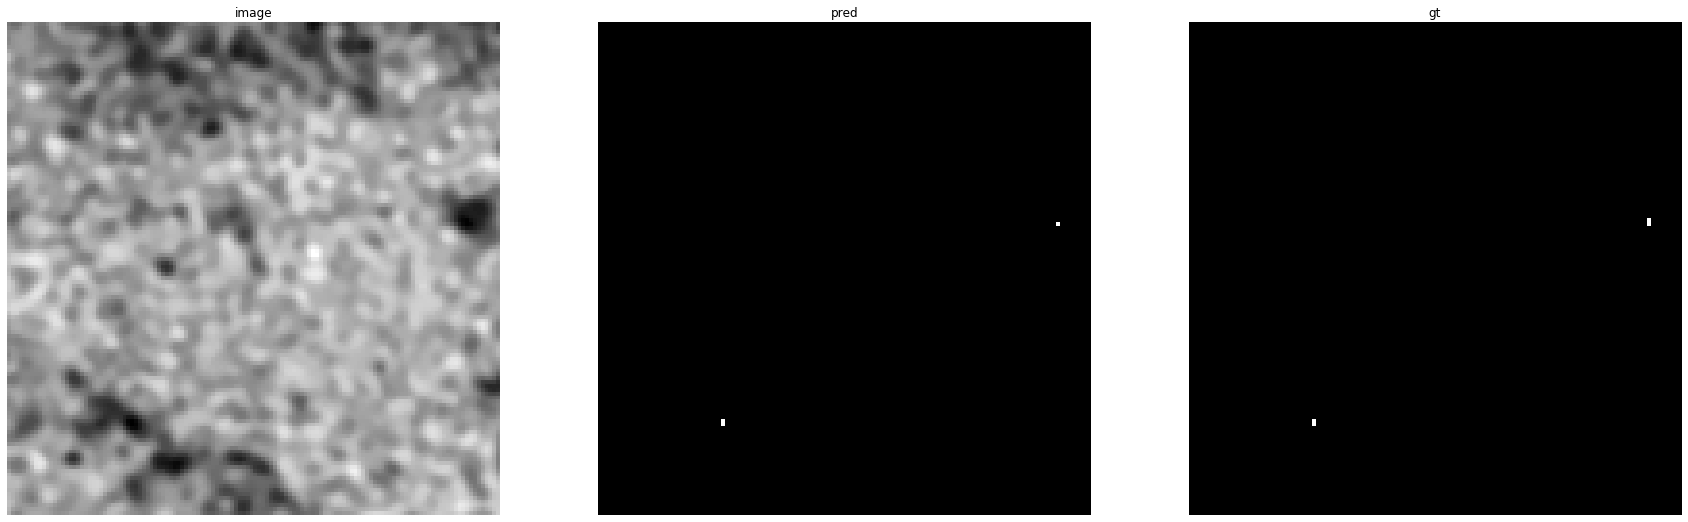

accuracy    : 0.99993896484375
precision   : 1.0
recall      : 0.75
f1          : 0.8571428571428571
pr_auc      : 1.0
iou         : 0.75


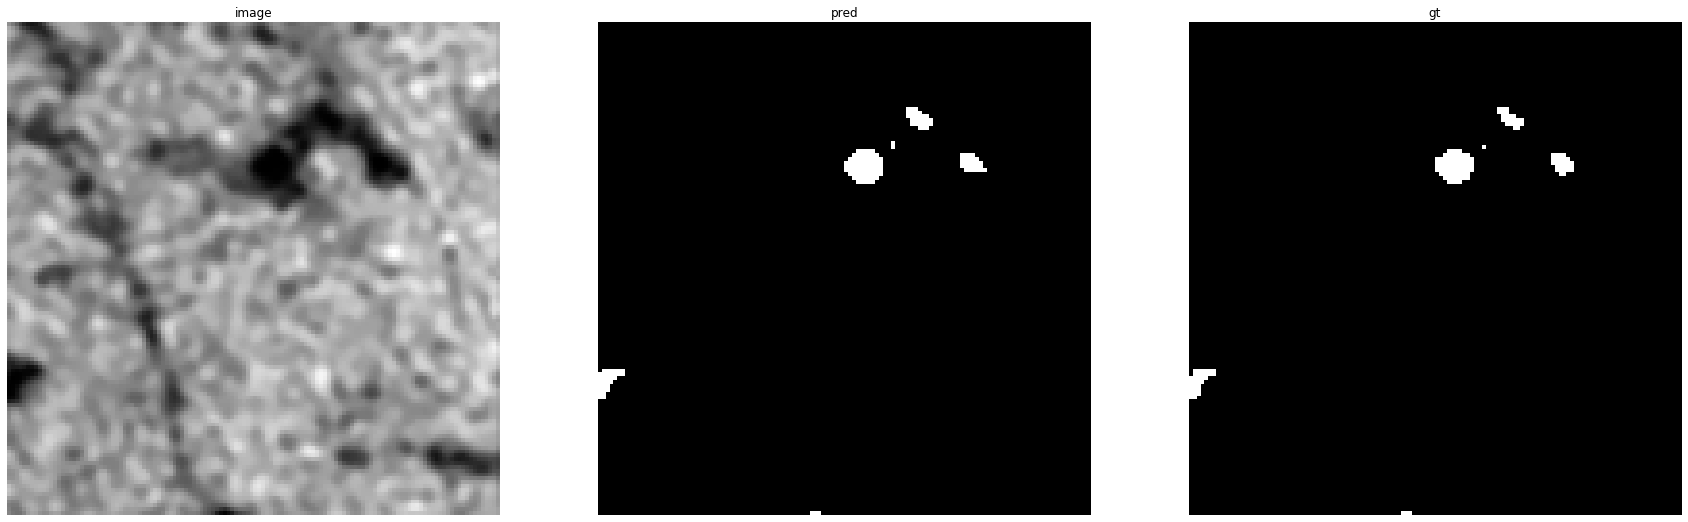

accuracy    : 0.9990234375
precision   : 0.926829268292683
recall      : 0.9743589743589743
f1          : 0.9500000000000001
pr_auc      : 0.9924604065122964
iou         : 0.9047619047619048


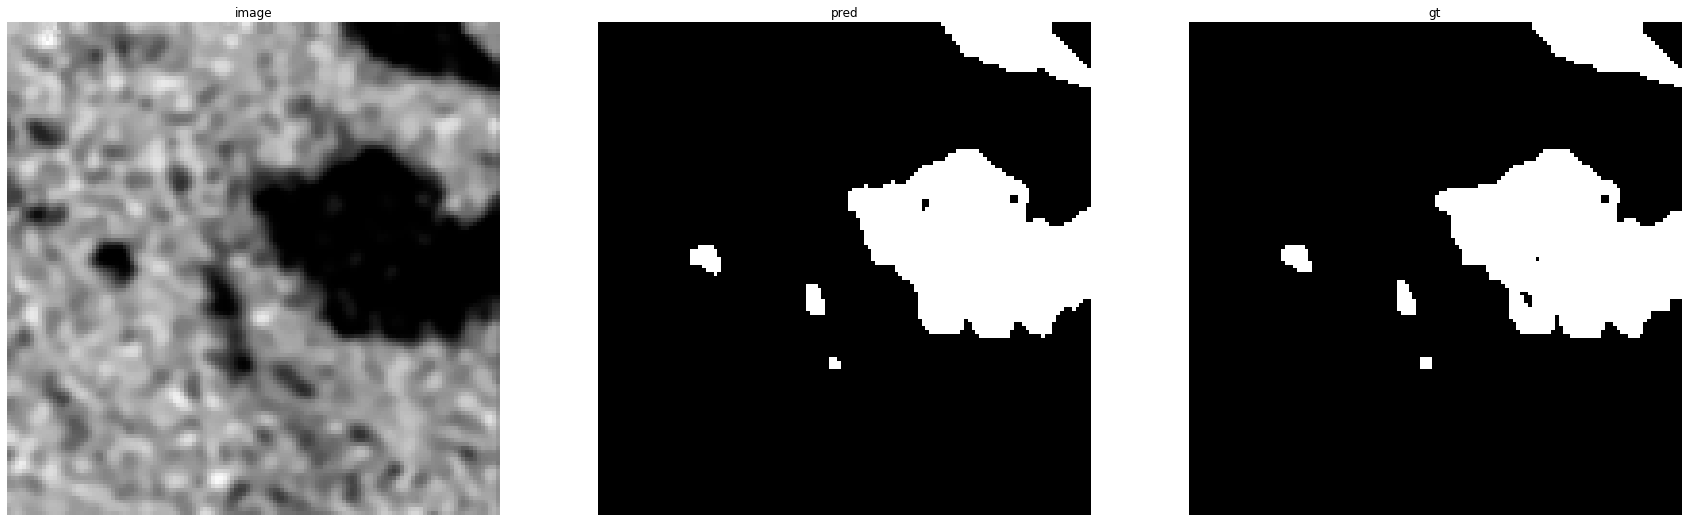

accuracy    : 0.99658203125
precision   : 0.9898826386078511
recall      : 0.9874848607186112
f1          : 0.988682295877122
pr_auc      : 0.9996693136830678
iou         : 0.9776179056754596


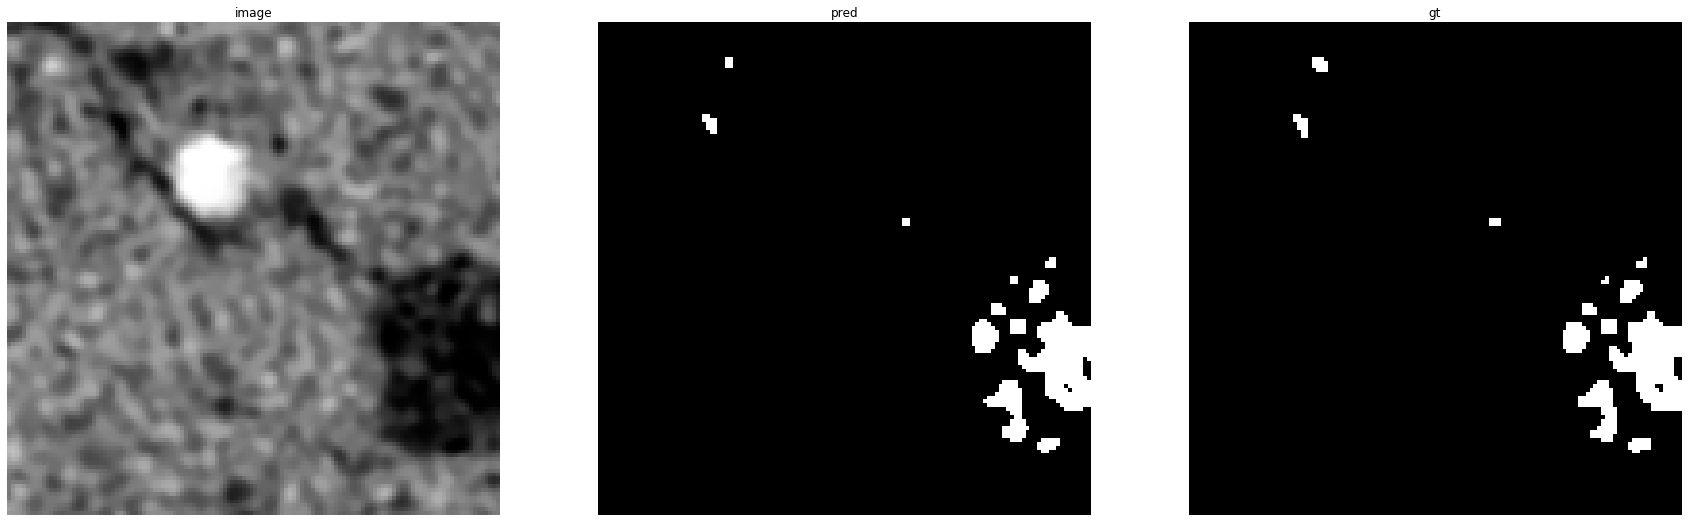

accuracy    : 0.99688720703125
precision   : 0.9682835820895522
recall      : 0.9385171790235082
f1          : 0.9531680440771351
pr_auc      : 0.9937769822997774
iou         : 0.9105263157894737


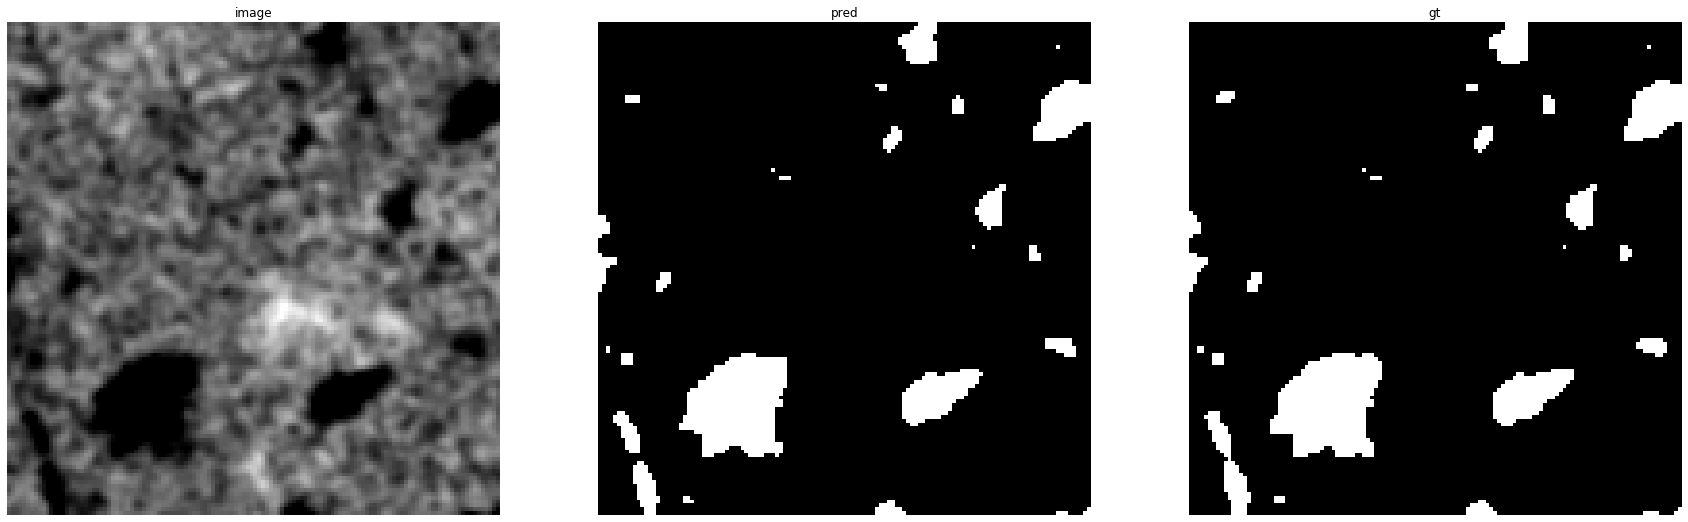

accuracy    : 0.9949951171875
precision   : 0.9955223880597015
recall      : 0.9460992907801419
f1          : 0.9701818181818181
pr_auc      : 0.9982347236099031
iou         : 0.942090395480226


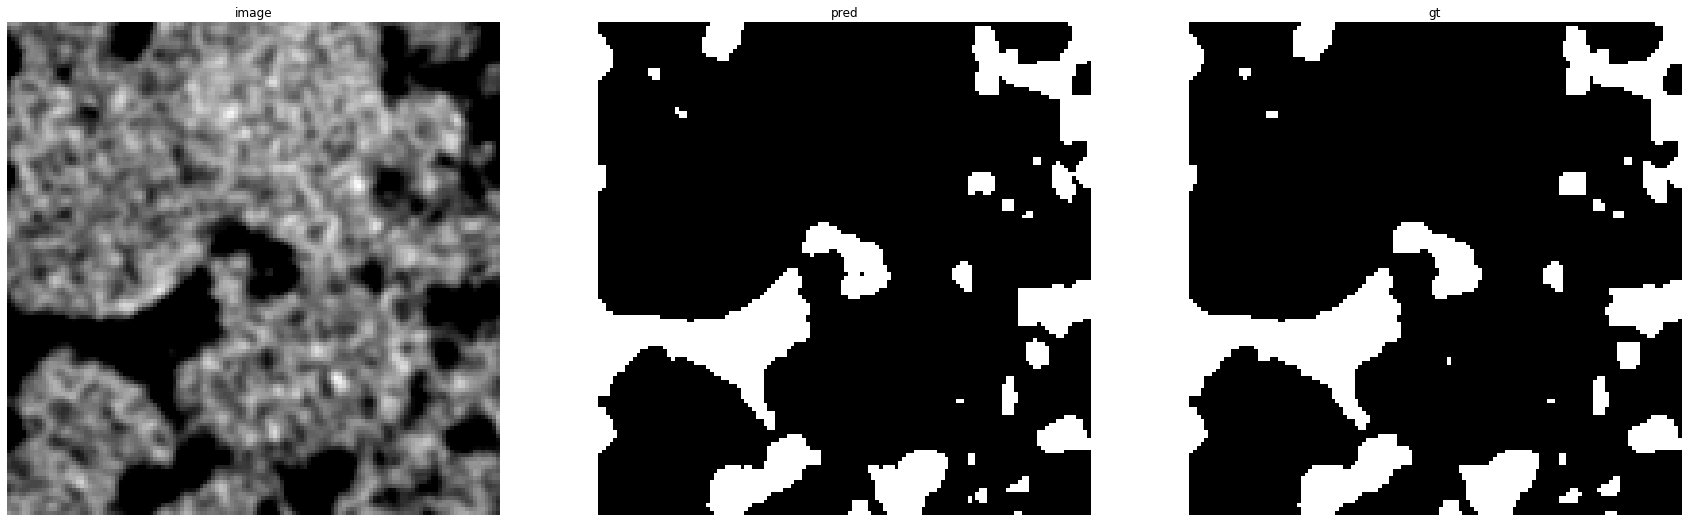

accuracy    : 0.9925537109375
precision   : 0.9933659217877095
recall      : 0.9650610583446404
f1          : 0.979008947006194
pr_auc      : 0.9988112177131614
iou         : 0.9588810246039771


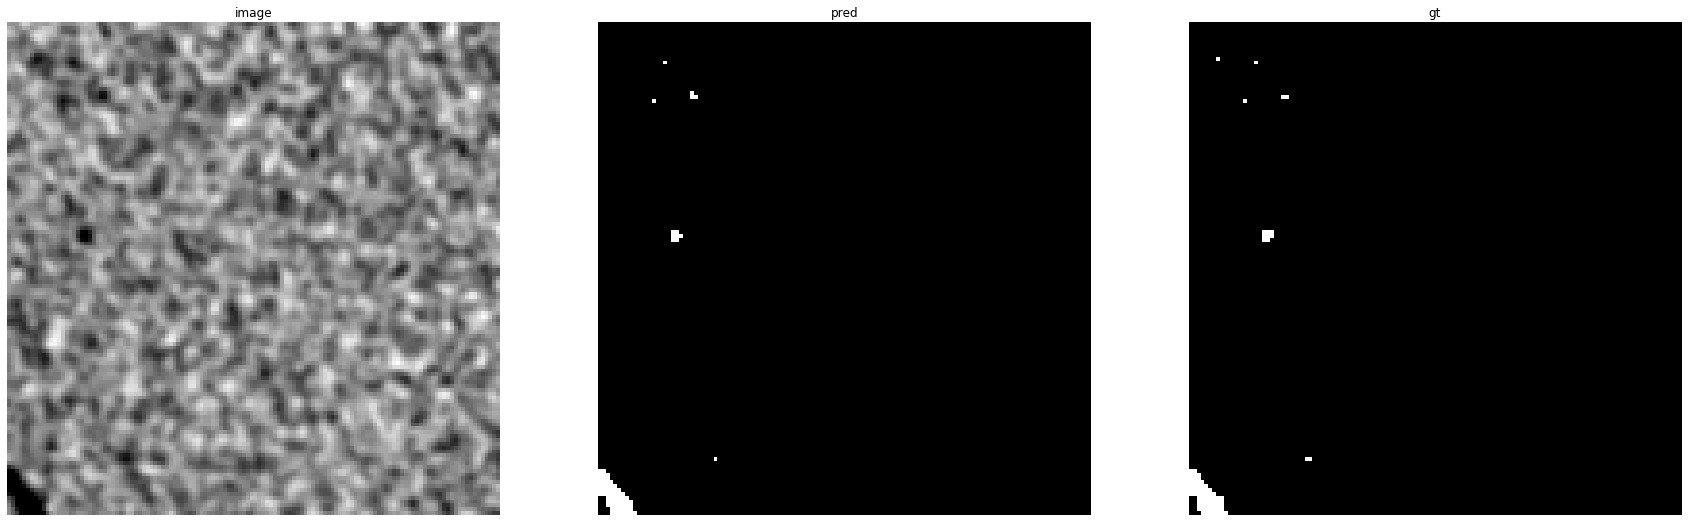

accuracy    : 0.9996337890625
precision   : 0.9868421052631579
recall      : 0.9375
f1          : 0.9615384615384615
pr_auc      : 0.9979909442182353
iou         : 0.9259259259259259


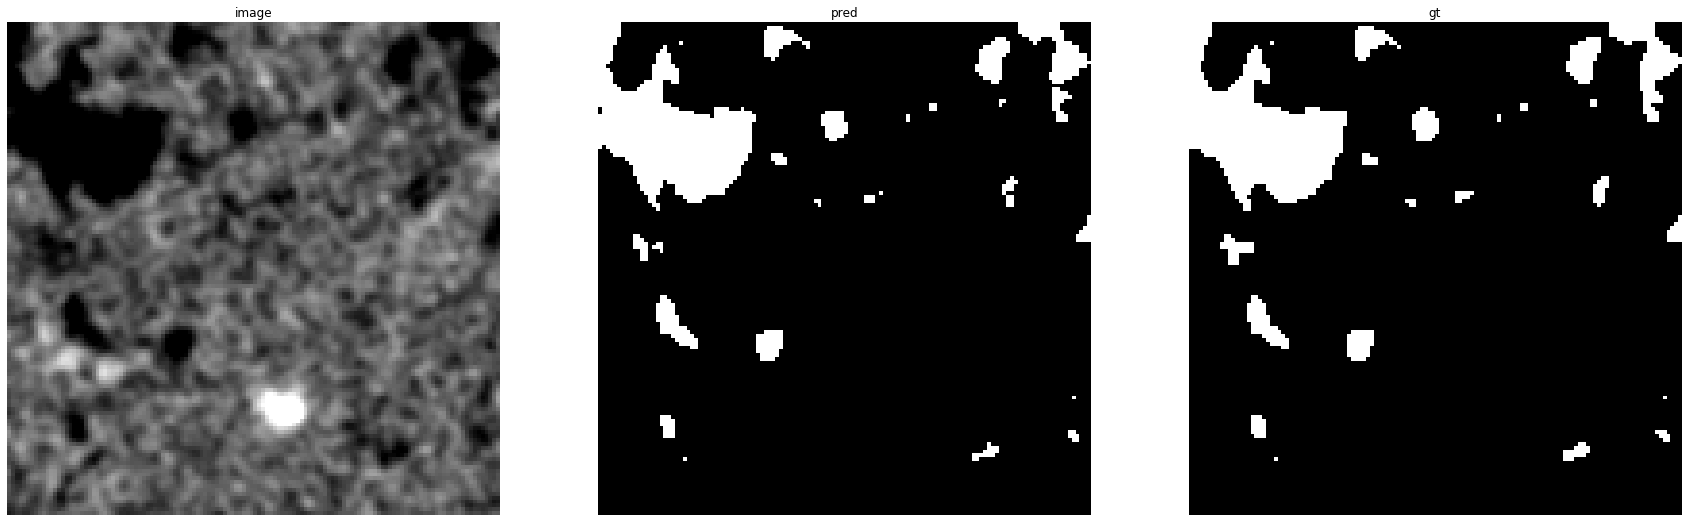

accuracy    : 0.99285888671875
precision   : 0.9948253557567918
recall      : 0.9338190649666059
f1          : 0.9633573441904165
pr_auc      : 0.9974643434119255
iou         : 0.9293051359516616


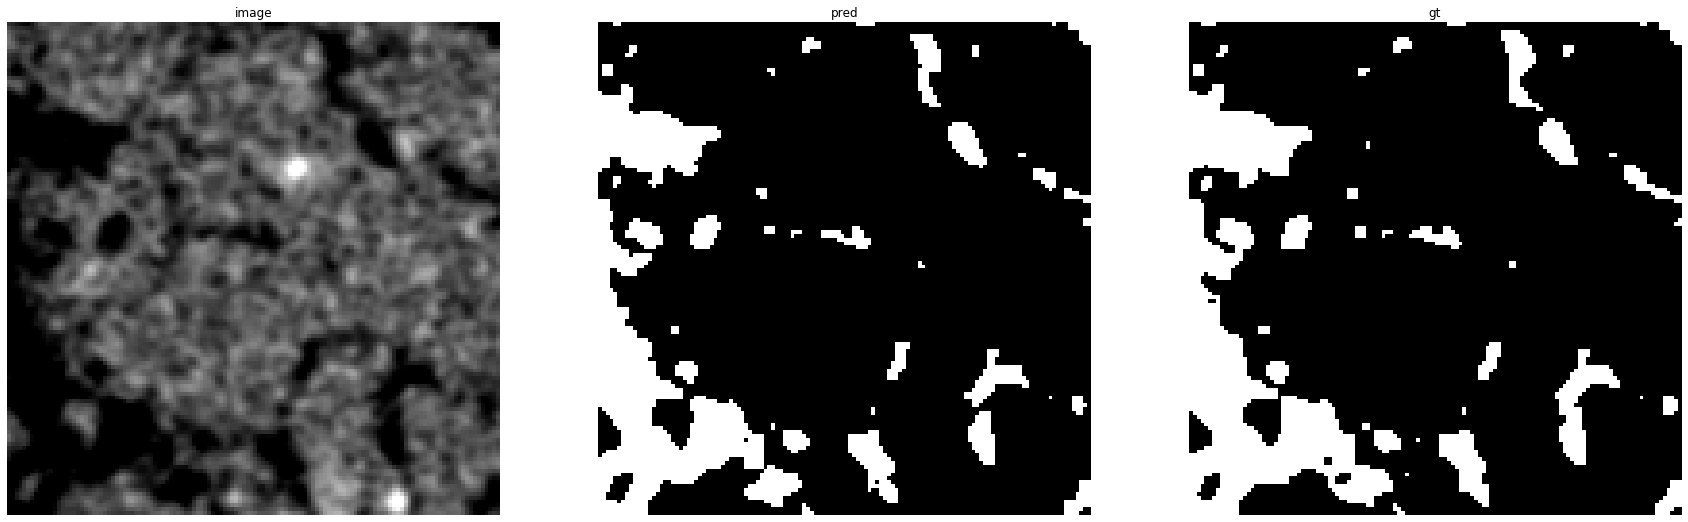

accuracy    : 0.9825439453125
precision   : 0.9962630792227205
recall      : 0.9061862678450034
f1          : 0.9490922036311855
pr_auc      : 0.996663788824112
iou         : 0.9031165311653117


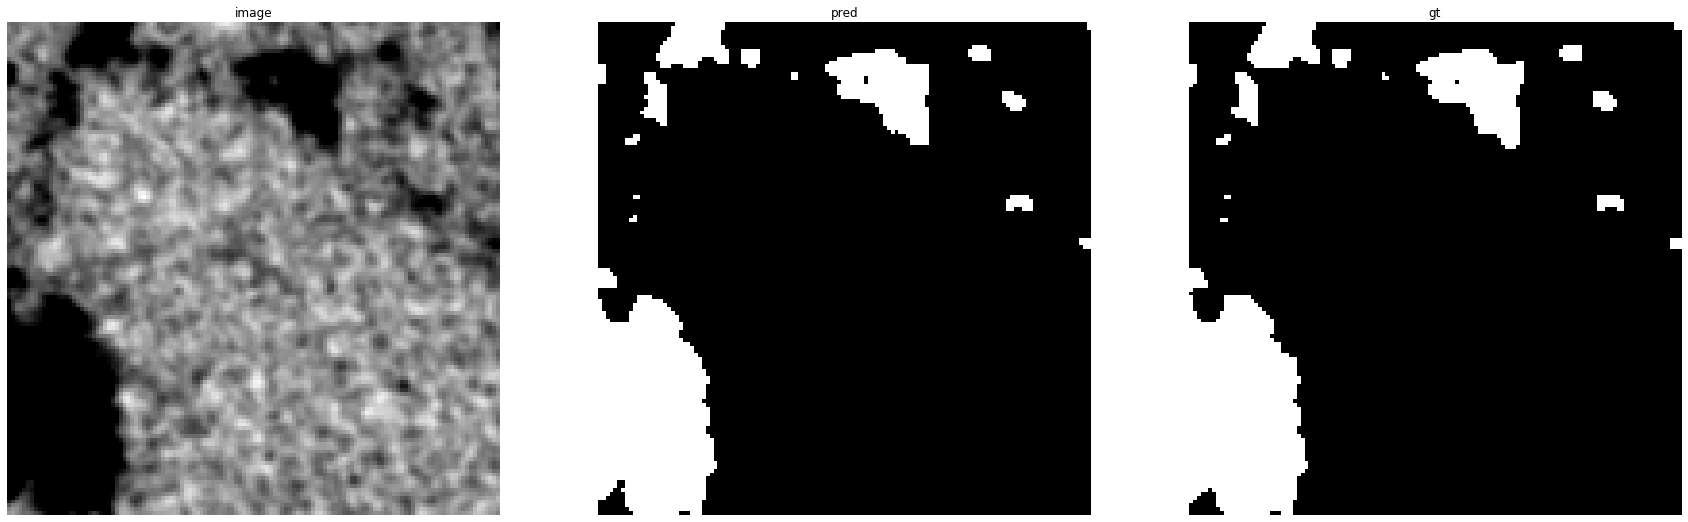

accuracy    : 0.99609375
precision   : 0.995897903372835
recall      : 0.9754464285714286
f1          : 0.9855660802886784
pr_auc      : 0.9995065042123328
iou         : 0.9715429079590929


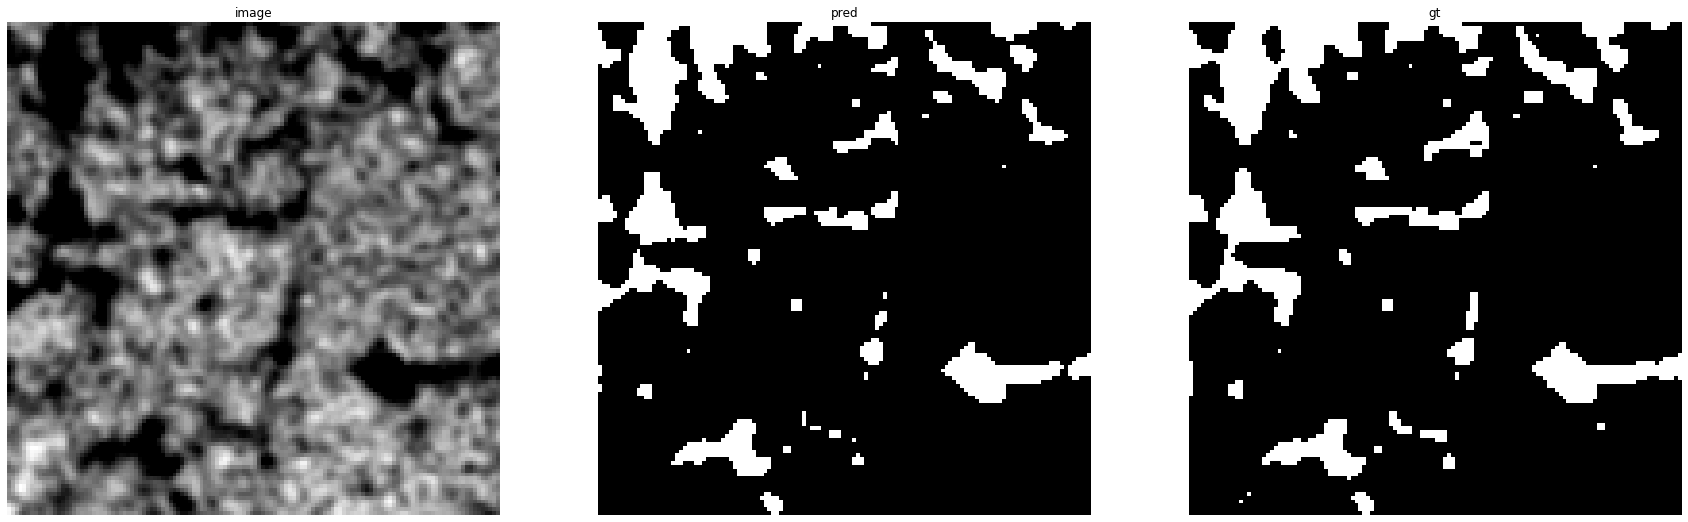

accuracy    : 0.980712890625
precision   : 0.9926873857404022
recall      : 0.8786407766990292
f1          : 0.9321888412017167
pr_auc      : 0.9941556236403286
iou         : 0.8729903536977492


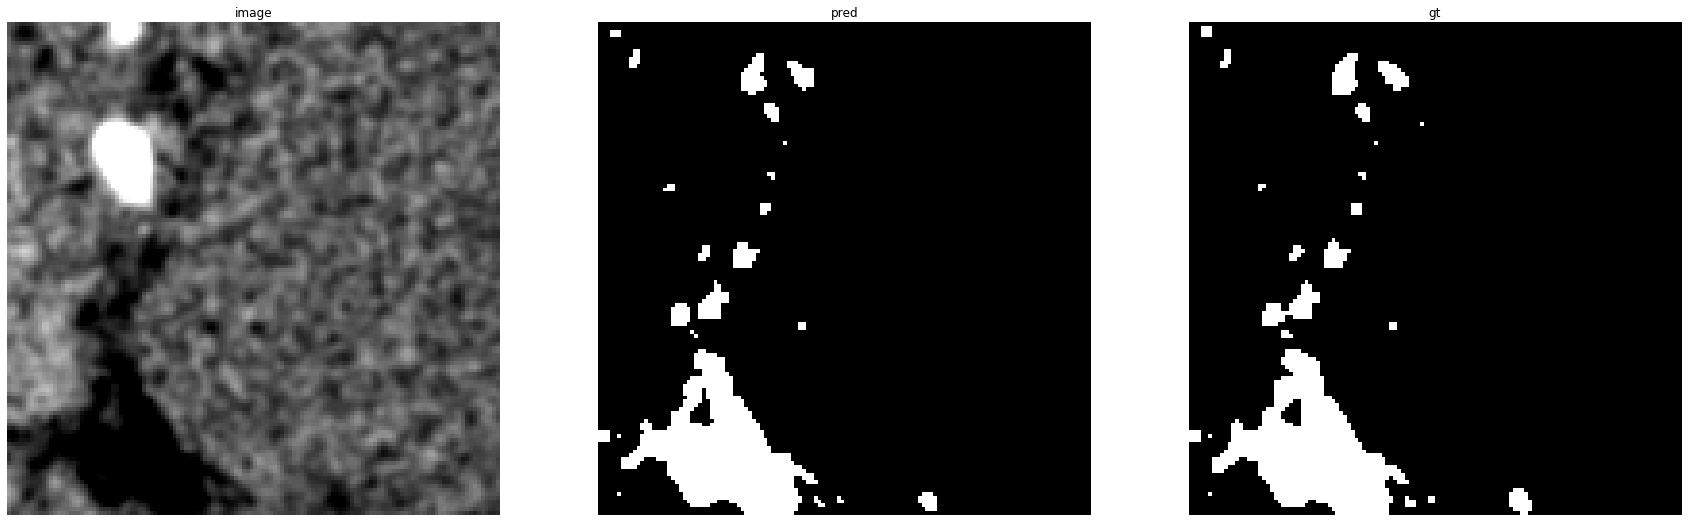

accuracy    : 0.99462890625
precision   : 0.9936406995230525
recall      : 0.9398496240601504
f1          : 0.9659969088098918
pr_auc      : 0.9976404206495405
iou         : 0.9342301943198804


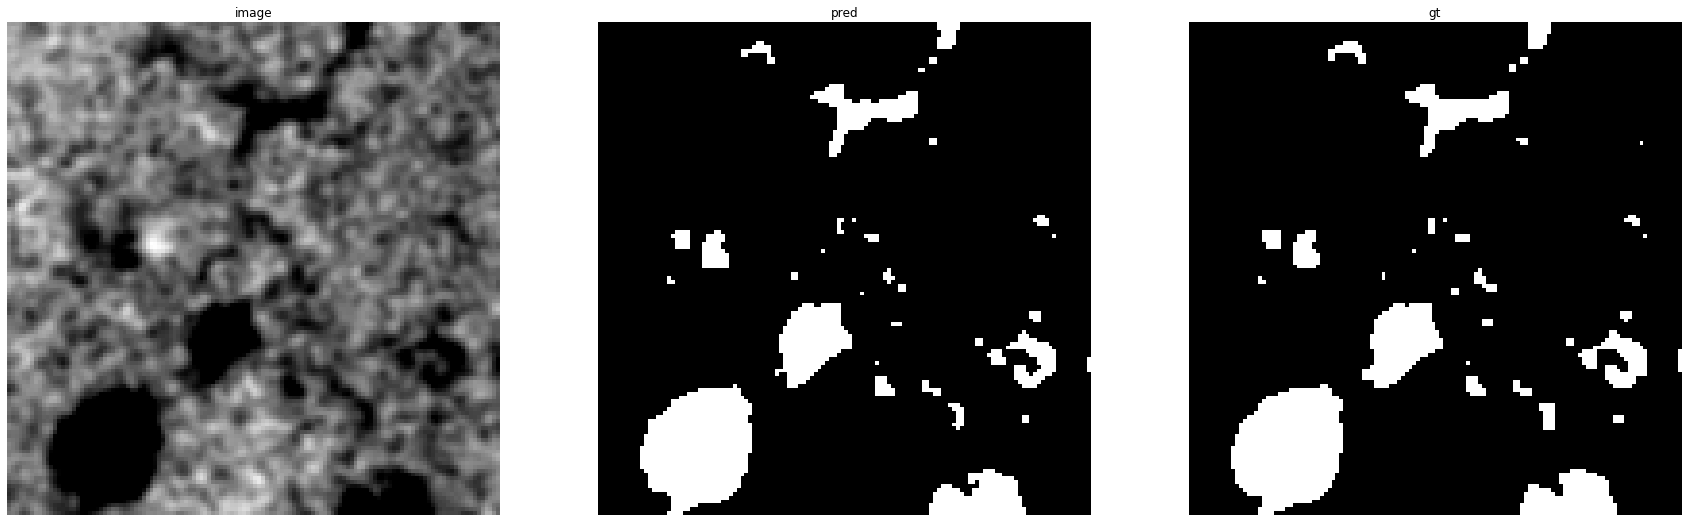

accuracy    : 0.992431640625
precision   : 0.9915158371040724
recall      : 0.9414607948442535
f1          : 0.965840220385675
pr_auc      : 0.9975222010721164
iou         : 0.9339371337240278


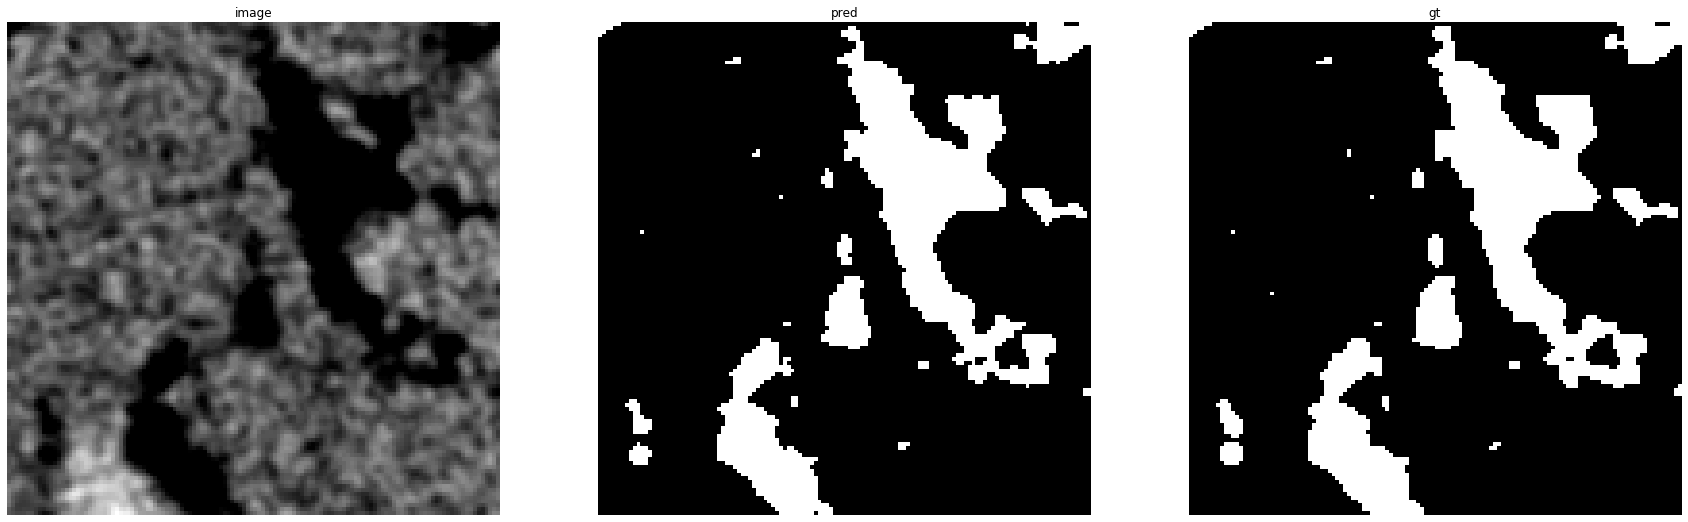

accuracy    : 0.99066162109375
precision   : 0.9972308757355486
recall      : 0.9520819563780568
f1          : 0.9741335587489433
pr_auc      : 0.9990705397084535
iou         : 0.9495715227422544


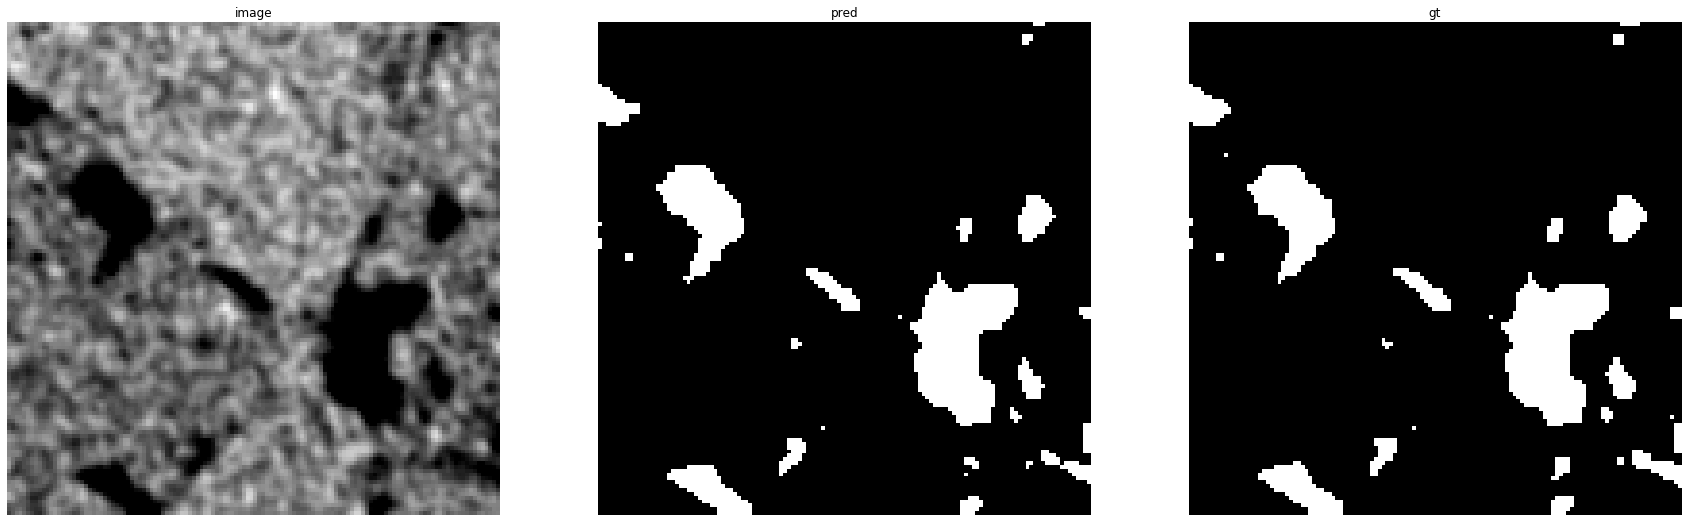

accuracy    : 0.993896484375
precision   : 0.9950310559006211
recall      : 0.9456906729634003
f1          : 0.9697336561743342
pr_auc      : 0.9983395884518969
iou         : 0.9412455934195064


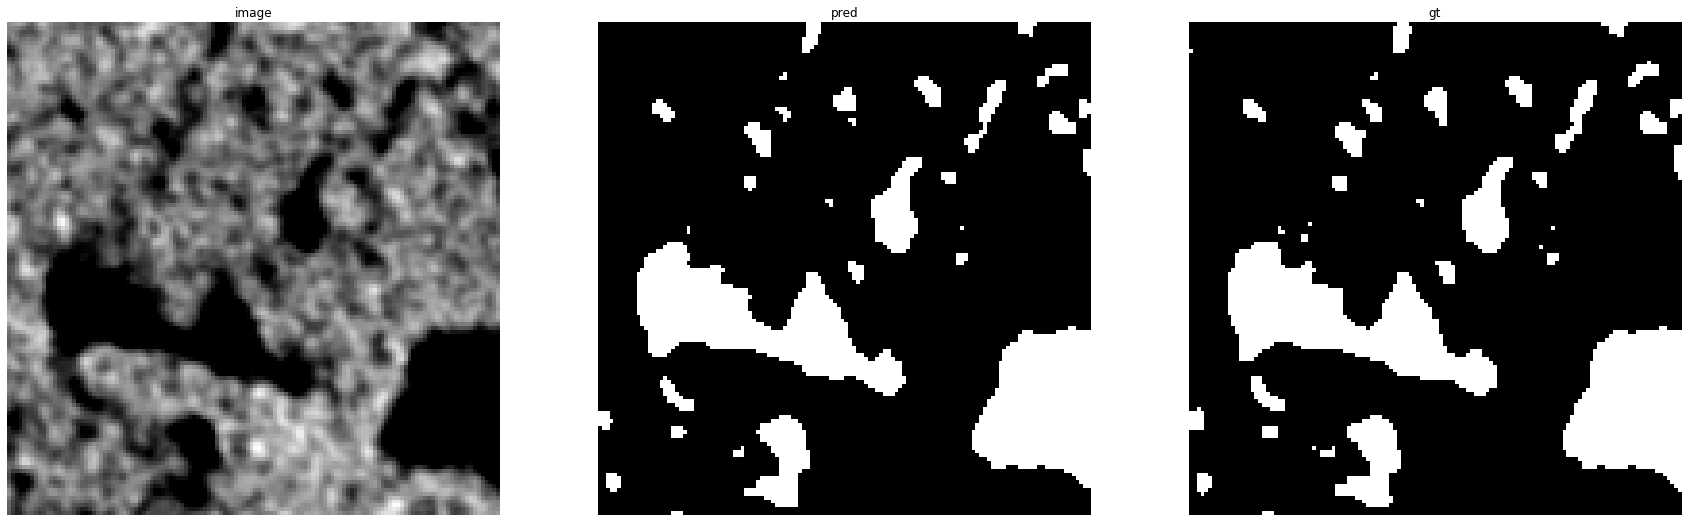

accuracy    : 0.98876953125
precision   : 0.9993281827342962
recall      : 0.9423503325942351
f1          : 0.9700032605151613
pr_auc      : 0.9988918471923467
iou         : 0.9417537195314973


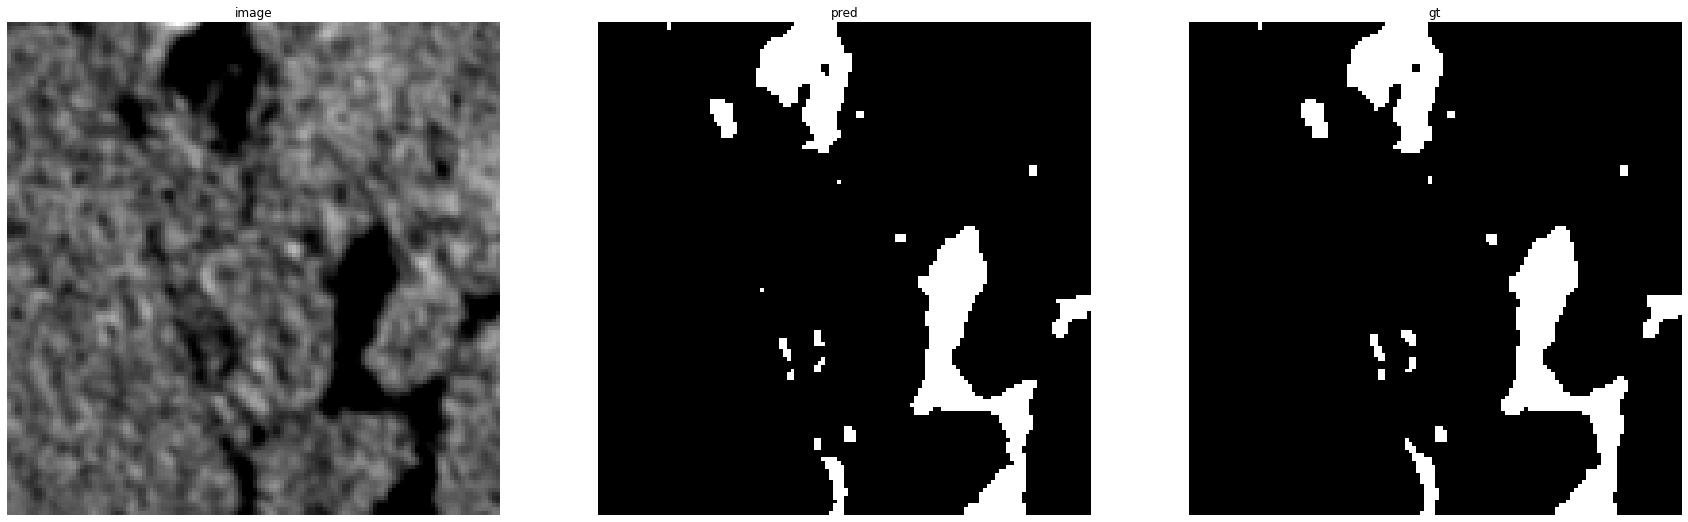

accuracy    : 0.994140625
precision   : 0.9962001266624446
recall      : 0.9458809380637402
f1          : 0.9703886489821097
pr_auc      : 0.9989147840916499
iou         : 0.9424805272618334


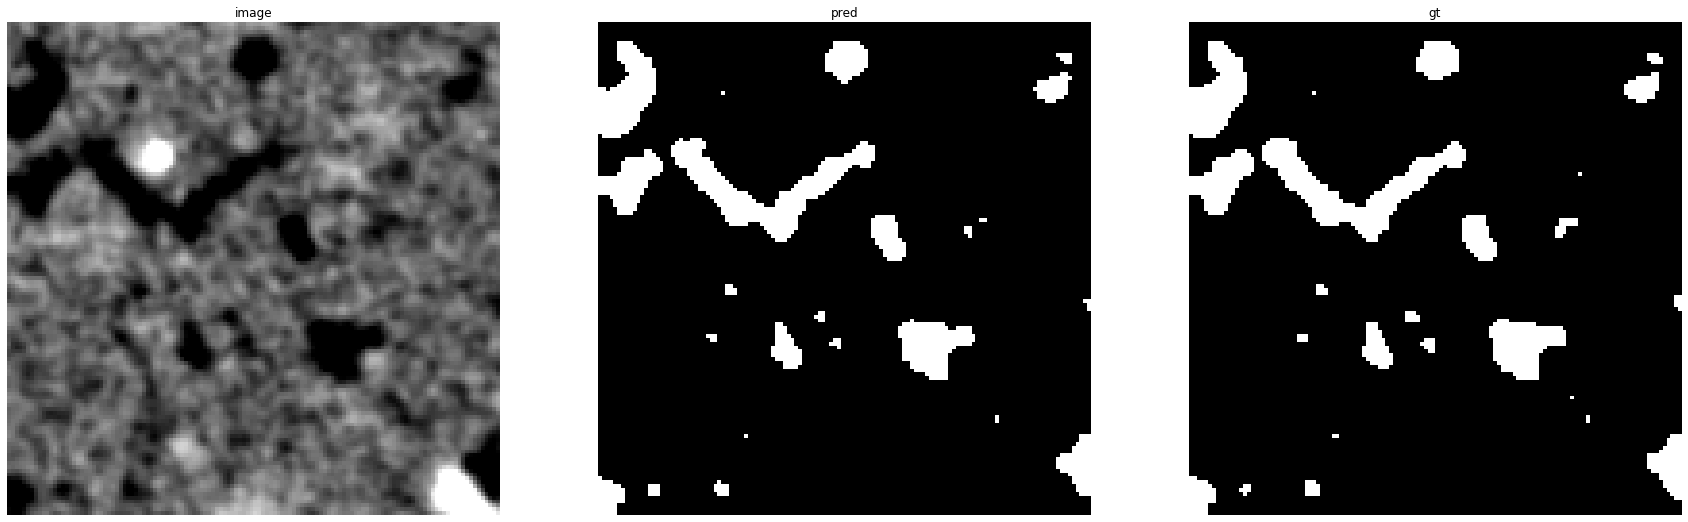

accuracy    : 0.9935302734375
precision   : 0.9848284960422163
recall      : 0.9473350253807107
f1          : 0.965717981888745
pr_auc      : 0.9970347775741317
iou         : 0.9337085678549093


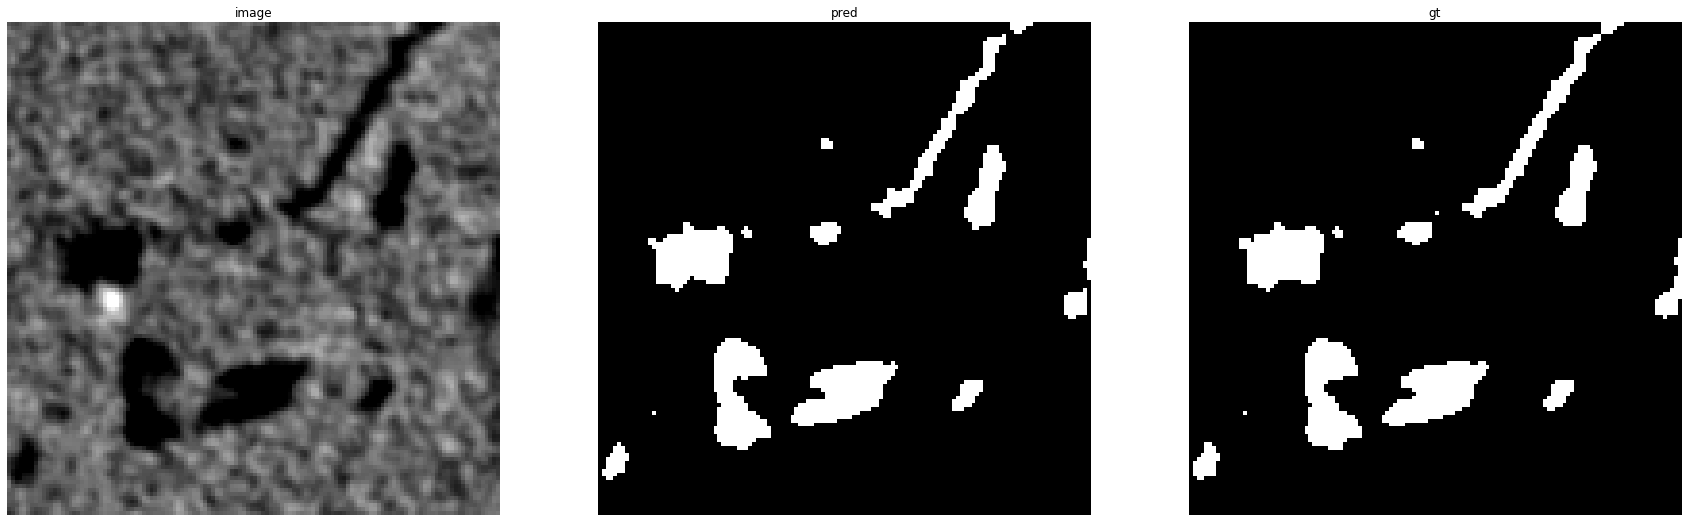

accuracy    : 0.9949951171875
precision   : 0.9882352941176471
recall      : 0.9531914893617022
f1          : 0.9703971119133574
pr_auc      : 0.9983320130838199
iou         : 0.9424964936886395


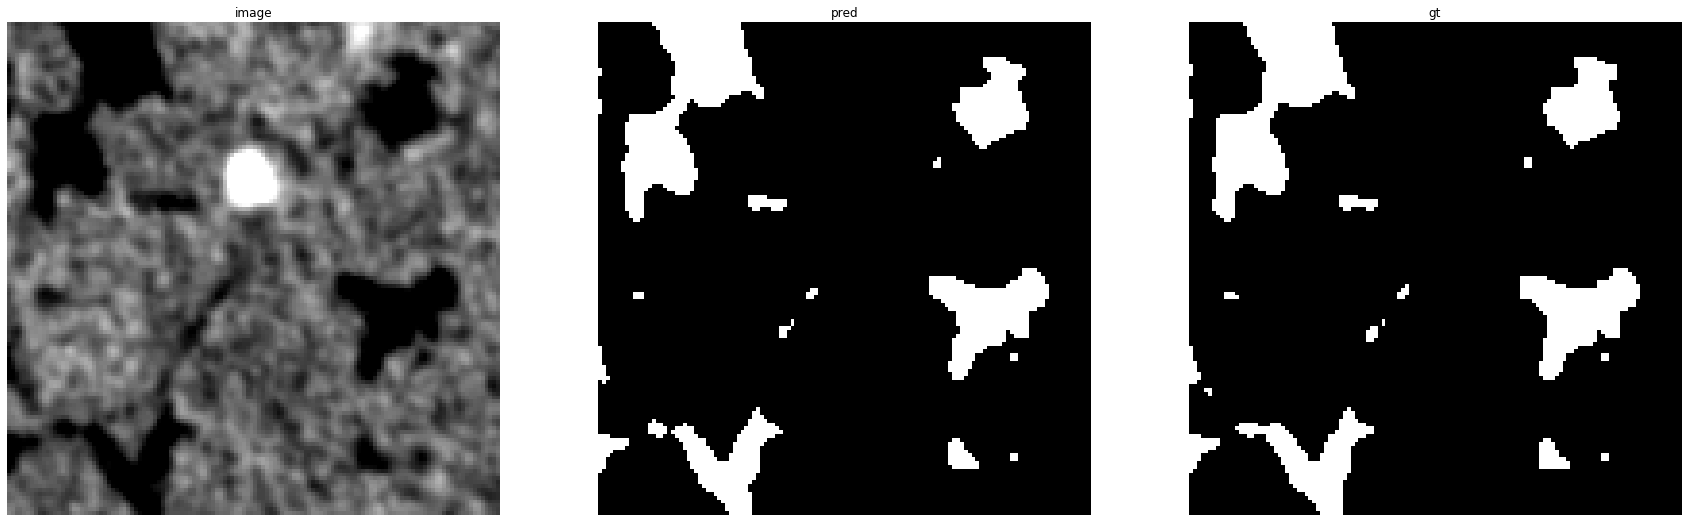

accuracy    : 0.9949951171875
precision   : 0.9951526902569074
recall      : 0.9661176470588235
f1          : 0.9804202483285579
pr_auc      : 0.9993862225964907
iou         : 0.9615925058548009


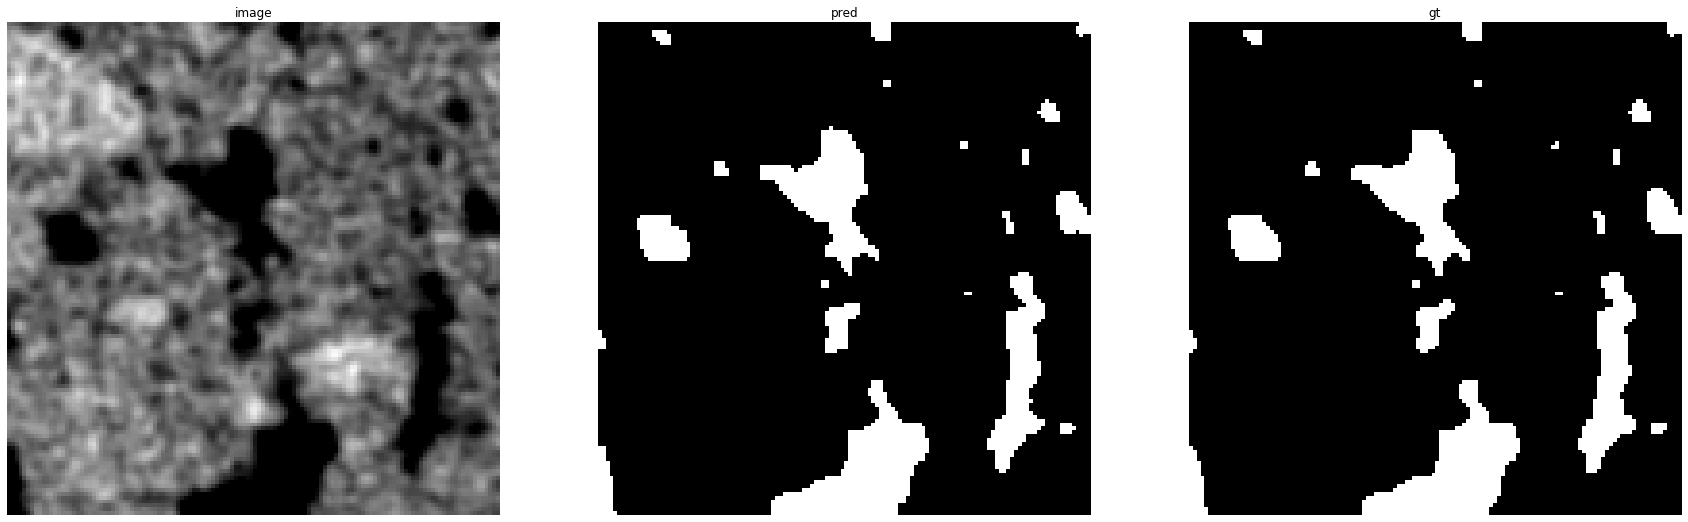

accuracy    : 0.99554443359375
precision   : 0.9933875890132248
recall      : 0.970193740685544
f1          : 0.9816536818296053
pr_auc      : 0.999196536571476
iou         : 0.9639684106614018


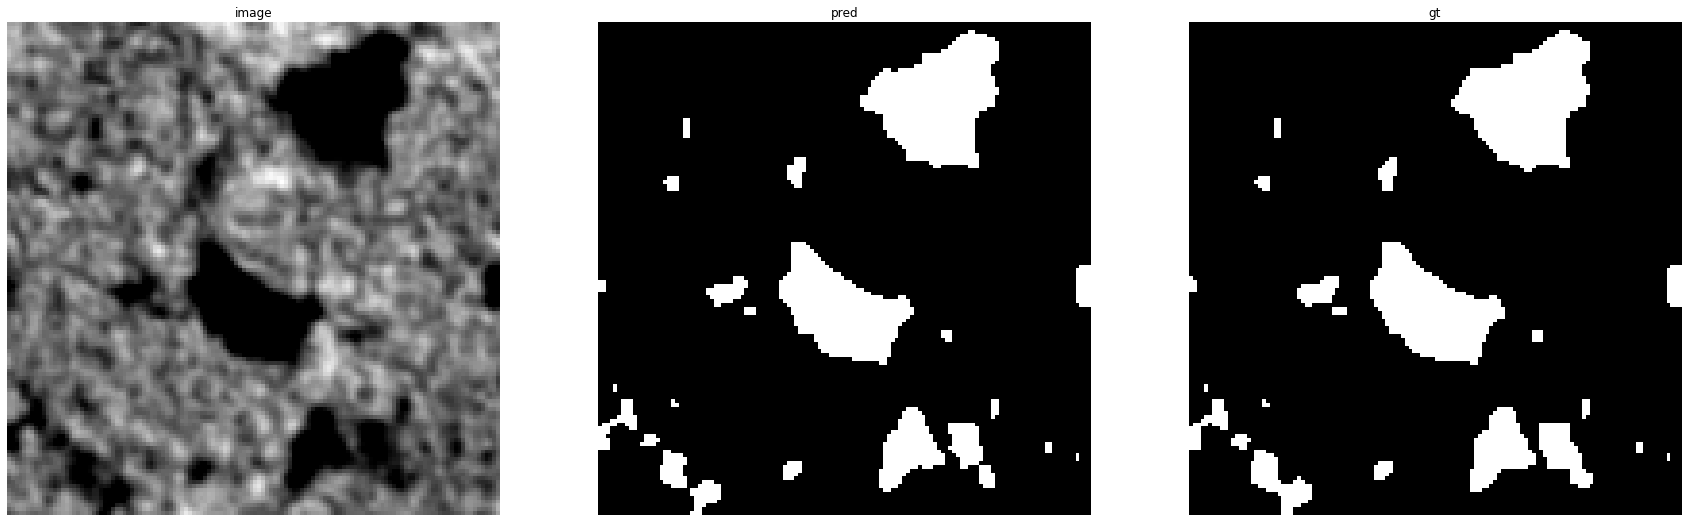

accuracy    : 0.9921875
precision   : 0.9956584659913169
recall      : 0.945487860742098
f1          : 0.9699248120300752
pr_auc      : 0.9985445672843362
iou         : 0.9416058394160584


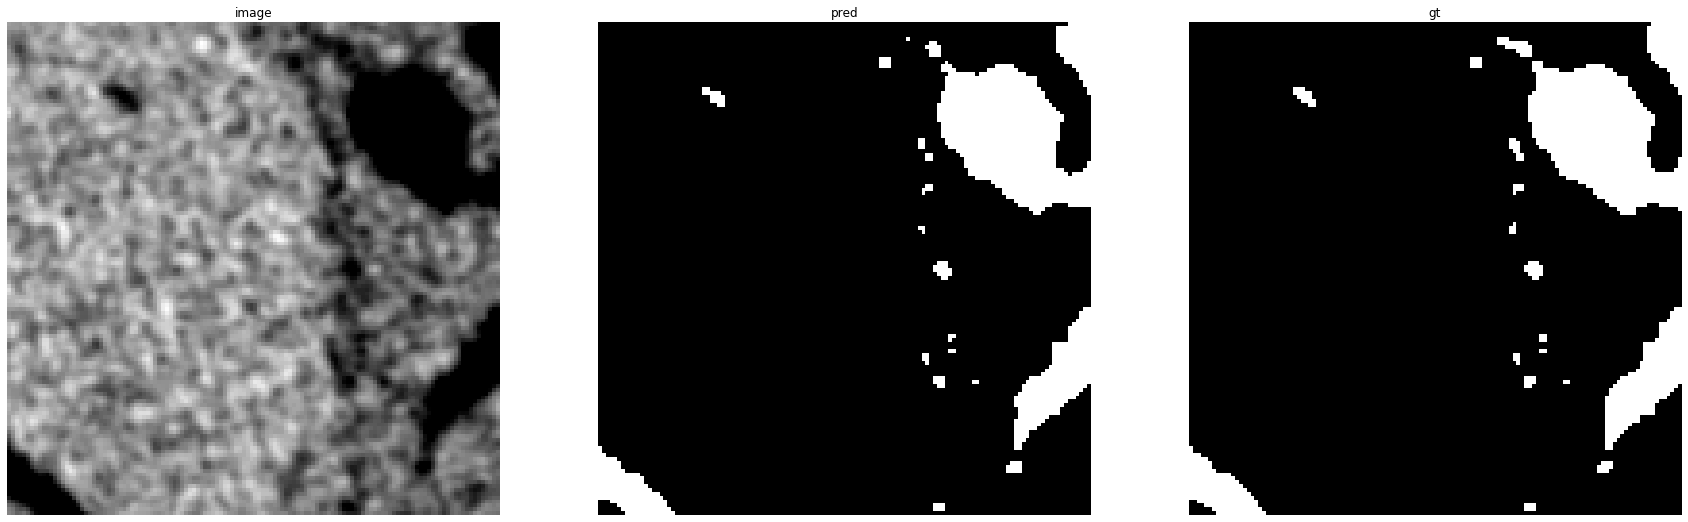

accuracy    : 0.9954833984375
precision   : 0.99822695035461
recall      : 0.959659090909091
f1          : 0.9785631517960602
pr_auc      : 0.9991527213073741
iou         : 0.9580260918888258


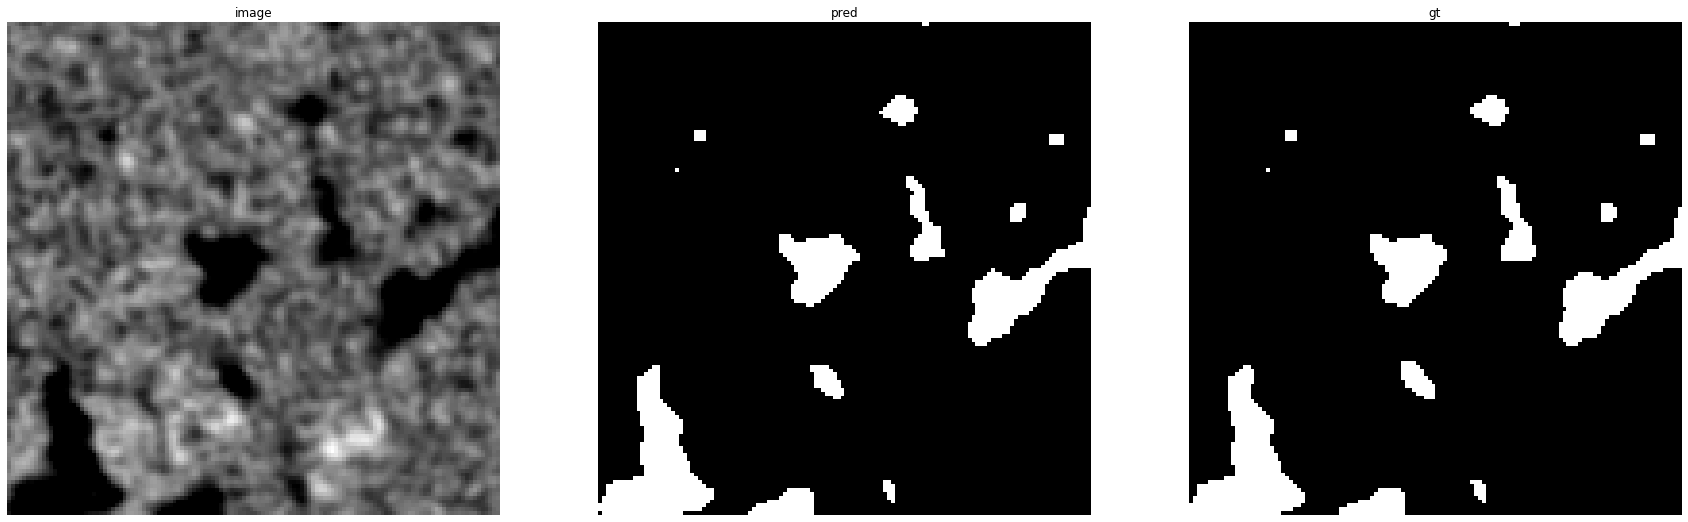

accuracy    : 0.996337890625
precision   : 0.9944789510006902
recall      : 0.9651707970529136
f1          : 0.9796057104010878
pr_auc      : 0.9990589120341101
iou         : 0.9600266489007329


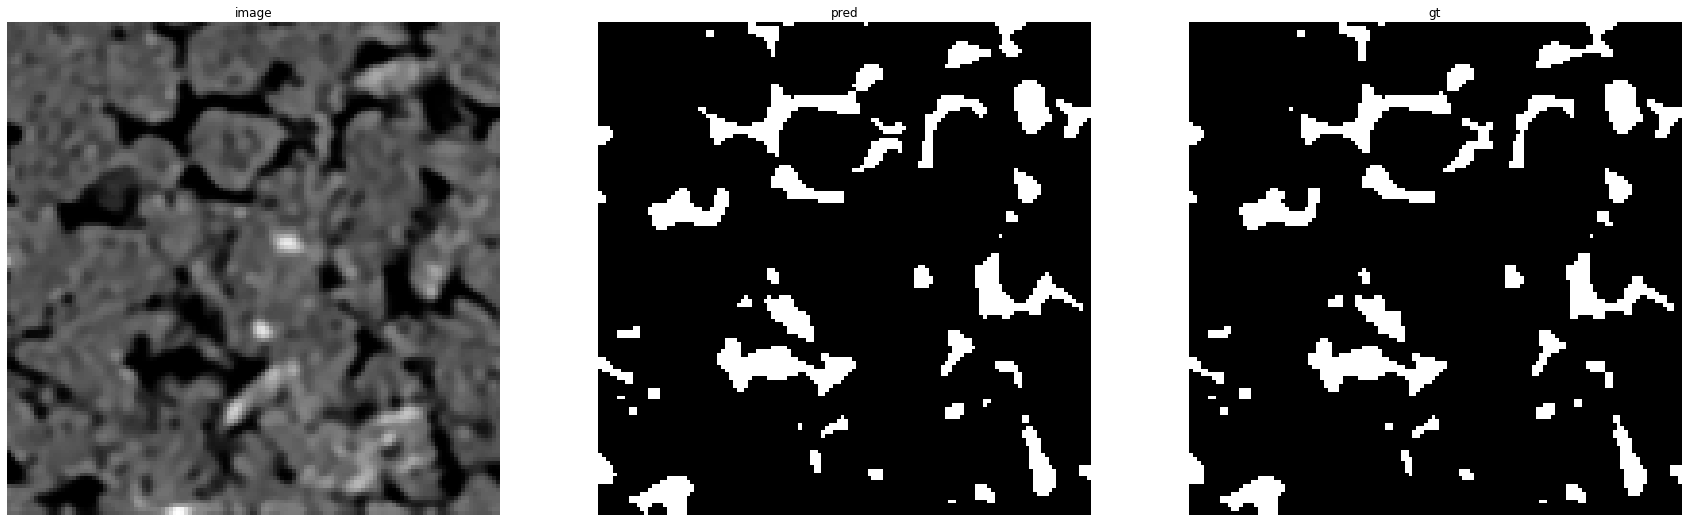

accuracy    : 0.99212646484375
precision   : 0.9596938775510204
recall      : 0.9741066804764371
f1          : 0.9668465690053971
pr_auc      : 0.9965681665695808
iou         : 0.935820895522388


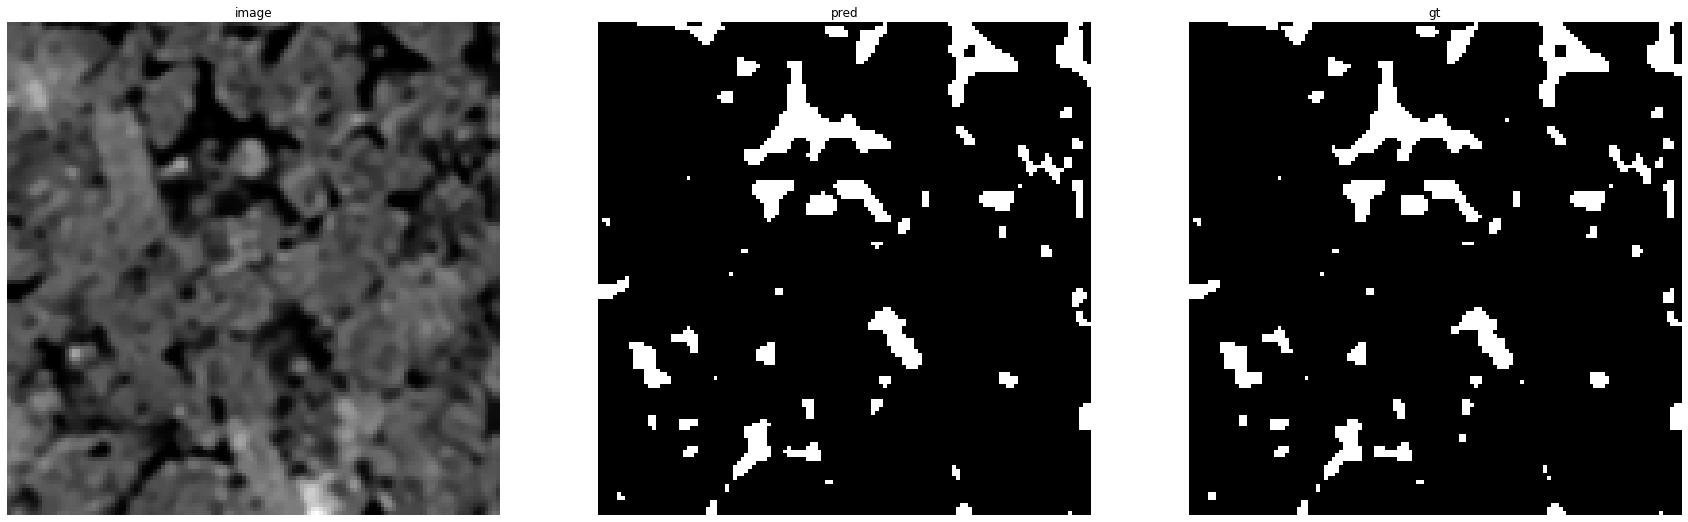

accuracy    : 0.992919921875
precision   : 0.9562700964630225
recall      : 0.968729641693811
f1          : 0.9624595469255663
pr_auc      : 0.9957820548619112
iou         : 0.9276356830941984


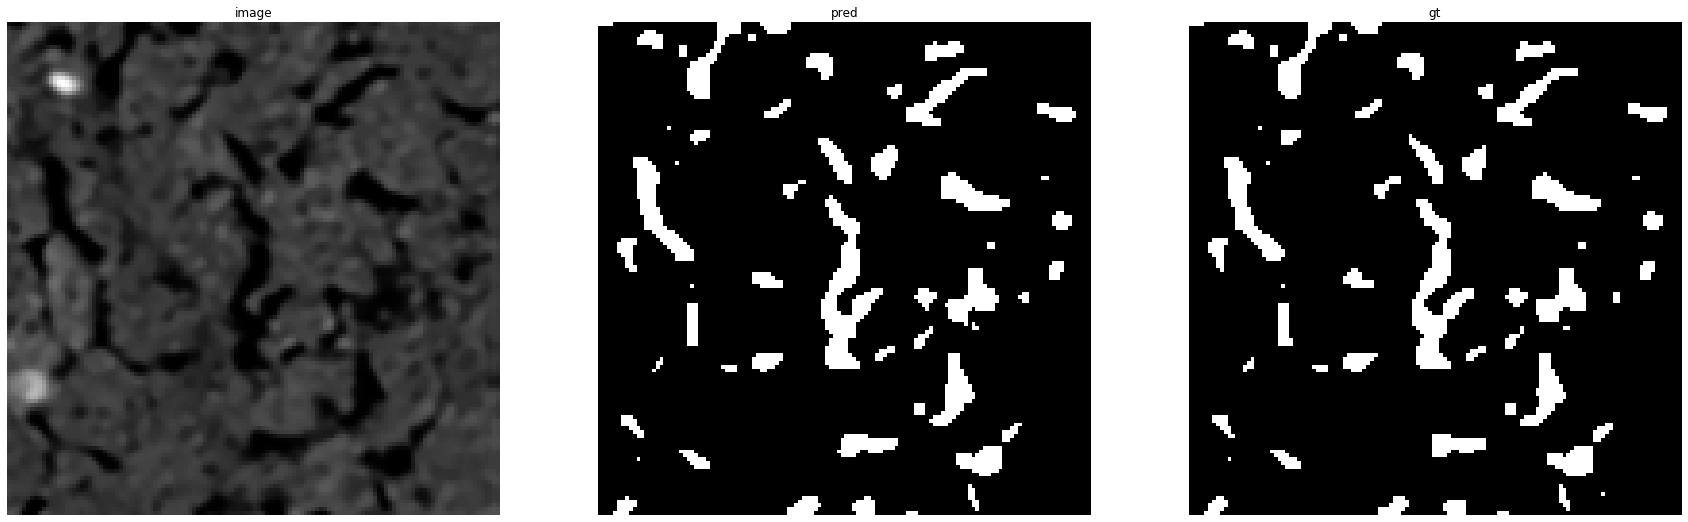

accuracy    : 0.9927978515625
precision   : 0.957582800697269
recall      : 0.9734199645599527
f1          : 0.9654364381956649
pr_auc      : 0.9961102450845112
iou         : 0.9331823329558324


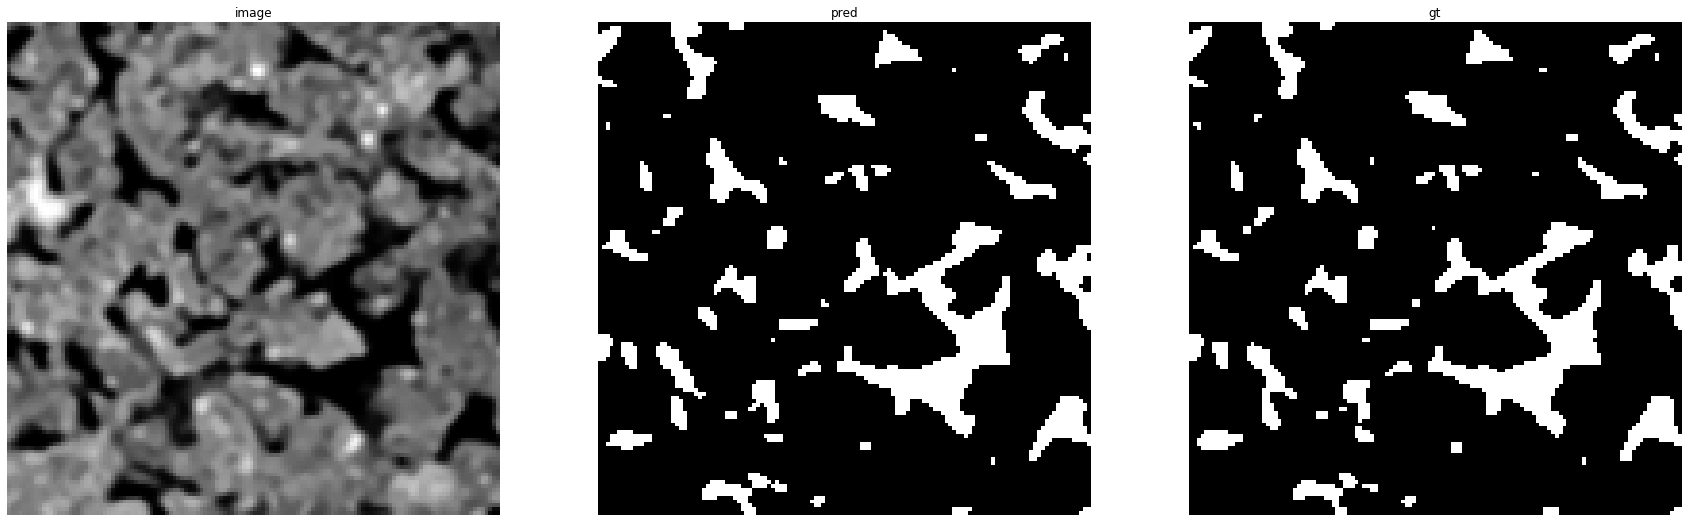

accuracy    : 0.99017333984375
precision   : 0.9675105485232067
recall      : 0.9646613378207824
f1          : 0.9660838424267958
pr_auc      : 0.9966970121247476
iou         : 0.9343928280358598


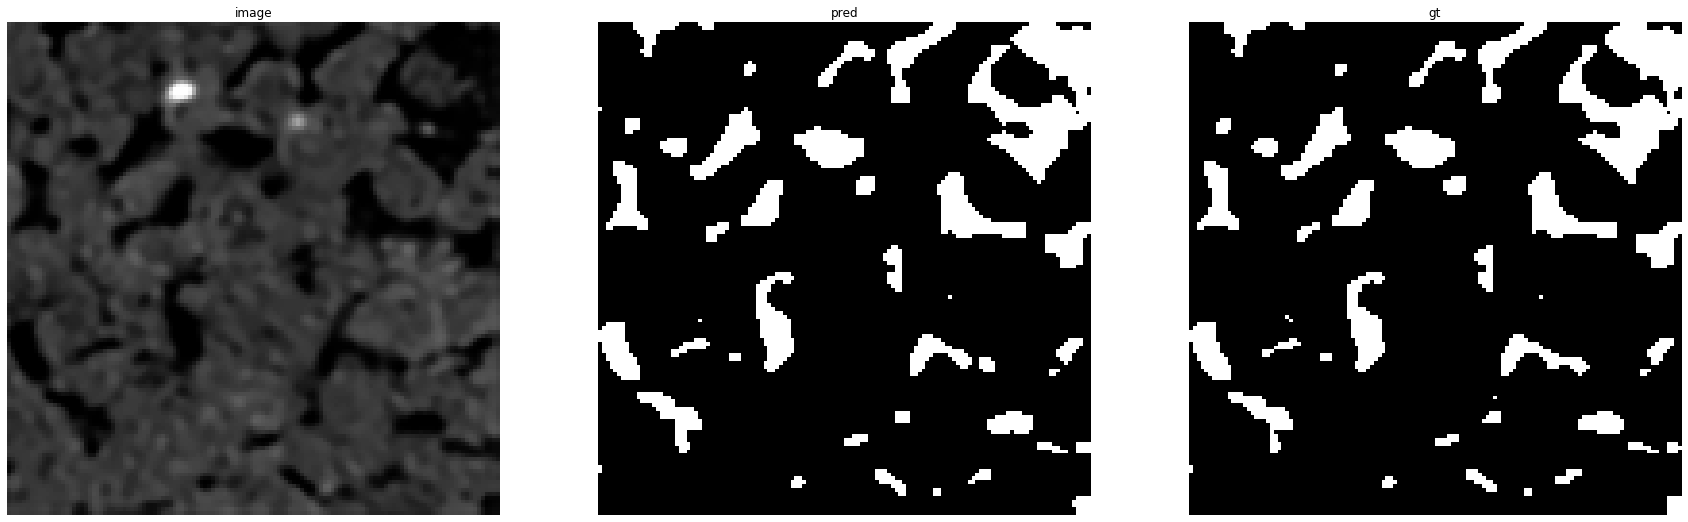

accuracy    : 0.99261474609375
precision   : 0.9640940982253405
recall      : 0.9856540084388186
f1          : 0.9747548508241185
pr_auc      : 0.9976711981890419
iou         : 0.9507529507529507


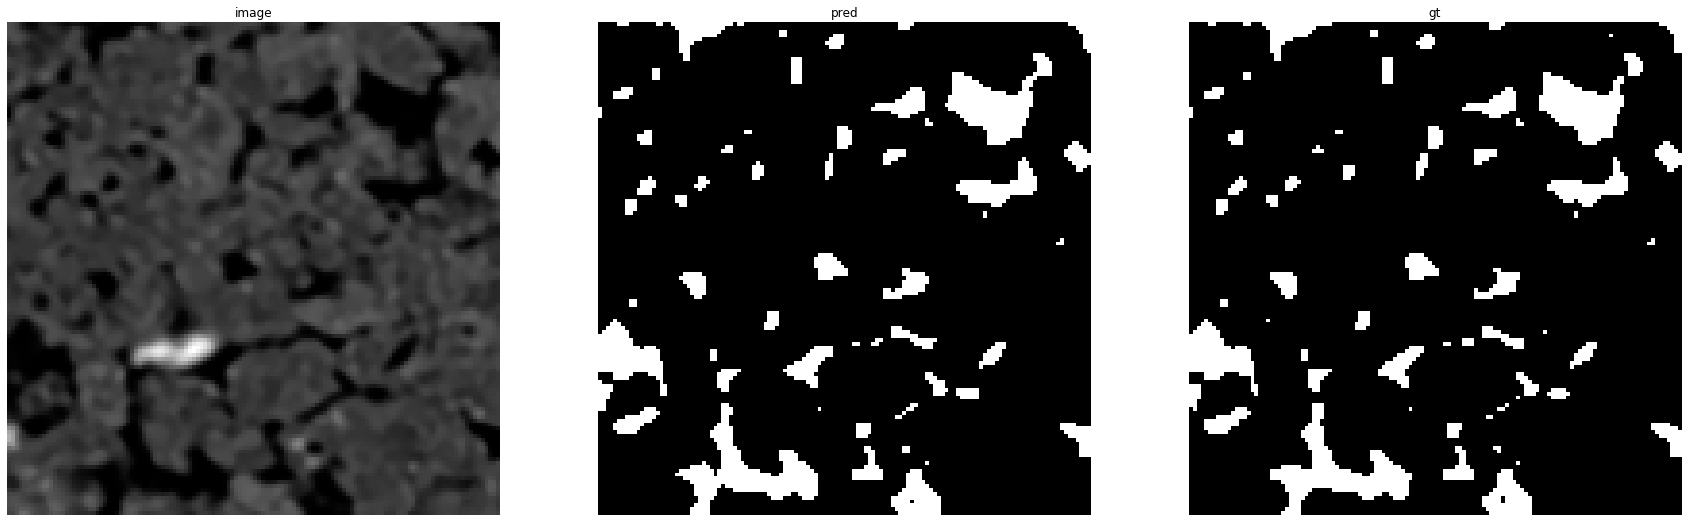

accuracy    : 0.99365234375
precision   : 0.9626749611197511
recall      : 0.9830598200105876
f1          : 0.9727606076479832
pr_auc      : 0.9978424121250262
iou         : 0.9469658337582866


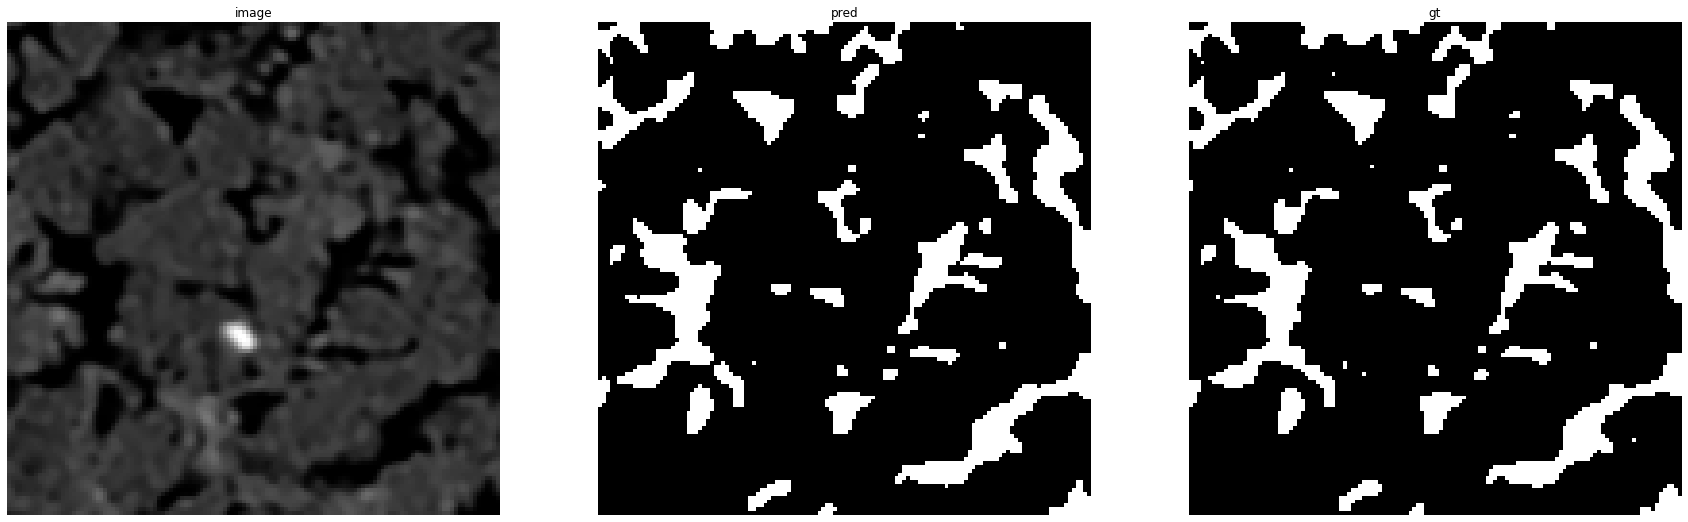

accuracy    : 0.99041748046875
precision   : 0.959585121602289
recall      : 0.9838650531719839
f1          : 0.9715734202426218
pr_auc      : 0.997595319524349
iou         : 0.944718309859155


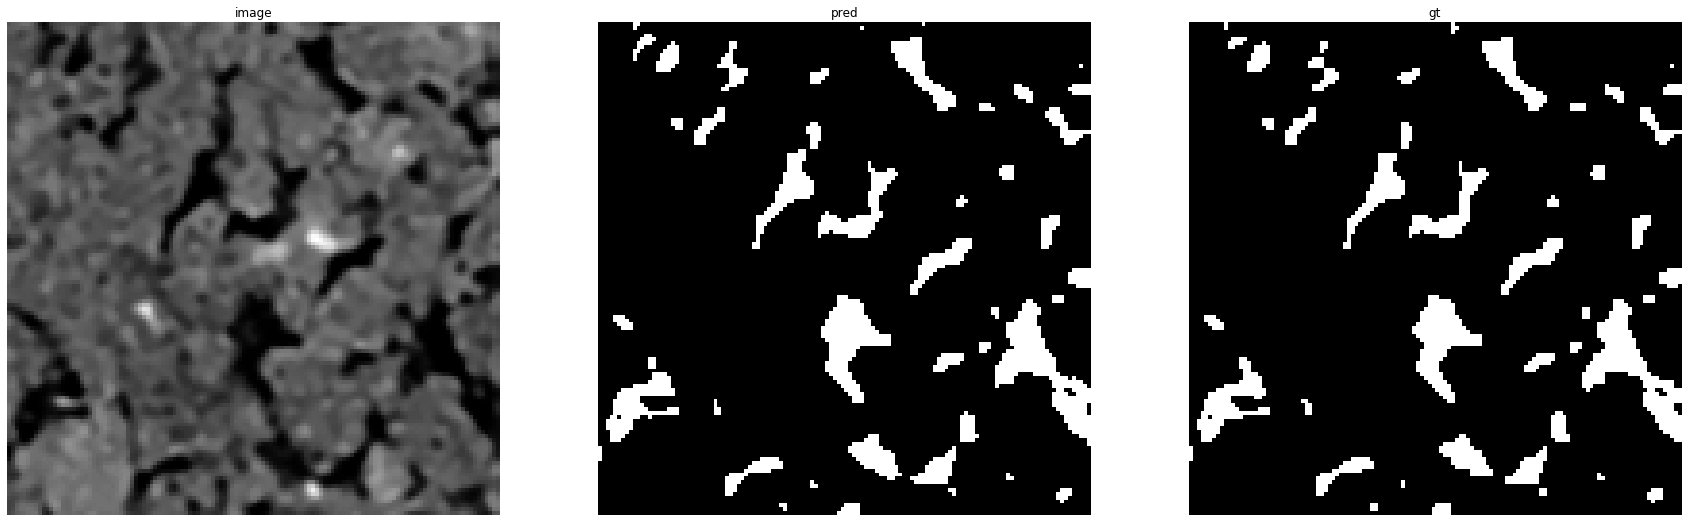

accuracy    : 0.99273681640625
precision   : 0.9566184649610678
recall      : 0.97671777399205
f1          : 0.9665636414723237
pr_auc      : 0.9960577221556554
iou         : 0.9352909189777052


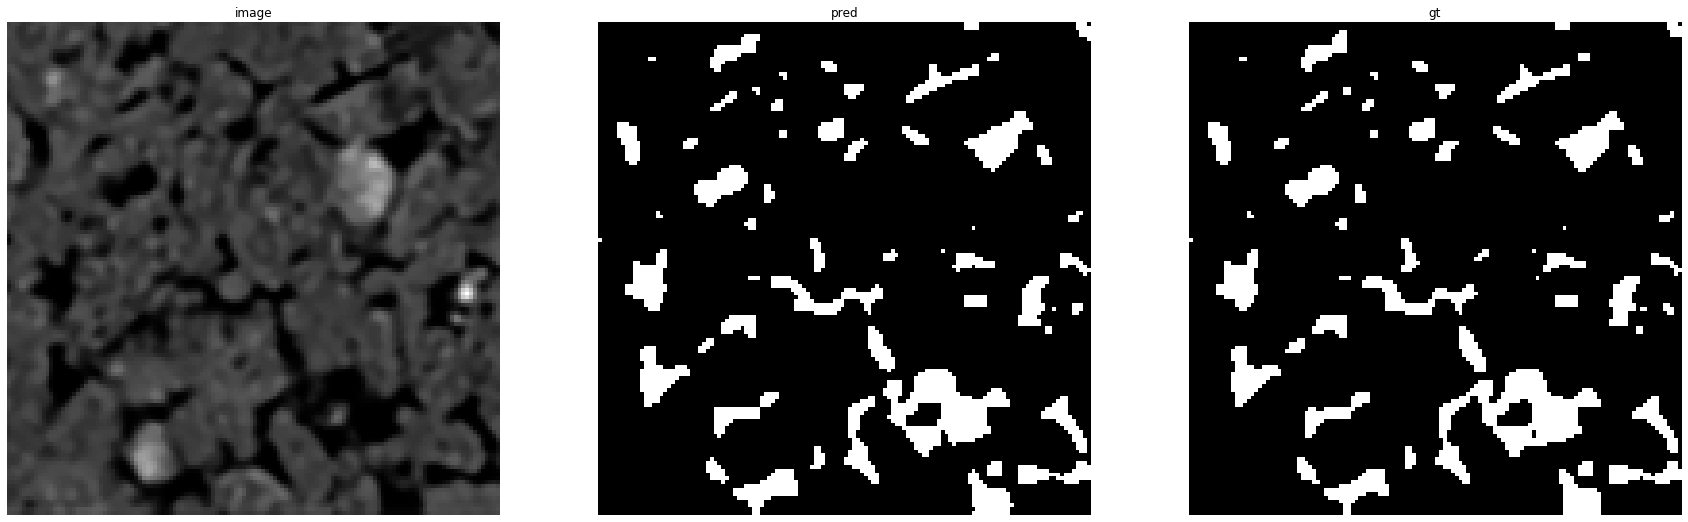

accuracy    : 0.99249267578125
precision   : 0.9710564399421129
recall      : 0.9696531791907514
f1          : 0.970354302241504
pr_auc      : 0.9965912739020681
iou         : 0.9424157303370787


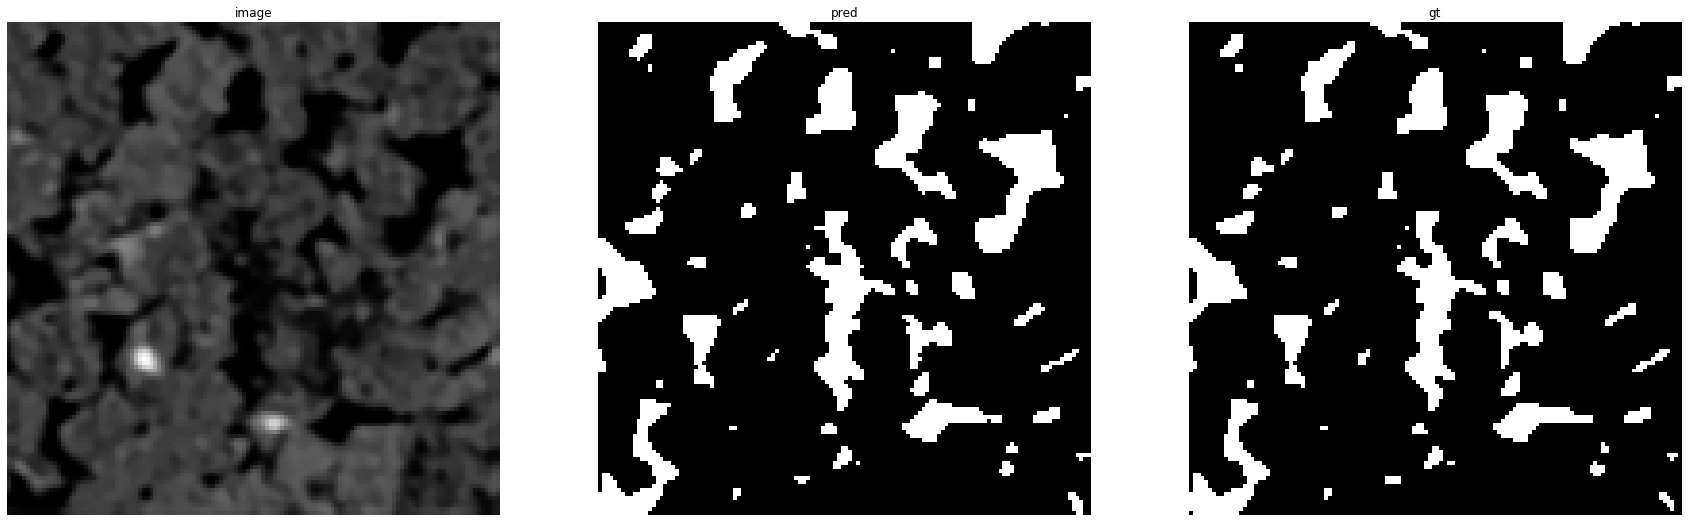

accuracy    : 0.99151611328125
precision   : 0.9612167300380228
recall      : 0.9855750487329434
f1          : 0.9732435033686238
pr_auc      : 0.997652169813902
iou         : 0.9478815148106486


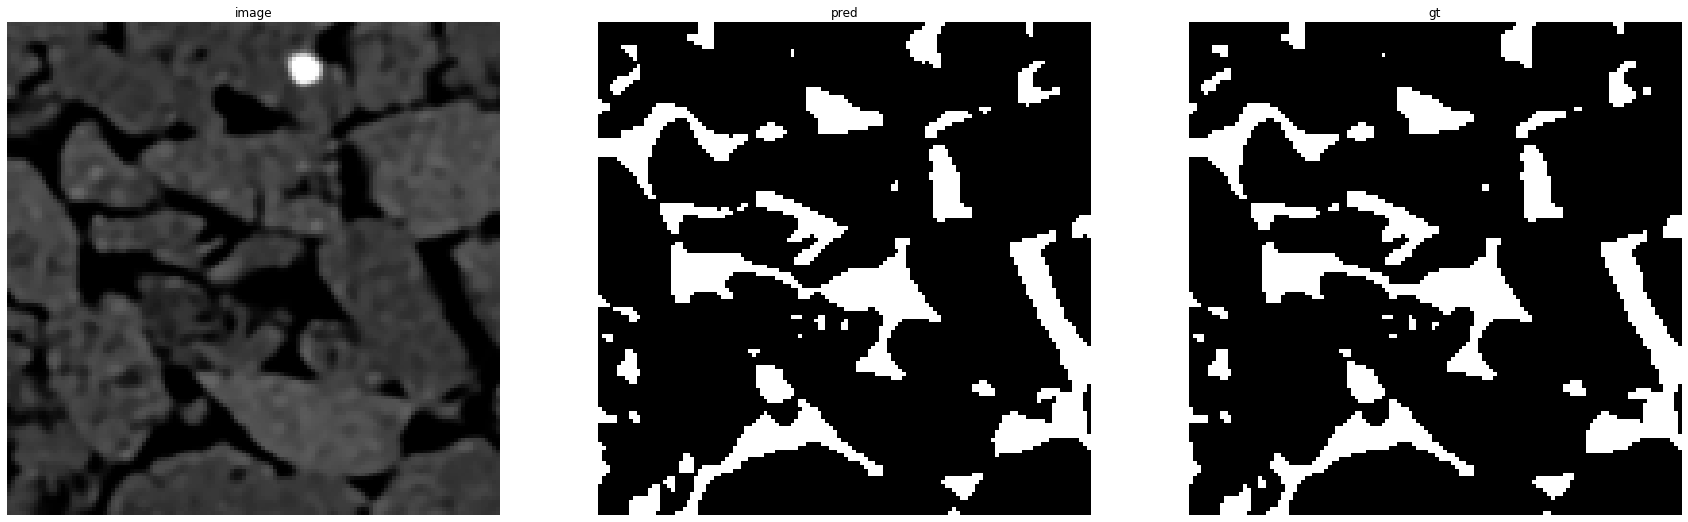

accuracy    : 0.989501953125
precision   : 0.9730003374957813
recall      : 0.9690756302521009
f1          : 0.971034018187942
pr_auc      : 0.9975130294505516
iou         : 0.9436988543371522


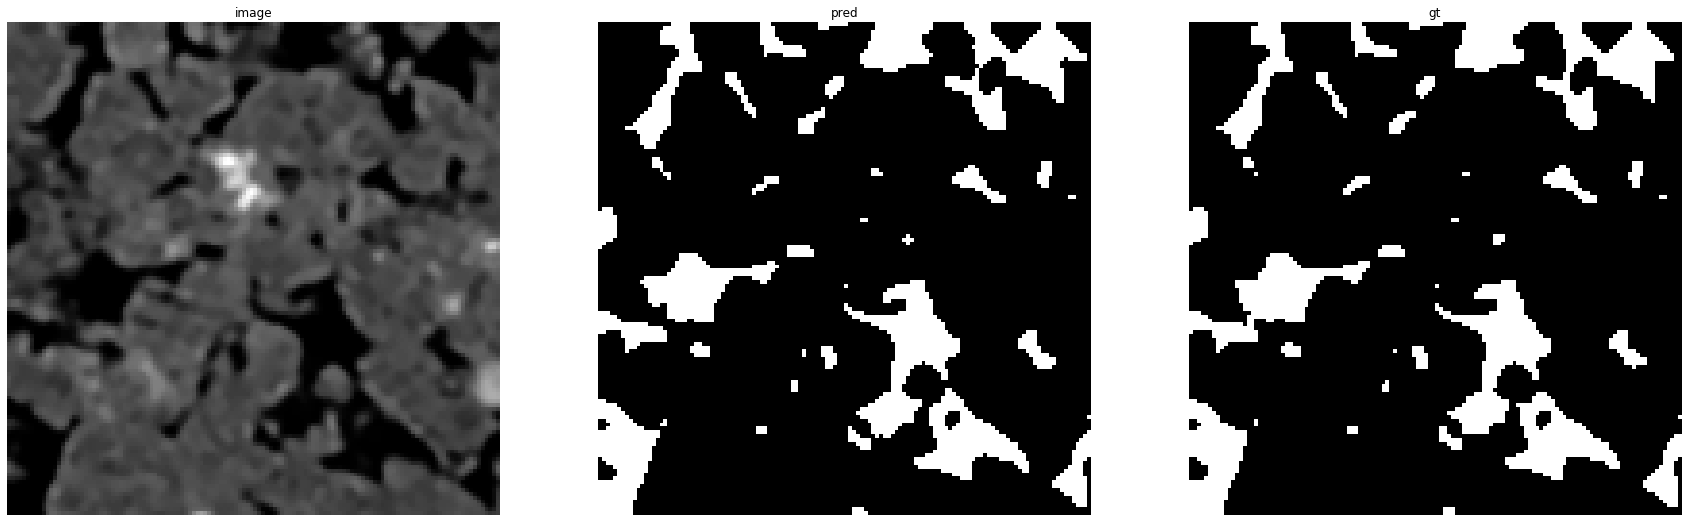

accuracy    : 0.99212646484375
precision   : 0.9742304939155333
recall      : 0.9794890248290752
f1          : 0.9768526825767091
pr_auc      : 0.9978744787861705
iou         : 0.9547527183444405


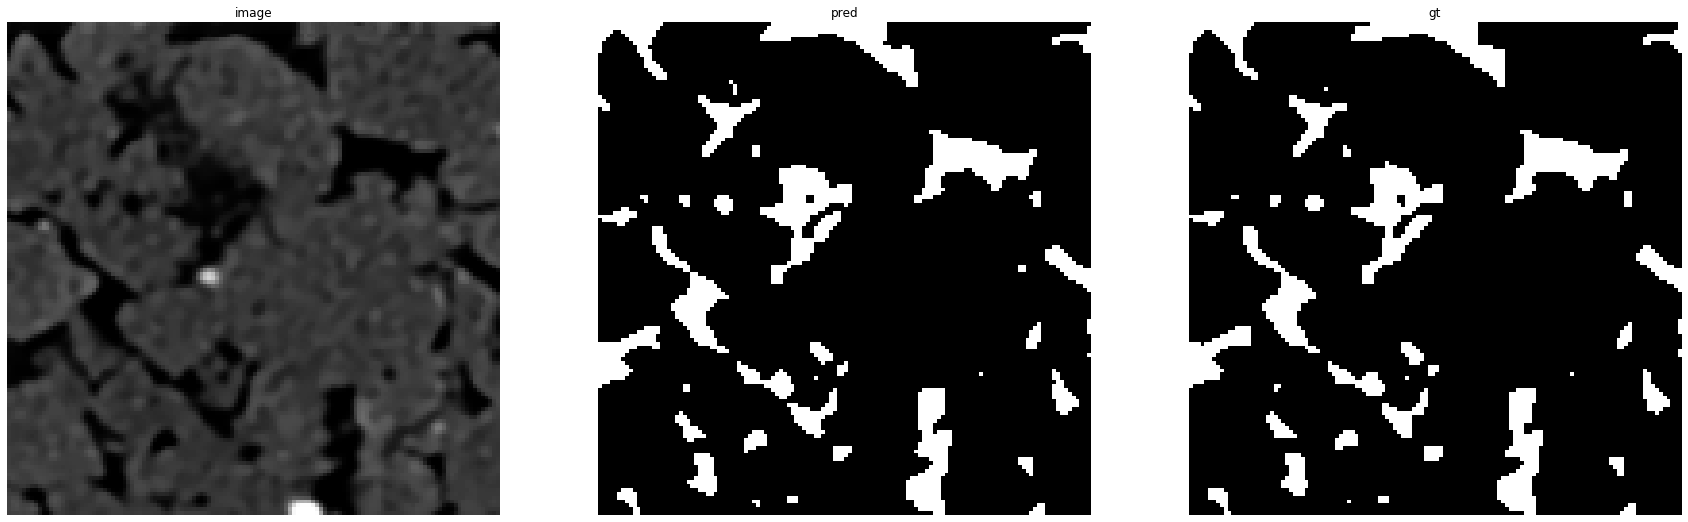

accuracy    : 0.9913330078125
precision   : 0.9561940650023552
recall      : 0.9764309764309764
f1          : 0.9662065683008091
pr_auc      : 0.996845602190237
iou         : 0.934622467771639


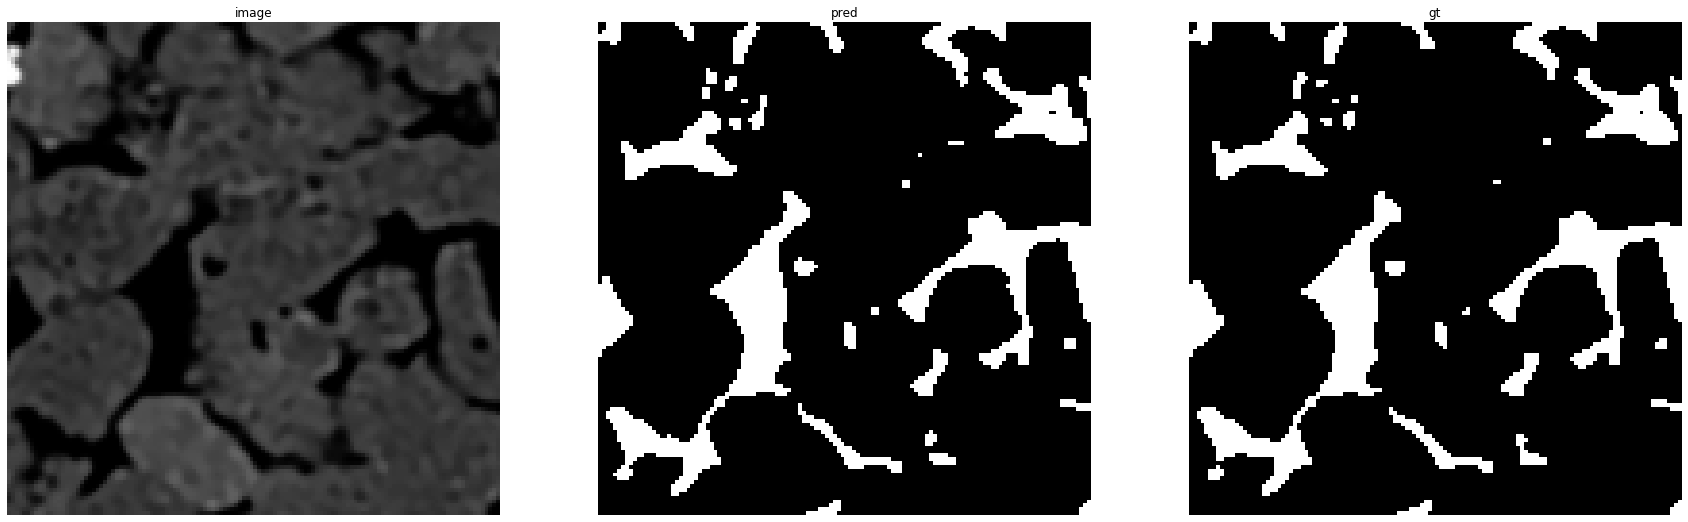

accuracy    : 0.99200439453125
precision   : 0.9630924630924631
recall      : 0.9856858846918489
f1          : 0.9742582039693458
pr_auc      : 0.9980898738046686
iou         : 0.949808429118774


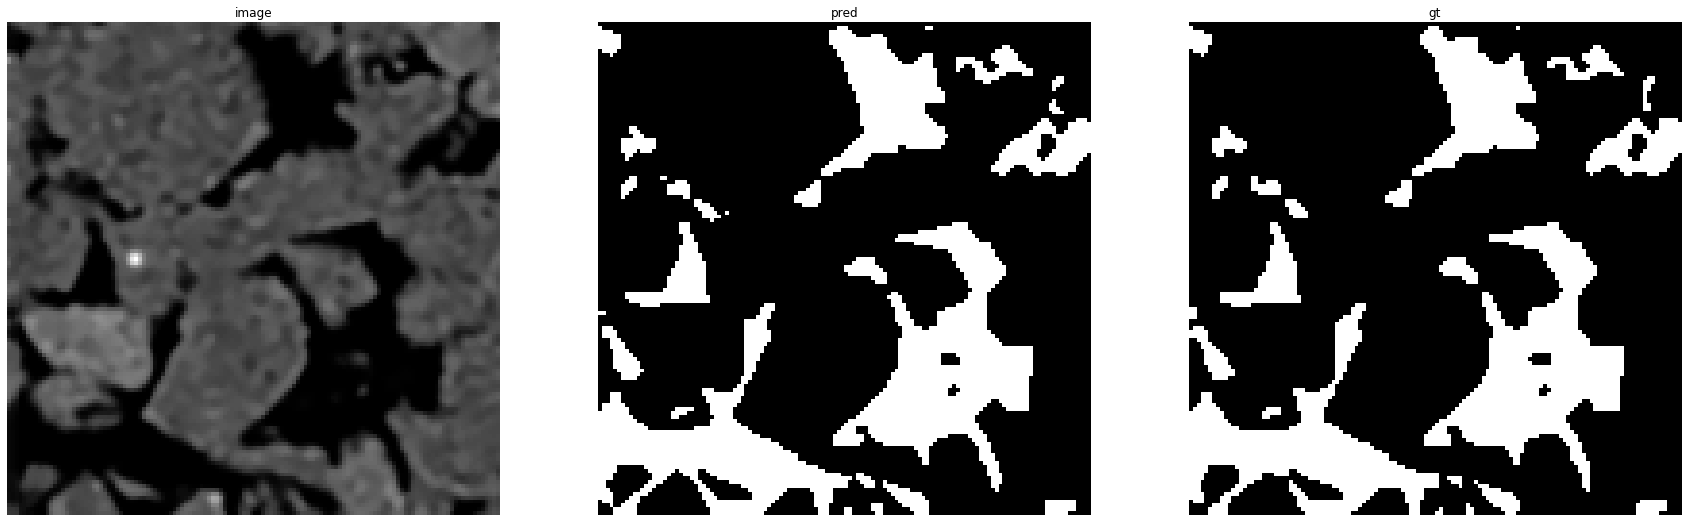

accuracy    : 0.99005126953125
precision   : 0.9737290197032352
recall      : 0.9864465253819615
f1          : 0.9800465173215815
pr_auc      : 0.9988258604760752
iou         : 0.9608737397983678


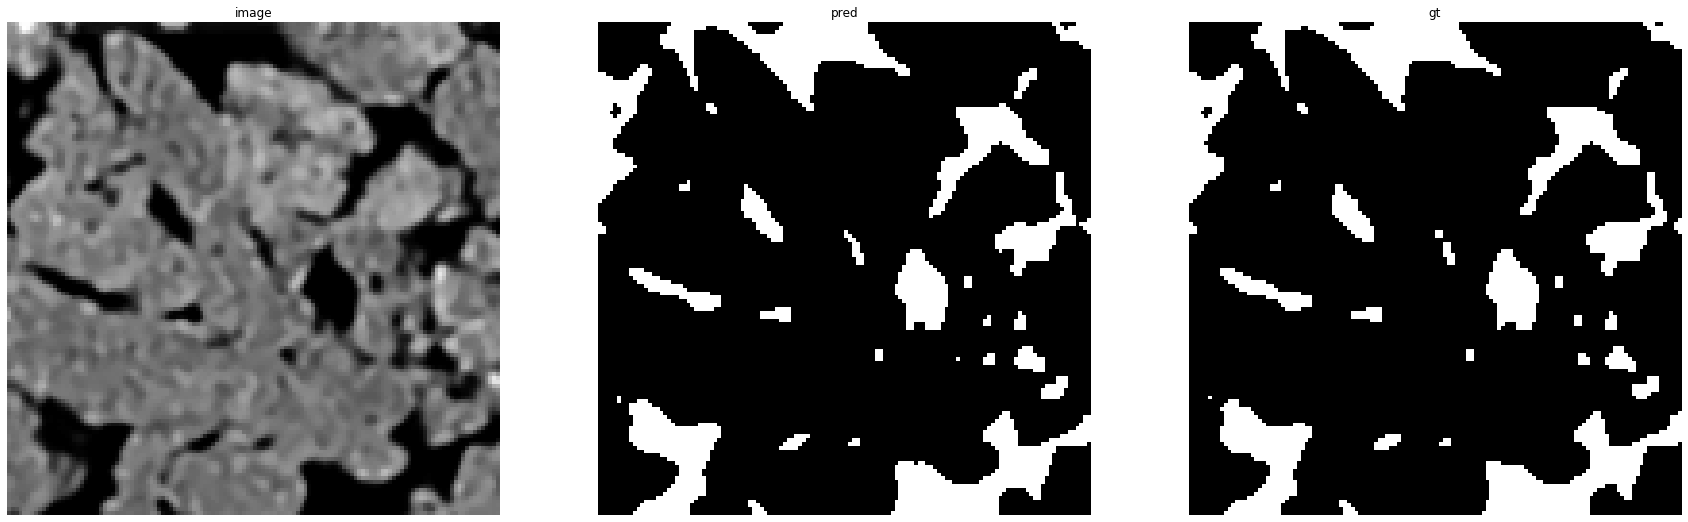

accuracy    : 0.992919921875
precision   : 0.9801324503311258
recall      : 0.9794496691048415
f1          : 0.9797909407665505
pr_auc      : 0.9987645904377958
iou         : 0.9603825136612022


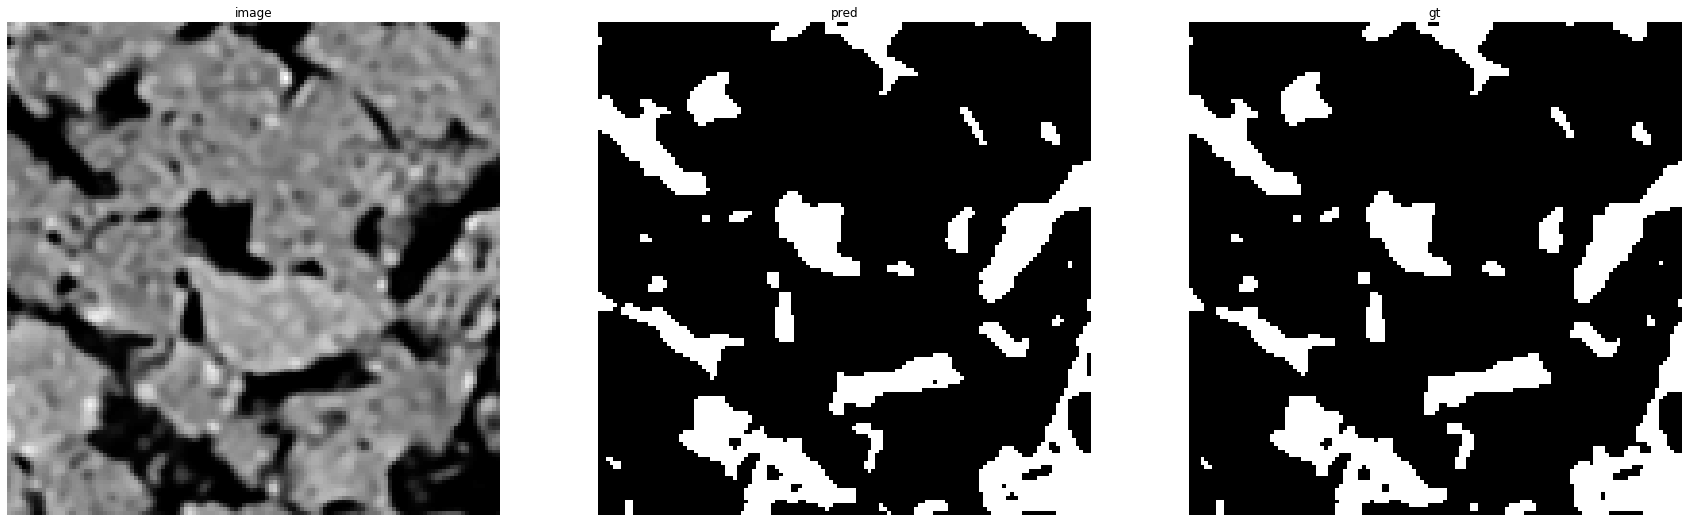

accuracy    : 0.98895263671875
precision   : 0.9655490618271301
recall      : 0.9784912718204489
f1          : 0.9719770862362594
pr_auc      : 0.9981921989401018
iou         : 0.9454819277108434


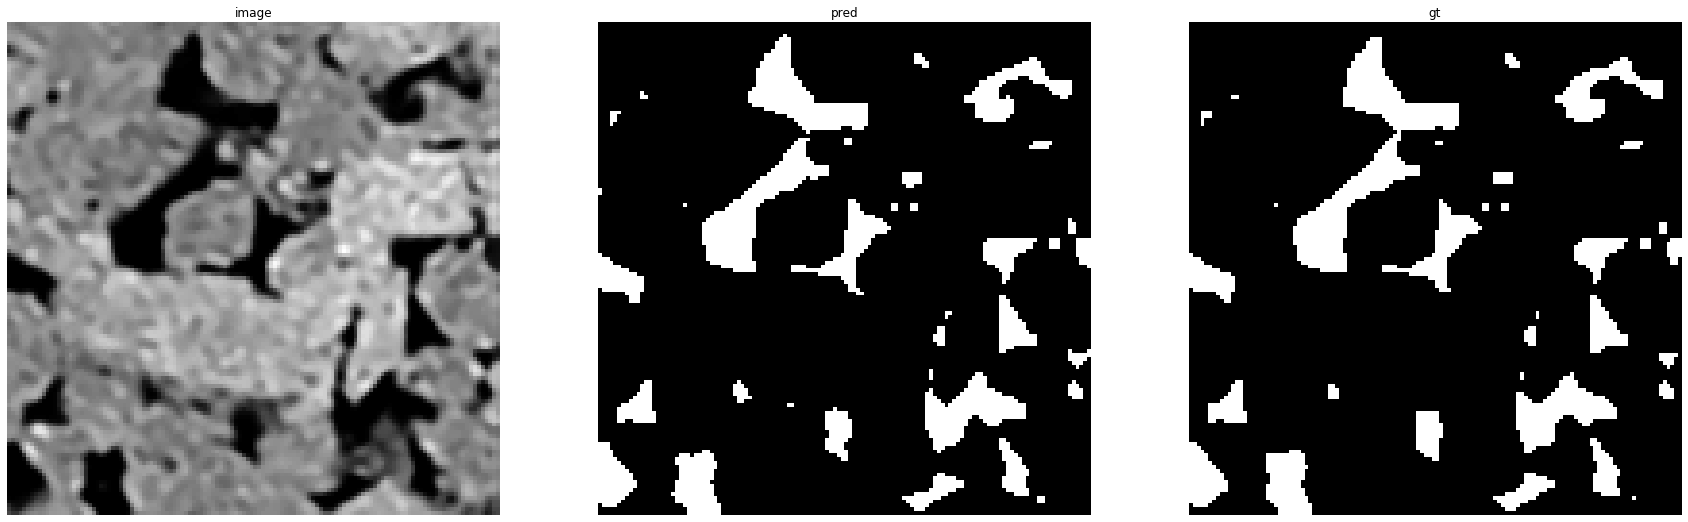

accuracy    : 0.99285888671875
precision   : 0.9691358024691358
recall      : 0.9790645879732739
f1          : 0.9740748947485043
pr_auc      : 0.9979819623836775
iou         : 0.9494600431965443


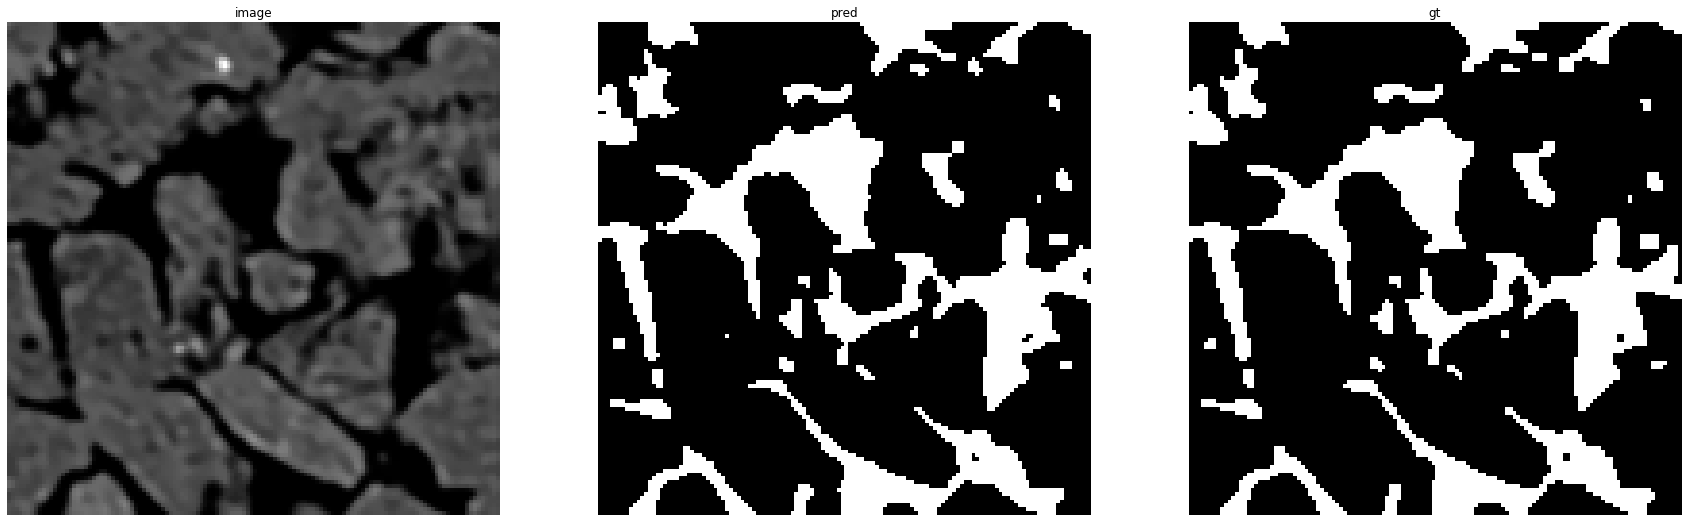

accuracy    : 0.987548828125
precision   : 0.9693851944792974
recall      : 0.979214195183777
f1          : 0.9742749054224463
pr_auc      : 0.9979885301028147
iou         : 0.9498401770346693


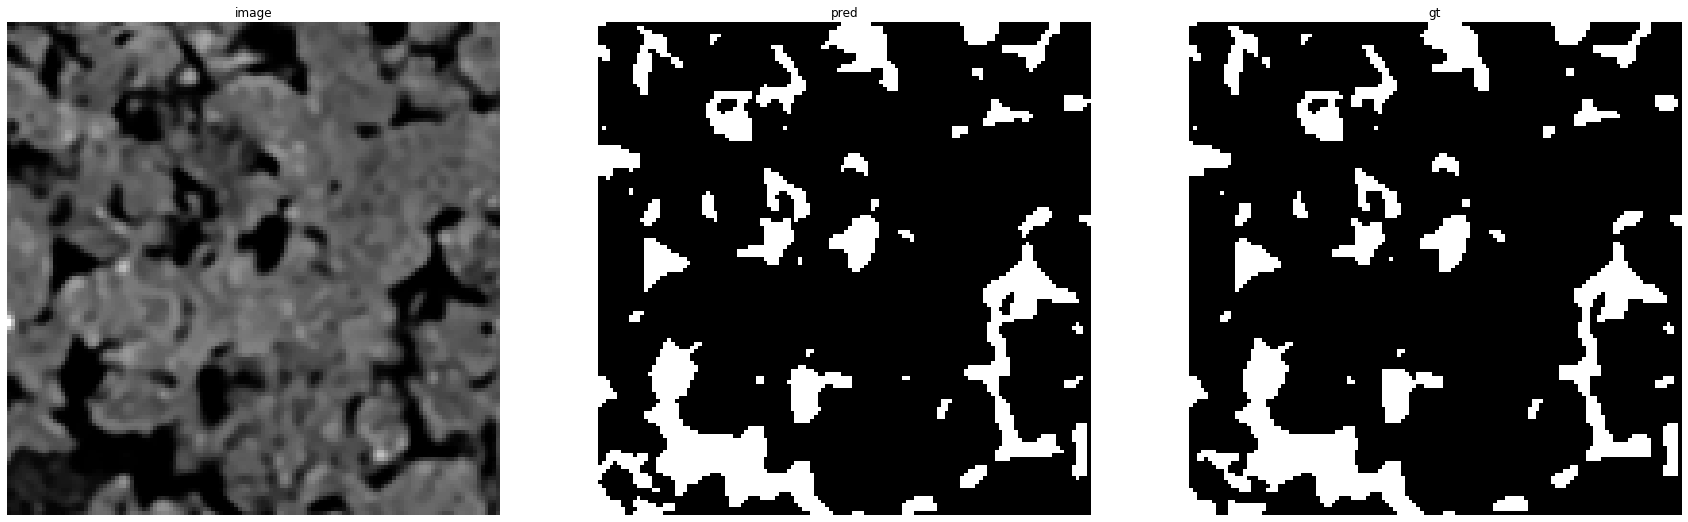

accuracy    : 0.9862060546875
precision   : 0.9444249032711924
recall      : 0.9752996730839084
f1          : 0.9596140100071479
pr_auc      : 0.9956696088881252
iou         : 0.9223634489866025


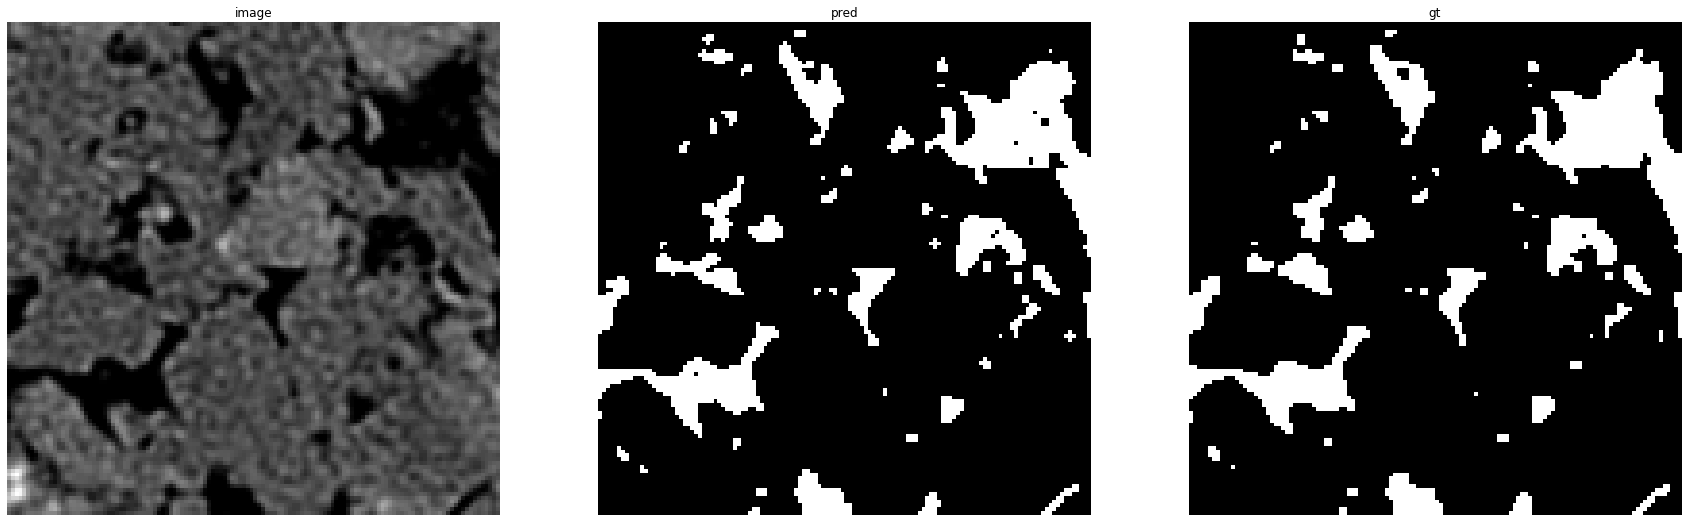

accuracy    : 0.98614501953125
precision   : 0.964406779661017
recall      : 0.9408846630839189
f1          : 0.9525005231219921
pr_auc      : 0.9939829220838673
iou         : 0.9093088294047144


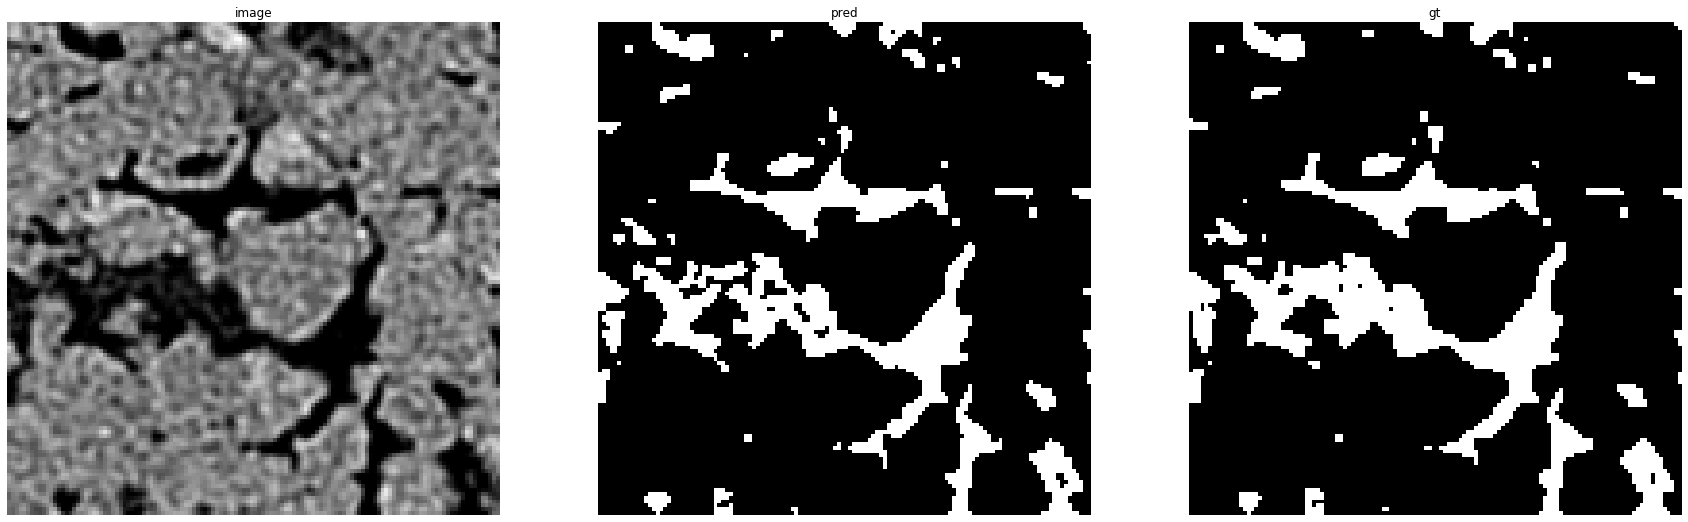

accuracy    : 0.9803466796875
precision   : 0.9712397979012826
recall      : 0.9097196942118675
f1          : 0.9394736842105262
pr_auc      : 0.9912507984853396
iou         : 0.8858560794044665


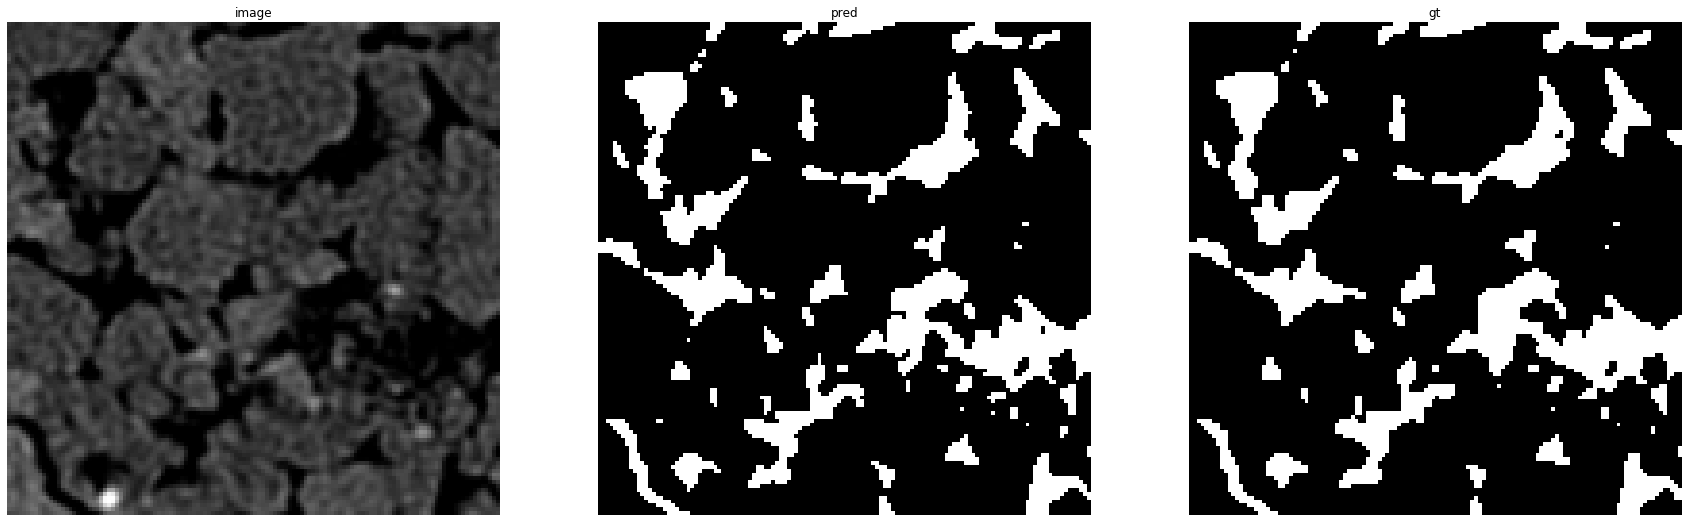

accuracy    : 0.9808349609375
precision   : 0.9722772277227723
recall      : 0.9275818639798489
f1          : 0.9494038027715114
pr_auc      : 0.9925443774103445
iou         : 0.903680981595092


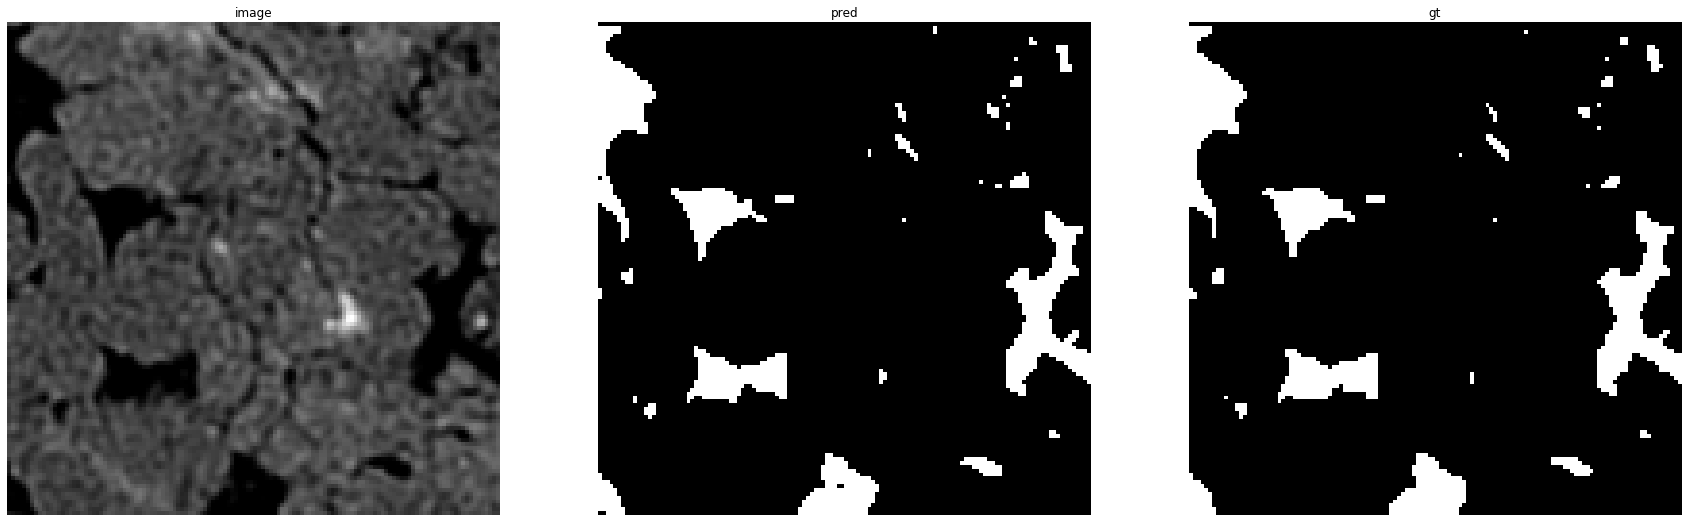

accuracy    : 0.99346923828125
precision   : 0.9696782178217822
recall      : 0.9643076923076923
f1          : 0.966985498302993
pr_auc      : 0.9968175238697508
iou         : 0.9360812425328554


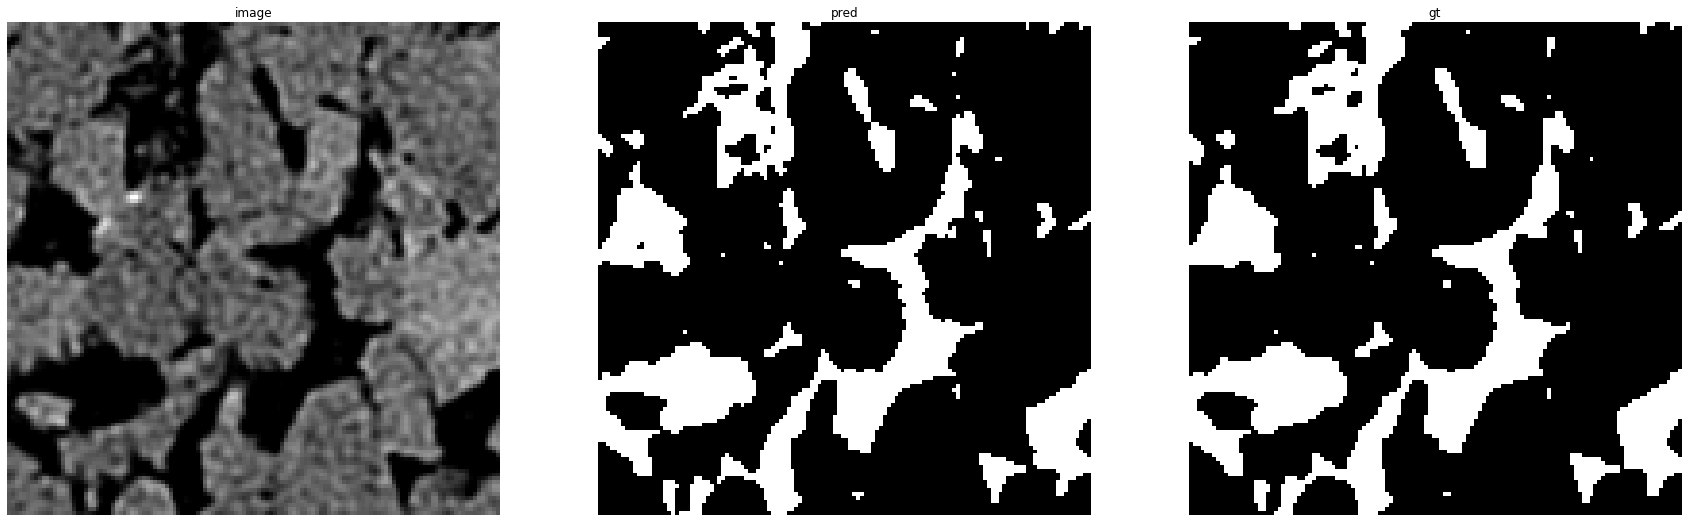

accuracy    : 0.98333740234375
precision   : 0.9830553349218957
recall      : 0.9467108618052015
f1          : 0.964540849460969
pr_auc      : 0.9967958052790036
iou         : 0.9315102860010035


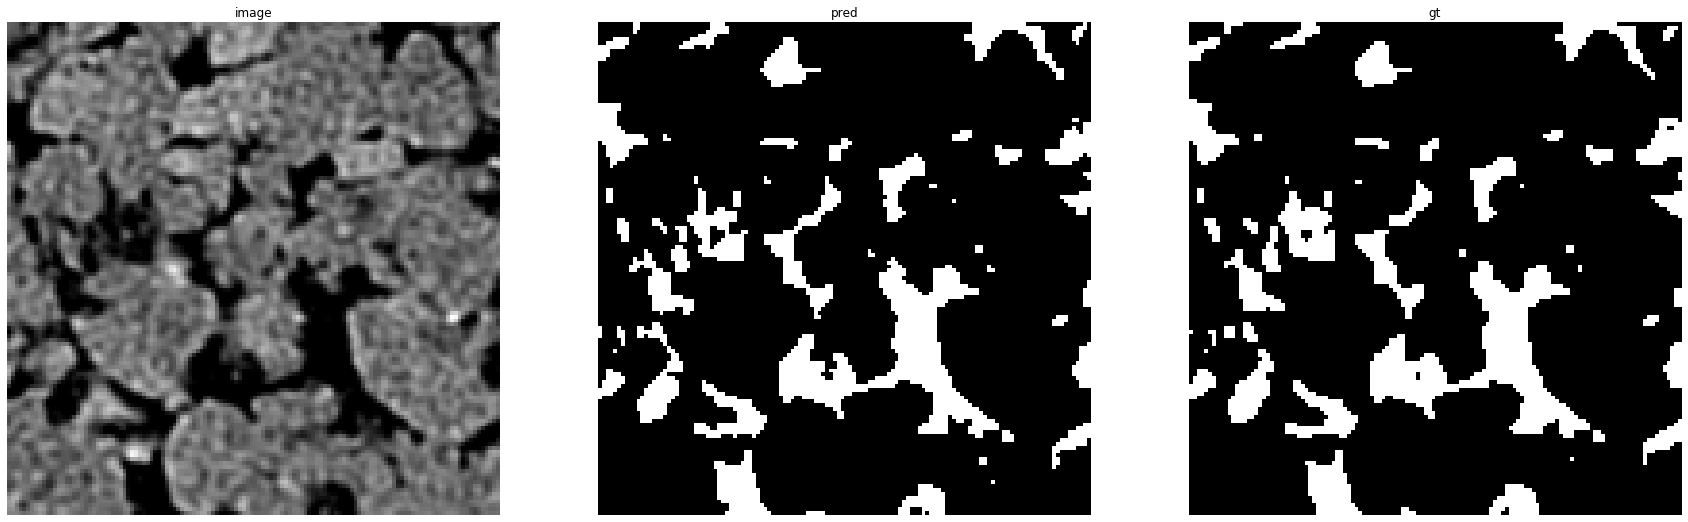

accuracy    : 0.9835205078125
precision   : 0.9683853970643583
recall      : 0.9325842696629213
f1          : 0.9501477104874447
pr_auc      : 0.993211957218649
iou         : 0.9050298979950756


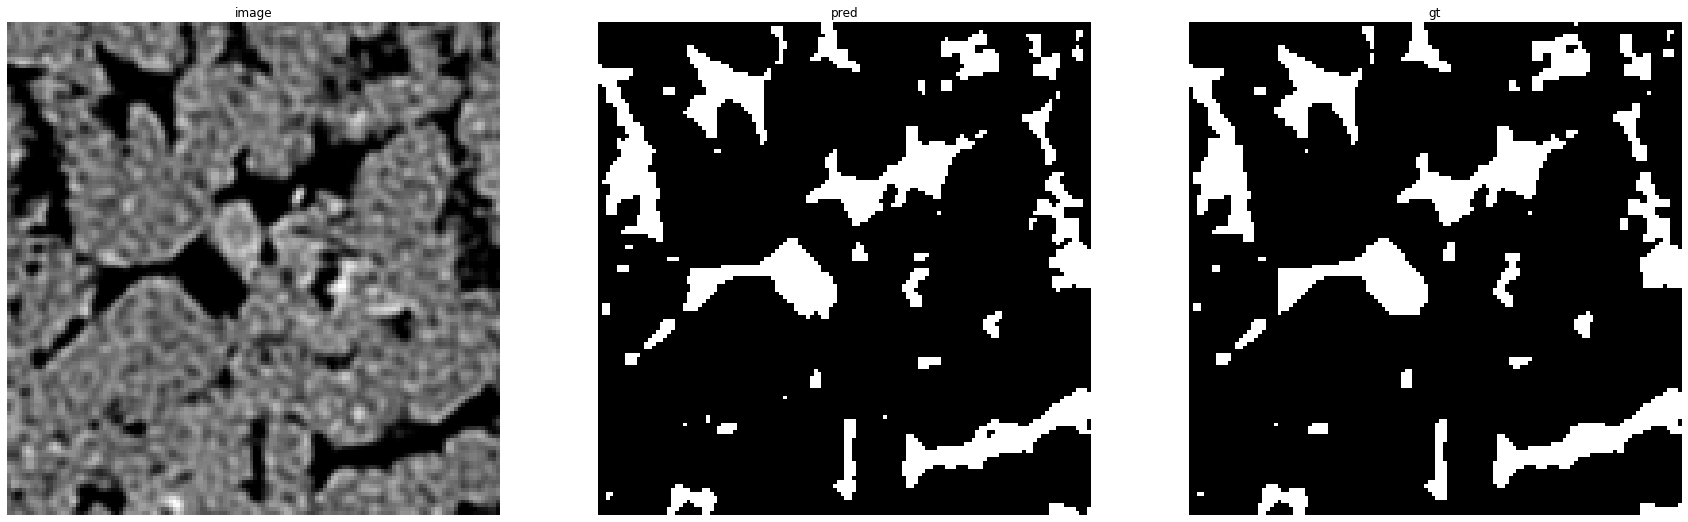

accuracy    : 0.98565673828125
precision   : 0.9709864603481625
recall      : 0.9400749063670412
f1          : 0.9552806850618458
pr_auc      : 0.9945785115208168
iou         : 0.9143897996357013


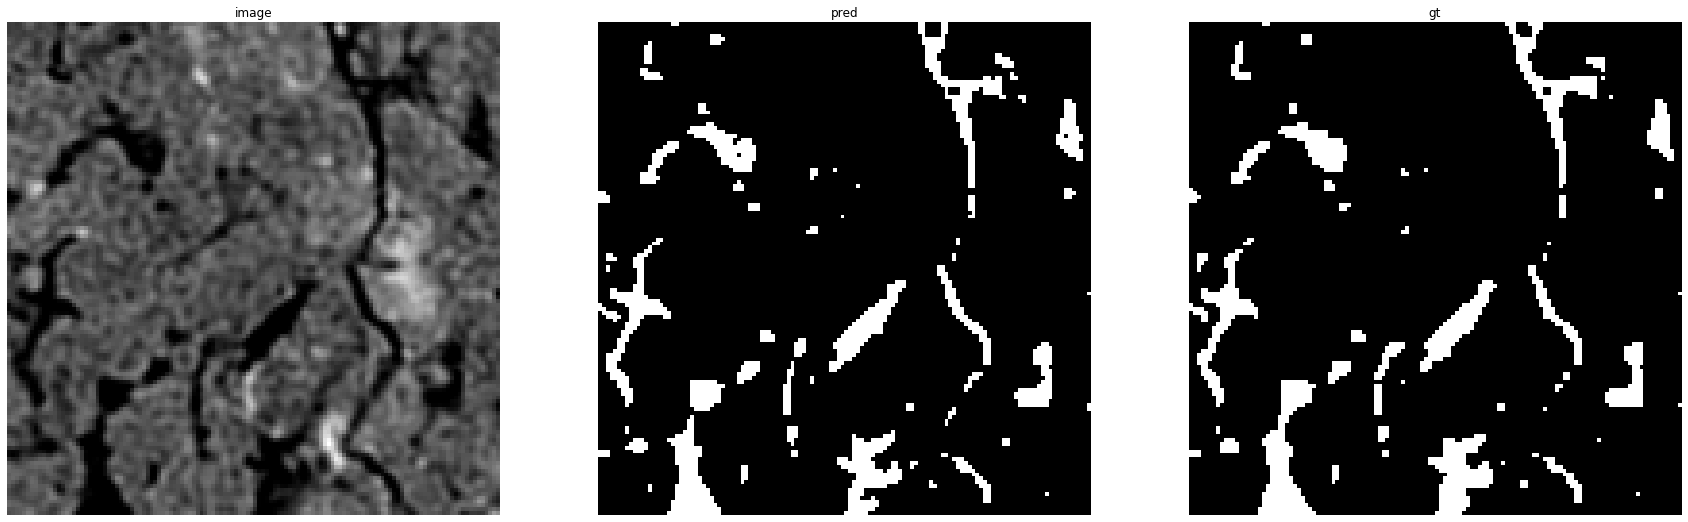

accuracy    : 0.988037109375
precision   : 0.9552517091361094
recall      : 0.9253461770018061
f1          : 0.9400611620795106
pr_auc      : 0.9885638121423092
iou         : 0.8869013271783035


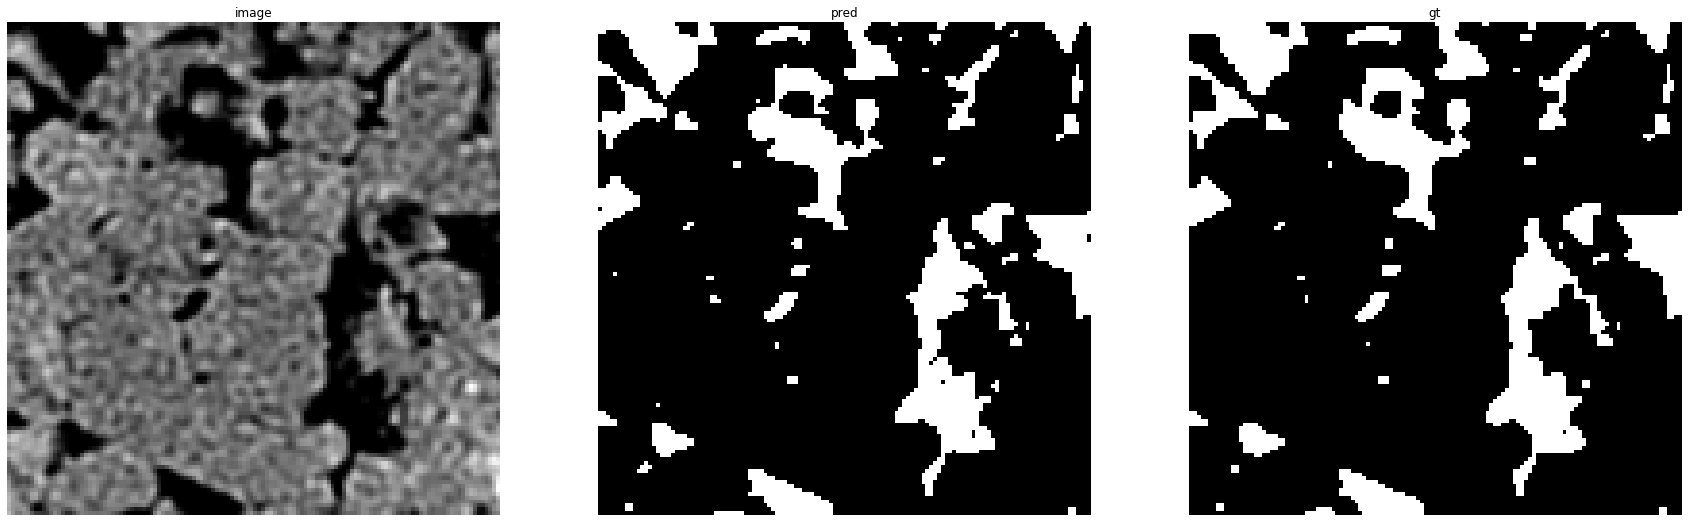

accuracy    : 0.986328125
precision   : 0.9756944444444444
recall      : 0.9480431848852902
f1          : 0.9616700889801506
pr_auc      : 0.9957526979528862
iou         : 0.9261700725115359


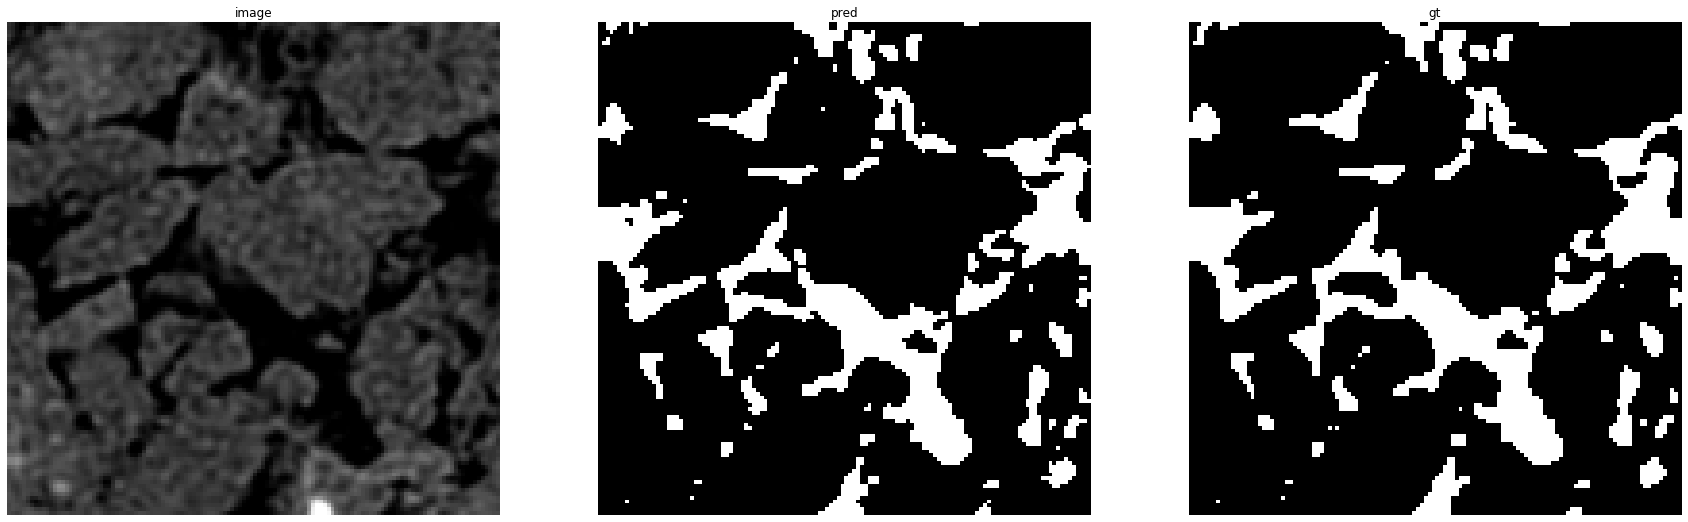

accuracy    : 0.9791259765625
precision   : 0.9730163829103758
recall      : 0.9215089747490113
f1          : 0.9465625
pr_auc      : 0.9921016436856234
iou         : 0.8985464253930584


In [27]:
for stack_name, dataloader_test in dataloaders_test.items():
    cnt = to_plot
    
    stack_name = os.path.split(stack_name)[-1]
    dir_path = os.path.join(os.path.abspath('.'), 'samples', stack_name)
    if stack_name not in os.listdir(os.path.join('.', 'samples')):
        os.mkdir(dir_path)
    
    for samples, masks in dataloader_test:

        preds = model(torch.from_numpy(samples).to(device)).cpu().data.numpy()

        for sample, mask, pred in list(zip(samples, masks, preds))[:cnt]:
            img_path = os.path.join('.', 'samples', stack_name, '{}.png'.format(cnt))
            plot_sample(sample[0], mask, pred, threshold, metrics, img_path)
            cnt -= 1
            
        if cnt ==0:
            break

## Result

In [29]:
import pandas as pd

from visualization_utils import make_df

df = make_df(results, model_name=data_conf['conf_name'])
df

accuracy  precision    recall        f1    pr_auc       iou  \
0   0.996936   0.977549  0.979536  0.978542  0.998518  0.957985   
1   0.988441   0.917123  0.988880  0.951650  0.994311  0.907761   
2   0.983198   0.979646  0.857828  0.914699  0.983921  0.842806   
3   0.993675   0.995802  0.900598  0.945810  0.996473  0.897191   
4   0.992922   0.971254  0.929014  0.949664  0.990969  0.904153   
5   0.996587   0.969101  0.972641  0.970868  0.997016  0.943385   
6   0.990649   0.995401  0.931071  0.962162  0.997391  0.927083   
7   0.993993   0.993731  0.943735  0.968088  0.997804  0.938150   
8   0.992678   0.962202  0.976081  0.969092  0.996748  0.940037   
9   0.991455   0.966698  0.979674  0.973143  0.997873  0.947690   
10  0.985054   0.965696  0.928593  0.946781  0.992206  0.898941   

                 stack              model  
0            carb96558  carb96558_soilB-2  
1               carb71  carb96558_soilB-2  
2              carbRNF  carb96558_soilB-2  
3   SPE_carb10_58_box3  carb96558_soilB-2  
4             SoilAh-1  carb96558_soilB-2  
5              SoilB-2  carb96558_soilB-2  
6       TeTree_subset1  carb96558_soilB-2  
7       TiTree_subset2  carb96558_soilB-2  
8              Urna_22  carb96558_soilB-2  
9              Urna_30  carb96558_soilB-2  
10             Urna_34  carb96558_soilB-2

In [30]:
df.to_html('{}.html'.format(data_conf['conf_name']).replace('-', '_'))
s = (
    'wkhtmltoimage -f png --width 0' 
    ' {exp_name}_exp/{exp_name}.html' 
    ' {exp_name}_exp/{exp_name}.png'.format(exp_name=data_conf['conf_name'].replace('-', '_'))
)
print(s)

wkhtmltoimage -f png --width 0 carb96558_soilB_2_exp/carb96558_soilB_2.html carb96558_soilB_2_exp/carb96558_soilB_2.png


## Make prediction for particular stack

In [28]:
stack_name = 'carbRNF'

In [29]:
stack = Stack.read_from_source('../../data/{}'.format(stack_name))

700it [00:03, 226.16it/s]
100%|██████████| 700/700 [00:07<00:00, 98.35it/s] 


In [30]:
predicted_stack = stack.apply(
    model, 
    patch_sizes=(128, 128, 1), 
    bs=32, num_workers=8, device='cuda:0',
    threshold=None)

25200it [00:00, 223951.21it/s]
25200it [02:04, 203.17it/s]
100%|██████████| 25200/25200 [00:07<00:00, 3198.54it/s]


In [31]:
for k, v in metrics.items():
    print('{:12}: {:.6f}'.format(k, 
                                 v(np.where(predicted_stack.targets == 255, 0, 1).astype(np.uint8), 
                                    predicted_stack.preds, 
                                    mode='stack')))

accuracy    : 0.983005
precision   : 0.924819
recall      : 0.926038
f1          : 0.925428
pr_auc      : 0.983613
iou         : 0.861207
